In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cal = 30612.526363412657

# cylindrical

In [3]:
import time

In [4]:
ls = np.arange(0, 361, 2)
bs = np.arange(-20, 21, 2)
sun_mag=8.5

In [26]:
#calculate the distance to each point in the data
def get_rs(l,b, v):
    _, LSR = get_real_file(l,b)
    try:
        _, b = b.split('n')
    except:
        pass
    rs = ((v-LSR[0])/220/sun_mag/np.sin(float(-l)*np.pi/180)/np.cos(float(b)*np.pi/180)+1/8.5)**-1
    return rs

In [41]:
Rs = []
phis= []
amps= []
sigxs = []
sigys = []
zs = []
files_used = []
start = time.time()
l_used = []
b_used = []
ra_used = []
dec_used = []
# grid = np.zeros((len(ls)*len(bs), (len(ls)*len(bs)))
for ii, l in enumerate(ls):
    for jj, b in enumerate(bs):
        # MAke the l and b an even number
        
        l_even = float(np.round(l/2)*2)
        b_even = float(np.round(b/2)*2)
        
        # Convert to string
        if b<0:
            b_str = 'n'+str(np.abs(b_even))
        elif int(round(b))==-0:
            b_str='0.0'
        else:
            b_str = str(b_even)
        try:
            
            # Make file name and import
            file_name = f'fitted_2/real0_1270.0_{str(l_even)}_{b_str}_avg.npz'
            fin = np.load(file_name, allow_pickle=True)
            
            r = get_rs(l_even, b_even, v)*fin['real0_fix'] # Distance to the particle
            points = r.nonzero()[0]
            for ri in r[points]:
                if ri >8.5:
                    z = ri*np.tan(b)
                    l_rad = -np.radians(float(l_even))

                    x = ri*np.cos(l_rad-np.pi/2)

                    y= ri*np.sin(l_rad-np.pi/2)

                    z = ri*np.tan(np.radians(b))
                    Rs.append(np.sqrt(x**2+y**2))
                    phis.append(np.arctan2(y,x))
                    zs.append(z)
                    b_used.append(b)
                    l_used.append(l)
        #                 files_used.append(file)
        #                 else:
        #                     print('meh')
        #                     pass
                else:
                    pass
        except FileNotFoundError:
            pass

        
    if ii%100==0:
        time_tot = time.time() - start
        print(f'{ii}/{len(ls)} done in {time_tot} sec')
        start = time.time()
# plt.xlim(-30, 30)
# plt.ylim(-30, 30)

<ipython-input-26-a91a55036bed>:8: RuntimeWarning: divide by zero encountered in true_divide
  rs = ((v-LSR[0])/220/sun_mag/np.sin(float(l)*np.pi/180)/np.cos(float(b)*np.pi/180)+1/8.5)**-1


0/181 done in 0.021380901336669922 sec
100/181 done in 2.8619871139526367 sec


In [19]:
l

114

In [13]:
%matplotlib notebook

In [49]:
Rs = np.array(Rs)
b_used = np.array(b_used)
zs = np.array(zs)

In [52]:
lower = np.where(np.array(zs)<0)[0]
upper = np.where(np.array(zs)>0)[0]

In [59]:
len(lower)/(len(upper)+len(lower))

0.5714285714285714

<IPython.core.display.Javascript object>


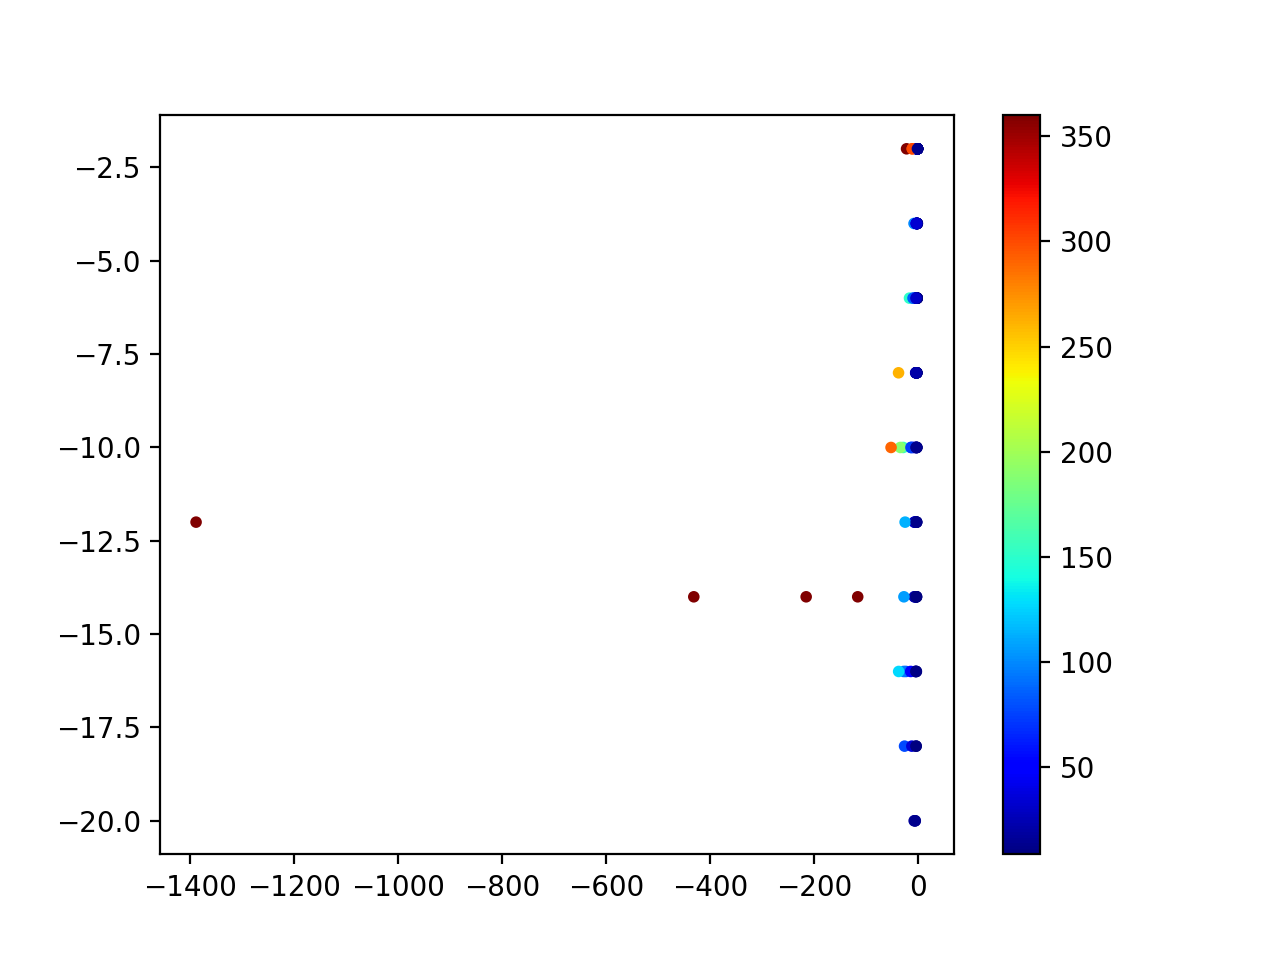

In [55]:
plt.figure()
plt.scatter(zs[lower], b_used[lower],alpha=1, c=Rs[lower], cmap='jet', vmin=8.5, vmax=360, s=10)
plt.colorbar()
plt.show()

# Doppler Grid

In [1201]:
xs = np.arange(-20, 20, .5)
# xs[int(len(xs)/2)] =0
ys = np.arange(-20, 20, .5)
# xs[int(len(ys)/2)] =0
zs = np.arange(-10, 11, .5)

In [1202]:
sun_pos = np.array([0,8.2, 0])       # in kpc
sun_v = np.array([220,0, 0])         # in km/s
sun_mag = np.linalg.norm(sun_pos)    # in kpc
diff_2 = np.median(np.diff(xs))/2

In [1203]:
%matplotlib notebook

In [1204]:
grid.shape

(1102248, 3)

In [1205]:
(l[0]*180/np.pi)%360, (phi[0]*180/np.pi)%360

TypeError: 'float' object is not subscriptable

In [1206]:


grid = np.array([(x, y, z) for y in xs for x in ys for z in zs])
print('grid made')

phi = np.arctan2(grid[:,0], grid[:,1])                                   # radian
v_r = np.linalg.norm(220*np.array([np.sin(phi), -np.cos(phi), np.zeros_like(phi)]), axis=0)   # radian
r = np.linalg.norm(grid, axis=1)                                         # kpc

l = -np.arctan2(grid[:,0]-sun_pos[0],grid[:,1]-sun_pos[1])+np.pi             # radian         
# l = np.arcsin(np.sin(phi)*r/np.linalg.norm(grid-sun_pos, axis=1))
b = np.arctan2(grid[:,2], np.sqrt(grid[:,0]**2+grid[:,1]**2))

doppler_grid =((v_r/r - np.linalg.norm(sun_v)/sun_mag)*sun_mag*np.sin(l)*np.cos(b)) #(omega-omega_r0)r0sin(l) #km/s
doppler_grid = doppler_grid.reshape(len(xs), len(ys), len(zs))




grid made


<ipython-input-1206-e1e0ec0ebcd6>:12: RuntimeWarning: divide by zero encountered in true_divide
  doppler_grid =((v_r/r - np.linalg.norm(sun_v)/sun_mag)*sun_mag*np.sin(l)*np.cos(b)) #(omega-omega_r0)r0sin(l) #km/s
<ipython-input-1206-e1e0ec0ebcd6>:12: RuntimeWarning: invalid value encountered in multiply
  doppler_grid =((v_r/r - np.linalg.norm(sun_v)/sun_mag)*sun_mag*np.sin(l)*np.cos(b)) #(omega-omega_r0)r0sin(l) #km/s


<IPython.core.display.Javascript object>


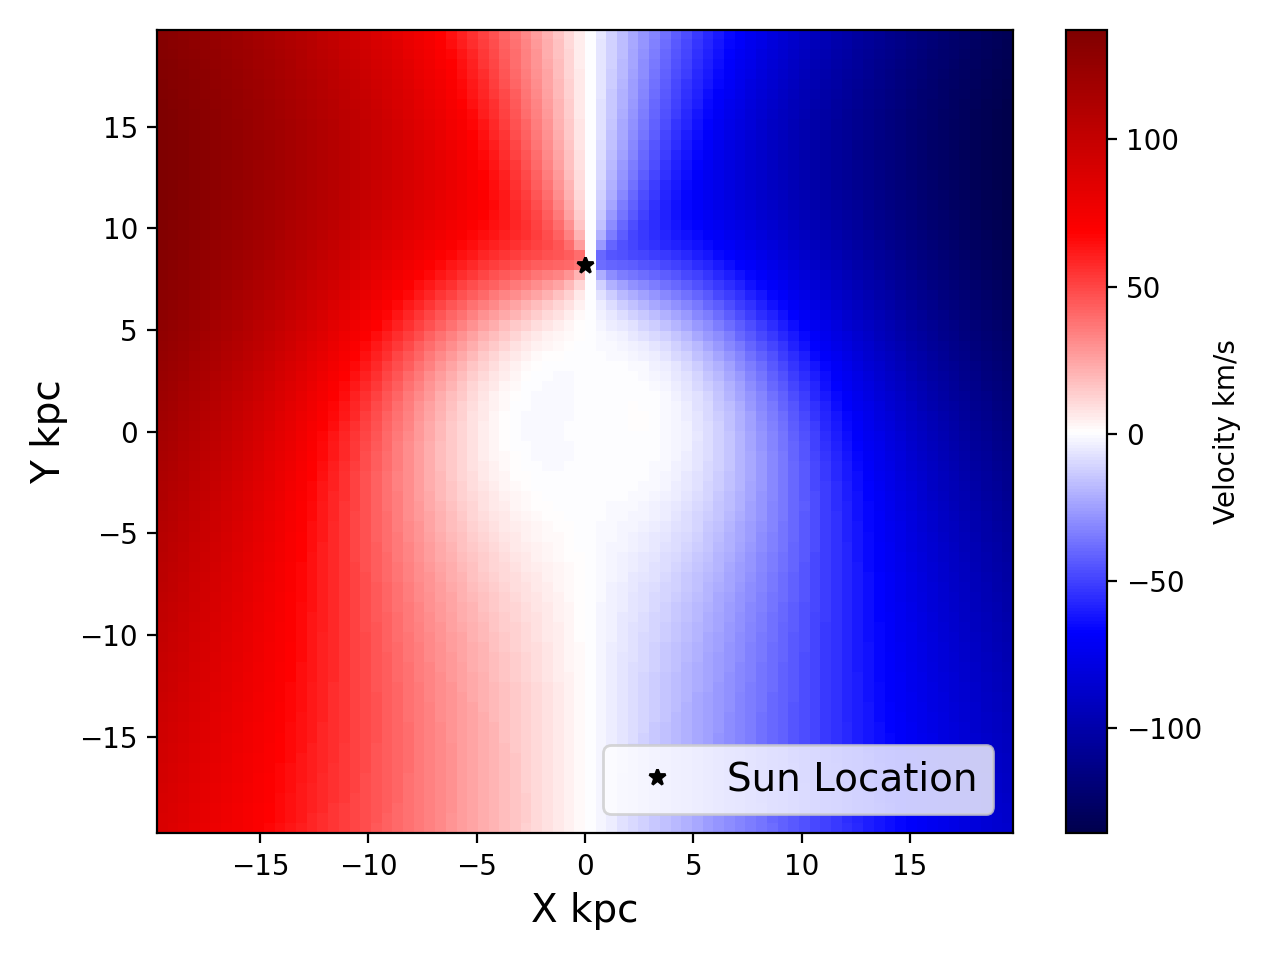

In [1207]:
plt.figure()
plt.imshow(doppler_grid[:,:,5], cmap='seismic', aspect='auto', 
           extent=[xs[0]+diff_2, xs[-1]+diff_2, ys[0]+diff_2, ys[-1]+diff_2], 
           origin='lower')
diff_2 = np.median(np.diff(xs))/2
plt.plot(sun_pos[0],sun_pos[1] , '*', label='Sun Location', c='k')
# plt.plot(xs, 1/np.arctan(12*np.pi/180)*xs-8.2)
# plt.xlim(-20, 20)
# plt.ylim(-20, 20)
plt.colorbar(label='Velocity km/s')
plt.legend(loc='lower right', fontsize=14)
plt.xlabel('X kpc', fontsize=14)
plt.ylabel('Y kpc', fontsize=14)

plt.tight_layout()
plt.savefig('Dopplergrid.pdf')

In [848]:
grid.shape

(1756800, 3)

In [527]:
rs = np.arange(10,30, .5)
phis = np.arange(0, 360, 1)*np.pi/180

grid = np.array([(r, phi, z) for r in rs for phi in phis for z in zs])
print('grid made')

v_r = np.linalg.norm(220*np.array([np.sin(grid[:,1]), -np.cos(grid[:,1]), np.zeros_like(grid[:,1])]), axis=0)   # radian
r = np.linalg.norm(grid - np.array([8.2, 0, 0]) , axis=1)                                        # kpc

l = np.arctan2(grid[:,0]-sun_pos[0],grid[:,1]-sun_pos[1])               # radian      
# l = np.arcsin(np.sin(grid[:,1])*r/grid[:,0])
# b = np.arctan(grid[:,2]/np.sqrt(grid[:,0]**2+(grid[:,1]-sun_pos[1])**2))
b = np.arctan(grid[:,2]/grid[:,0])
doppler_grid =((v_r/grid[:,0] - np.linalg.norm(sun_v)/sun_mag)*sun_mag*np.sin(l)*np.cos(b)) #(omega-omega_r0)r0sin(l) #km/s
doppler_grid = doppler_grid.reshape(len(rs), len(phis), len(zs))

grid made


<IPython.core.display.Javascript object>


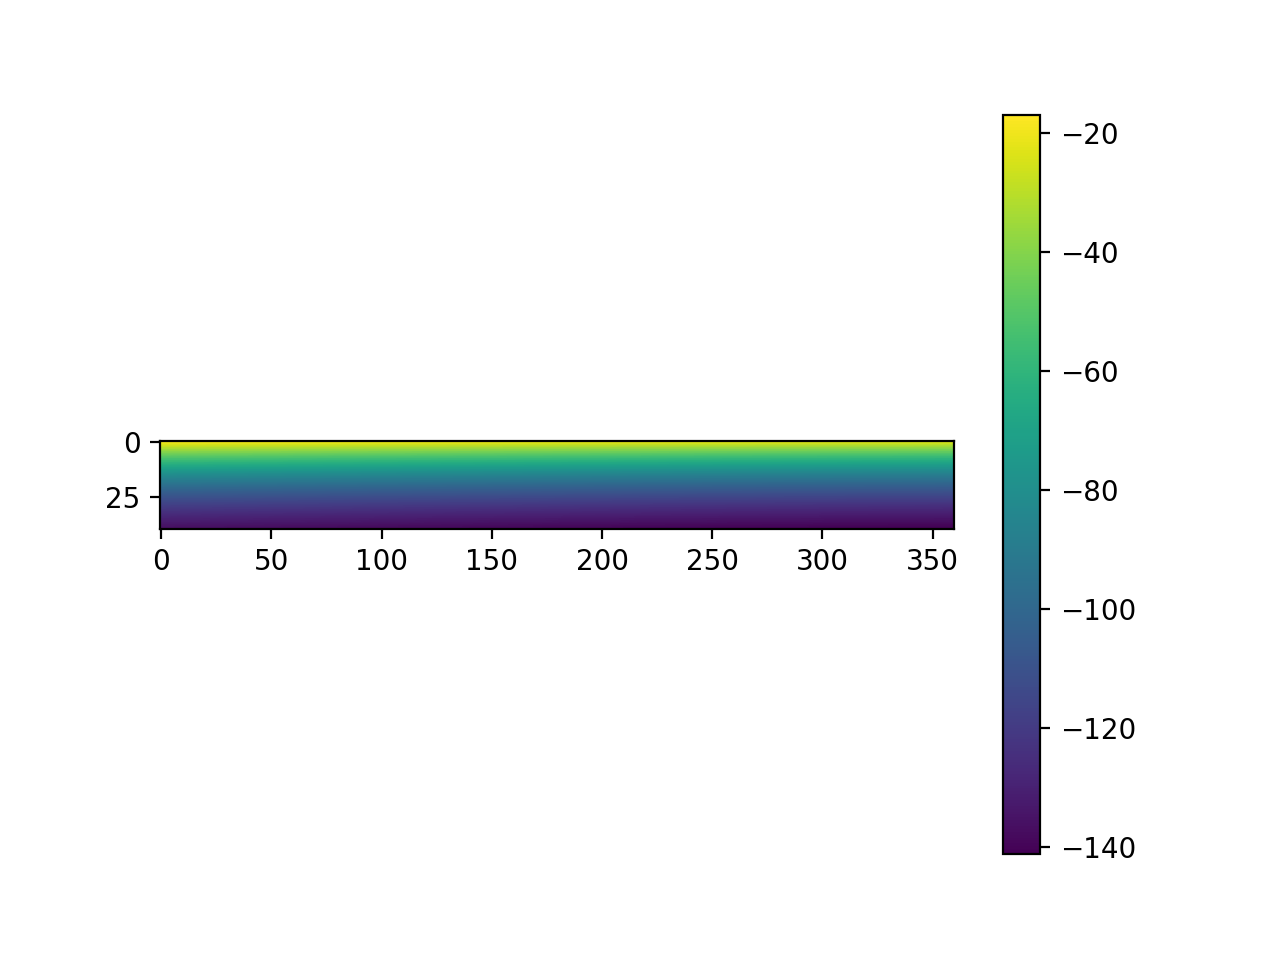

In [528]:
plt.figure()
plt.imshow(doppler_grid[:,:,30])
plt.colorbar()

In [459]:
power_grid = np.zeros((len(rs), len(phis),len(zs)))
mass_grid = power_grid.copy()
file_count = {(float(L), float(B)):[] for L in range(0, 361, 2) for B in range(-20, 21, 2)}

file_errors = 0
index_errors = 0
start = time.time()
# Loop over x values and y values
for i,r in enumerate(rs):
    for j,phi in enumerate(phis):
        for k, z in enumerate(zs):
            r_diff = np.linalg.norm(np.array([r, phi, z]) - np.array([8.2, 0, 0]))                                        # kpc

 
            l_init = (np.arcsin(np.sin(phi)*r/r_diff-np.pi)*180/np.pi)%360
            L= np.round(l_init/2)*2

            b_init = np.arctan2(z,r)

            B = np.round(b_init/2)*2
            if B ==-0.0:
                B=0.0
            if L==-0.0:
                L=0.0
            if np.linalg.norm(np.array([r, phi, z]))<10:
                pass
            elif 185>L>175:
                pass
            elif L>355:
                pass
            elif L <5:
                pass
            else:
                try:
                    if B!=0.0:
                        file, LSR = get_real_file(L, B)
                        file_opp, LSR_opp = get_real_file(L, -B)
                    else:
                        file, LSR = get_real_file(L,B)
                    # find the doppler velocity at that point
                    doppler_v = doppler_grid[i,j, k]
                    doppler_v = np.nan_to_num(doppler_v, 0)

                    # find the point in the spectra/spectras that has that velocity
                    if not v[0]>doppler_v>v[-1]:
                        power = 0# Doppler velocity outside bounds
                    else:
                        v_index = np.where(doppler_v<v)[0][-1]
                #         v_index = np.searchsorted(v, doppler_v)[0]

                        # assign that point its corresponding power
                        power = file[v_index]
                        file_count[(L, B)].append([v[v_index], power, LSR])


                        if power <10:
                            power = 0
                    mass = 1.18e18*(np.linalg.norm(np.array([x, y-sun_pos[1], z]))*c.kpc.to_value()*1000)**2*np.radians(2.5)**2*np.abs(np.median(np.diff(v)))*m_h.to('g').to_value()*power

                    power_grid[i,j, k] += power
                    mass_grid[i,j,k] += mass
                except FileNotFoundError:
                    file_errors+=1
                    pass

            
        

    if i%50==0:
        print(f'x={j}/{len(xs)} done, file errors: {file_errors}, index errors: {index_errors}')
        print(f'time taken={time.time()-start}')
        file_errors =0
        index_errors = 0
        start = time.time()

NameError: name 'rs' is not defined

<IPython.core.display.Javascript object>


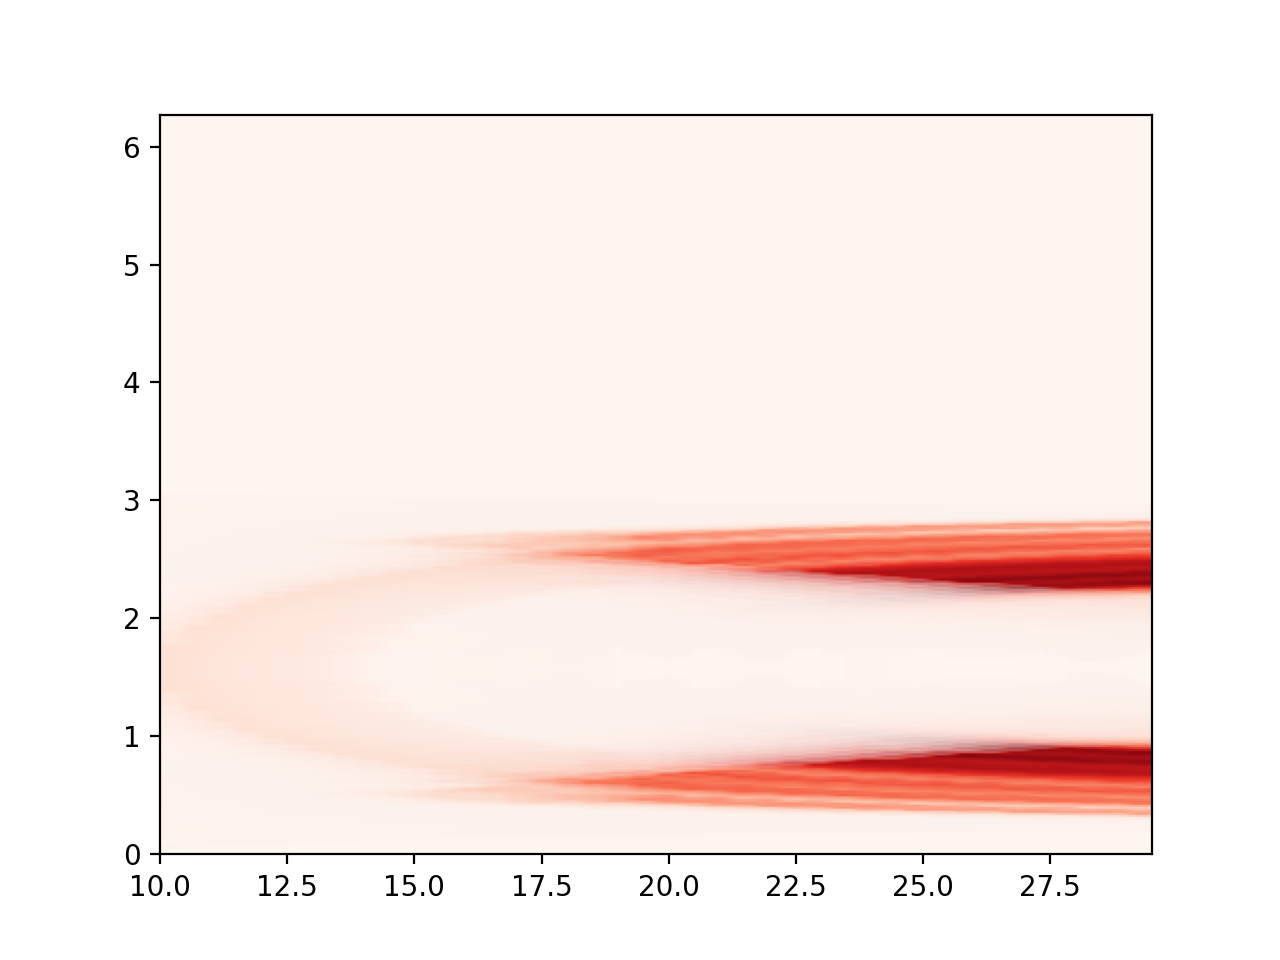

In [1205]:
plt.figure()
# for i in range(len(zs)):
    plt.imshow(power_grid[:,:,i].T
           , aspect='auto', cmap='Reds', extent=[rs[0], rs[-1], phis[0], phis[-1]], origin='lower', alpha=.3)

In [1208]:
upper = np.sum(power_grid[:,:,31:], axis=-1).T
lower = np.sum(power_grid[:, :, :30], axis=-1).T

In [ ]:
plt.figure()
X, Y = np.meshgrid(grid[:,0]*np.cos(grid[:,1]), grid[:,0]*np.sin(grid[:,1]))
plt.contour(X, Y, upper)

<IPython.core.display.Javascript object>

# Velocity mapping

In [9]:
# Loop over x values and y values
# figure out the l's that corresponds to that x and y
# pull in the file with that l or multiple files near by
# find the doppler velocity at that point
# find the point in the spectra/spectras that has that velocity
# assign that point its corresponding power

In [10]:
from scipy.signal import savgol_filter

In [832]:
def get_real_file(l, b=0.0):
    try:
        _,b = str(b).split('-')
        b = 'n'+str(b)
    except:
        pass
    file = f'fitted_2/real0_{1270.0}_{l}_{b}_avg.npz'

    f_in = np.load(file, allow_pickle=True)
    f_fix = f_in['real0_fix']*cal
    lsr = f_in['LSR']
    return f_fix, lsr

In [833]:
get_real_file(120.0)

(array([0., 0., 0., ..., 0., 0., 0.]), array([-5.25883368]))

In [1298]:
f = np.linspace(145e6, 155e6, 8192)+1270e6
v = 2.997e8*(1420.405751e6-f)/1420.405751e6/1e3

In [1040]:
import astropy.constants as c

In [1041]:
m_h = c.m_p +c.m_e
# m_h = m_h.to_value()

In [1042]:
m_h.to('g')

<Quantity 1.67353286e-24 g>

In [1043]:
np.where(zs==-10.0)

(array([0]),)

In [1044]:
import astropy.constants as c

In [1045]:
x, y, l_init

(30.5, 30.5, 126.17231277892691)

In [1046]:
np.ceil(l_init/2)*2

128.0

In [1052]:
power_grid = np.zeros((len(xs), len(ys), 1))
mass_grid = power_grid.copy()
file_count = {float(L):[] for L in range(0, 361, 2)}
file_errors = 0
indices = []
# Loop over x values and y values
for i,y in enumerate(ys[:]):
    for j,x in enumerate(xs[:]):
        phi = np.arctan2(y, x)                                   # radian
        r = np.linalg.norm([x,y,0])                                         # kpc

        # l = np.arctan2(grid[:,0]-sun_pos[0],grid[:,1]-sun_pos[1])               # radian         
#         l_init = (np.arcsin(np.sin(phi)*r/np.linalg.norm(np.array([x,y,0])-sun_pos))*180/np.pi)%360
        l_init = -((np.arctan2(x,y-sun_pos[1])-np.pi)*180/np.pi)%360
        weights = [1-l_init%2/2, l_init%2/2]
        L = [np.floor(l_init/2)*2, np.ceil(l_init/2)*2]
        if 195>L[0]>165:
            pass
        elif L[0]>345:
            pass
        elif L[0] <15:
            pass
#         elif np.linalg.norm(np.array([x, y, 0.0]))<8.2:
#             pass
#         if 8==0:
#             pass
        else:
            try:
                file1, LSR1 = get_real_file(L[0])                
                file2, LSR2 = get_real_file(L[1])                


                #                 ra = np.degrees(jrd[1])
#                 dec = np.degrees(jrd[2])
#                 LSR = get_projected_velocity(ra, dec, jrd[0])
    #             if not L in file_count:

                # find the doppler velocity at that point
                doppler_v = doppler_grid[i,j, int(len(zs)/2)]
                # find the point in the spectra/spectras that has that velocity
                if not v[0]>doppler_v>v[-1]:
                    power = 0# Doppler velocity outside bounds
                else:
                   
                    v_index = np.where(doppler_v<v)[0][-1]+20

                        
                    indices.append(v_index)
        #         v_index = np.searchsorted(v, doppler_v)[0]

                    # assign that point its corresponding power
#                     if power <30:
#                         power = 0
                    power1 = file1[v_index]*weights[0]
                    power2 = file2[v_index]*weights[1]
                    power = (power1+power2)/2
                    if power <15:
                        power = 0
                    file_count[L[0]].append([v[v_index], power1, LSR])

        #             power = np.nan_to_num(power, 0)

                    mass = 1.18e18*(np.linalg.norm(np.array([x, y-8.2, 0]))*c.kpc.to_value()*1000)**2*np.radians(2.5)**2*np.abs(np.median(np.diff(v-LSR)))*m_h.to('g').to_value()*power
                    power_grid[i,j] += power
                    mass_grid[i,j]  += mass

            except FileNotFoundError:
                file_errors+=1
                pass
        
        
    
    if j%50==0:
        print(f'x={xs[j]} done, file errors: {file_errors}')
        file_errors =0
        index_errors = 0

<IPython.core.display.Javascript object>


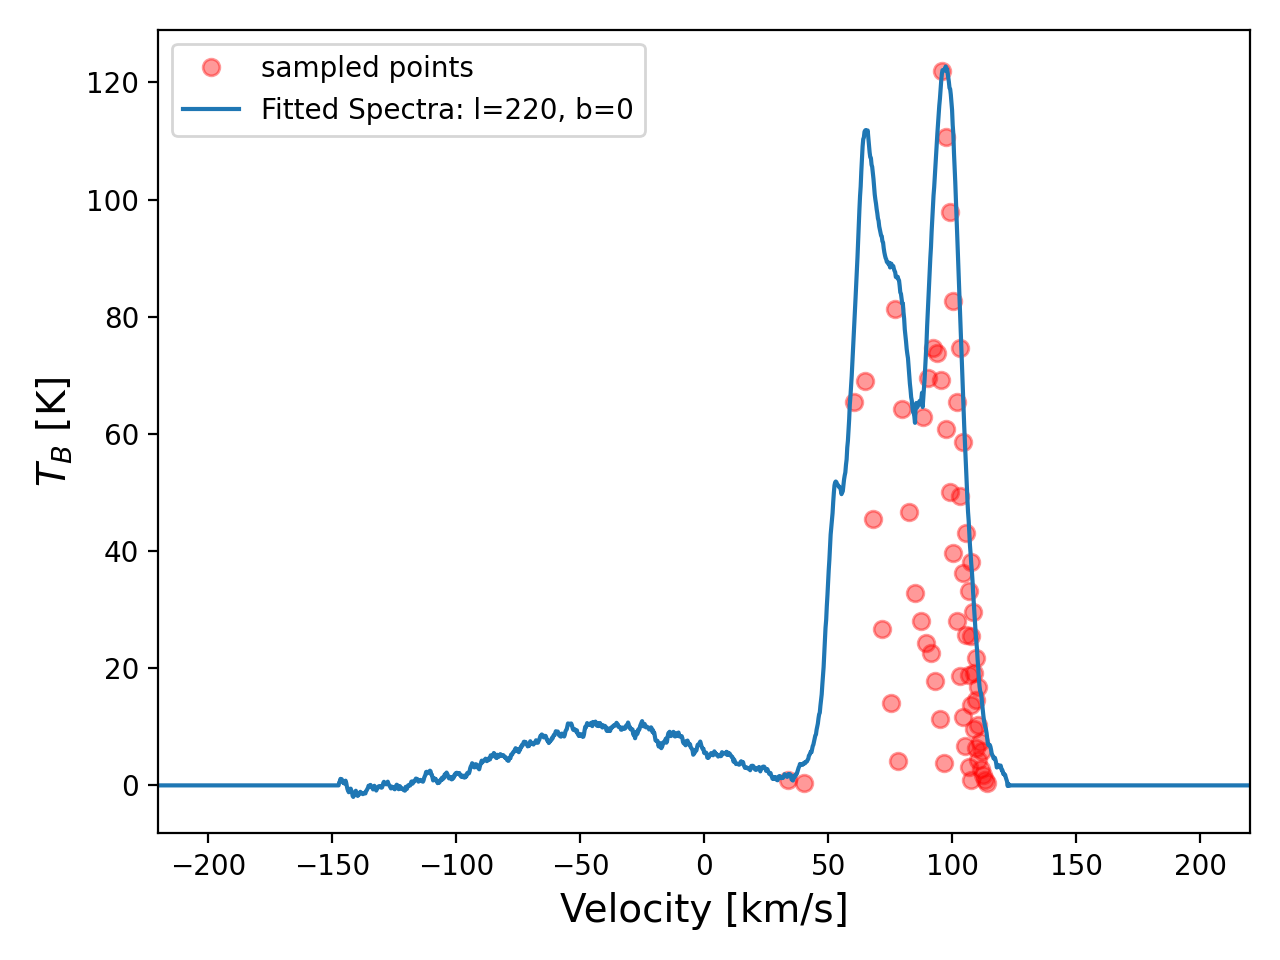

[-10.70852734]


In [1050]:
plt.figure()
l=220.0
b=0.0
file_test = np.array(file_count[l])
print(file_test[0][2])
fin = np.load(f'fitted_2/real0_{1270.0}_{l}_{b}_avg.npz')
plt.plot(file_test[:,0], file_test[:,1],'ro', alpha=.4, label='sampled points')
plt.plot(v, fin['real0_fix']*cal, label=f'Fitted Spectra: l={int(l)}, b={int(b)}')
plt.xlim(-220, 220)
plt.xlabel('Velocity [km/s]', fontsize=14 )
plt.ylabel(r'$T_B$ [K]', fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig('sampled_spectra.pdf')

In [511]:
from matplotlib.colors import LogNorm

In [512]:
%matplotlib notebook

<IPython.core.display.Javascript object>


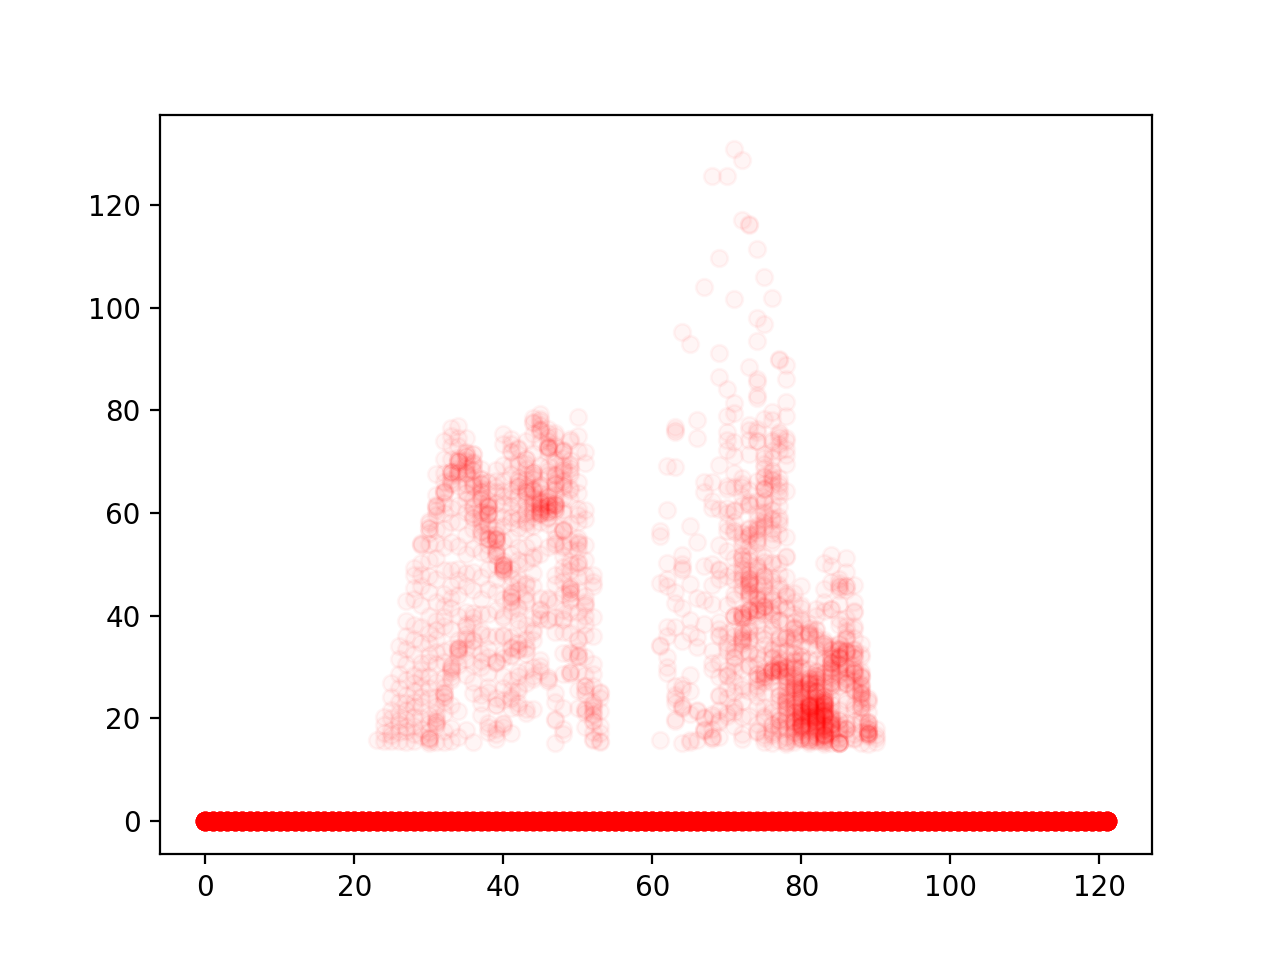

In [1049]:
plt.figure()
for i in range(len(power_grid)):
    plt.plot(power_grid[i,:], 'ro', alpha=.04)

<IPython.core.display.Javascript object>


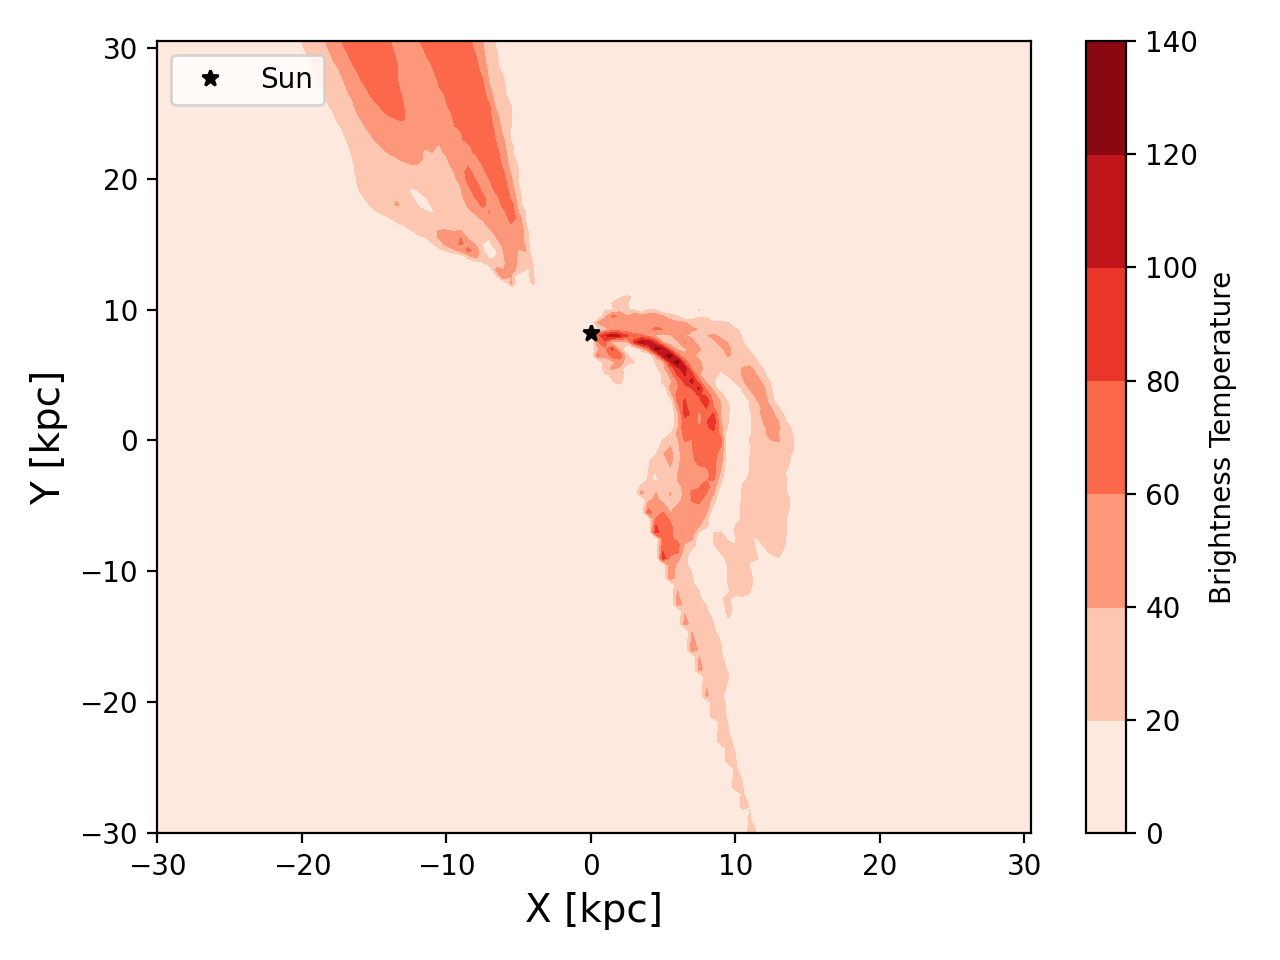

In [1053]:
plt.figure()
# plt.imshow(power_grid[:,:,0], aspect='auto',
#            interpolation='gaussian', extent=[xs[0], xs[-1], ys[0], ys[-1]], 
#            origin='lower', cmap='viridis')
X,Y = np.meshgrid(xs, ys)
# plt.contour(X,Y,power_grid[:,:, 0], cmap='bone', origin='lower', alpha=1)
# plt.colorbar()
plt.contourf(X,Y,power_grid[:,:, 0], cmap='Reds', origin='lower', alpha=1)
# plt.xlim(-8.2, 8.2)
plt.colorbar(label='Brightness Temperature')
# plt.ylim(-8.2, 8.2)
plt.plot(0, 8.2,'k*' , zorder=2.5, label='Sun')

plt.legend(loc='upper left')
plt.xlabel('X [kpc]', fontsize=14)
plt.ylabel('Y [kpc]', fontsize=14)
plt.tight_layout()
plt.savefig('galactic_plane.pdf')

<IPython.core.display.Javascript object>


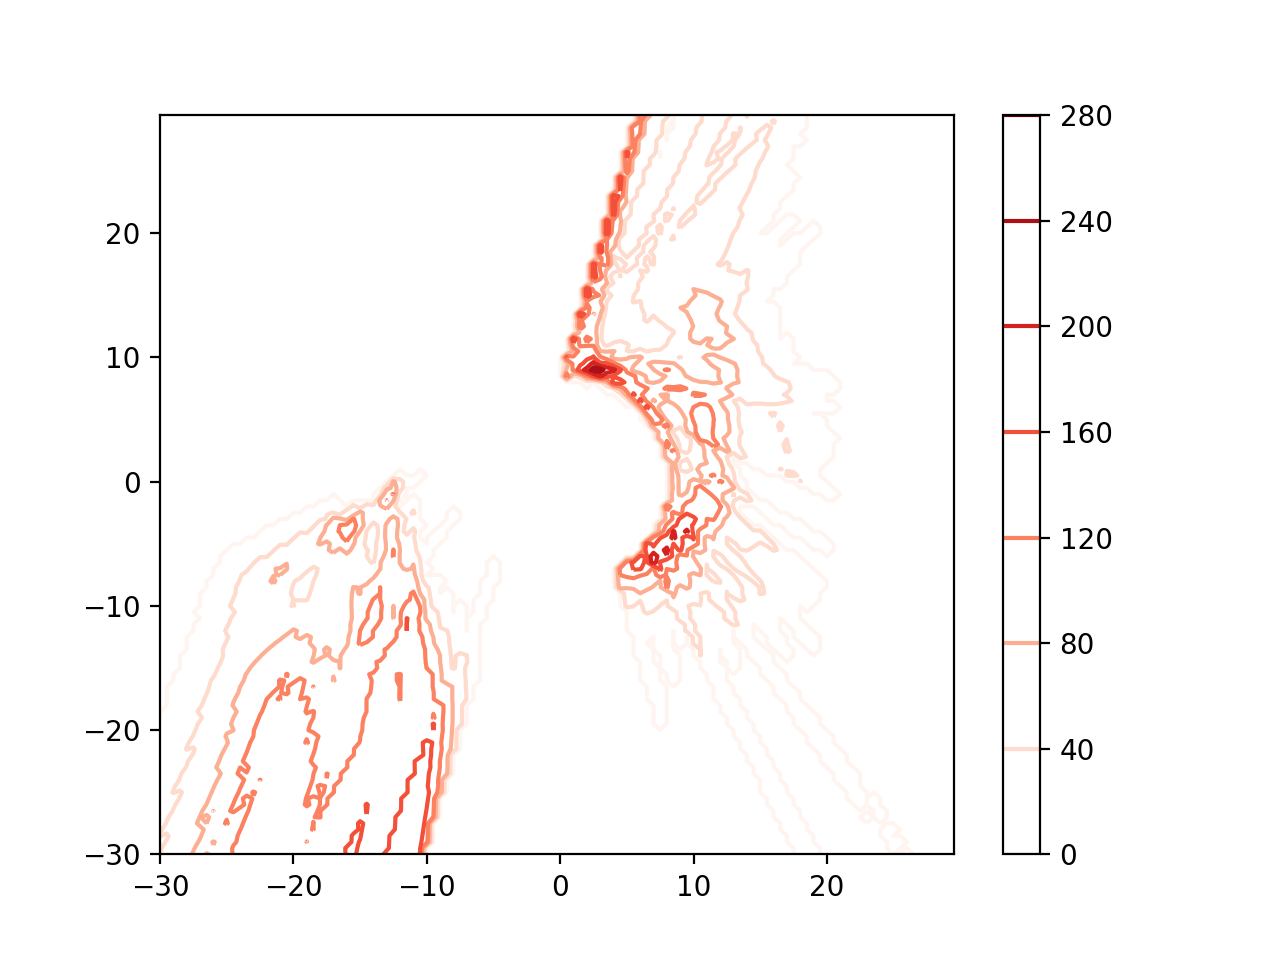

In [535]:
plt.figure()
X,Y = np.meshgrid(xs, ys)
plt.contour(X,Y,power_grid[:,:, 0], cmap='Reds', origin='lower')
plt.colorbar()

In [222]:
import time

In [223]:
len(xs)

100

In [528]:
int(len(zs)/2)

30

In [28]:
import time

In [95]:
zs[60]

0.0

In [25]:
import time

In [45]:
zs[30]

0

In [46]:
zs[40]

10

In [1208]:
power_grid = np.zeros((len(xs), len(ys), len(zs)))
mass_grid = power_grid.copy()
file_count = {(float(L), float(B)):[] for L in range(0, 361, 2) for B in range(-20, 21, 2)}
file_errors = 0
indices = []
# Loop over x values and y values
for i,y in enumerate(ys[:]):
    for j,x in enumerate(xs[:]):
        for k, z in enumerate(zs):
        
            l_init = -((np.arctan2(x,y-sun_pos[1])-np.pi)*180/np.pi)%360
#             weights_l = [np.abs(1-l_init/2%2), np.abs(l_init/2%2)]
#             L = [np.floor(l_init/2)*2, np.ceil(l_init/2)*2]
            L = np.round(l_init/2)*2



            b_init = np.arctan2(z, np.sqrt(x**2+(y-sun_pos[1])**2))*180/np.pi
            
#             weights_b = [np.abs(1-b_init/2%2), np.abs(b_init/2%2)]
#             B = [np.floor(b_init/2)*2, np.ceil(b_init/2)*2]

            B = np.round(b_init/2)*2
            if 190>L>170:
                pass
            elif L>350:
                pass
            elif L <10:
                pass
#             elif np.linalg.norm(np.array([x, y, 0]))<8.2:
#                 pass

            else:
                try:
#                     file1, LSR1 = get_real_file(L[0], B[0])      
#                     file2, LSR2 = get_real_file(L[1], B[0])
#                     file3, LSR3 = get_real_file(L[0], B[1])
#                     file4, LSR4 = get_real_file(L[1], B[1])                

                    file, LSR = get_real_file(L, B)

                    # find the doppler velocity at that point
                    doppler_v = doppler_grid[i,j, k]
                    # find the point in the spectra/spectras that has that velocity
                    if not v[0]>doppler_v>v[-1]:
                        power = 0# Doppler velocity outside bounds
                    else:
                        v_index = np.where(doppler_v<v)[0][-1]+20


                        indices.append(v_index)
            #         v_index = np.searchsorted(v, doppler_v)[0]

                        # assign that point its corresponding power
    #                     if power <30:
    #                         power = 0
#                         power1 = file1[v_index]*weights_l[0]*weights_b[0]
#                         power2 = file2[v_index]*weights_l[1]*weights_b[0]
#                         power3 = file3[v_index]*weights_l[0]*weights_b[1]
#                         power4 = file4[v_index]*weights_l[1]*weights_b[1]
#                         power = (power1+power2+power3+power4)/4
                        power = file[v_index]
                        if power <50:
                            power = 0
                        file_count[(L, B)].append([v[v_index], power, LSR])

            #             power = np.nan_to_num(power, 0)

                        mass = 1.18e18*(np.linalg.norm(np.array([x, y-sun_pos[1], z]))*c.kpc.to_value()*1000)**2*np.radians(2.5)**2*np.abs(np.median(np.diff(v)))*m_h.to('g').to_value()*power
                        power_grid[i,j, k] += power
                        mass_grid[i,j, k]  += mass

                except FileNotFoundError:
                    file_errors+=1
                    pass


    
    if i%50==0:
        print(f'y={ys[i]} done, file errors: {file_errors}')
        file_errors =0
        index_errors = 0

x=19.5 done, file errors: 1192
x=19.5 done, file errors: 93081


In [788]:
file_count[(l, -b)][-1][-1]

array([28.73713203])

<IPython.core.display.Javascript object>


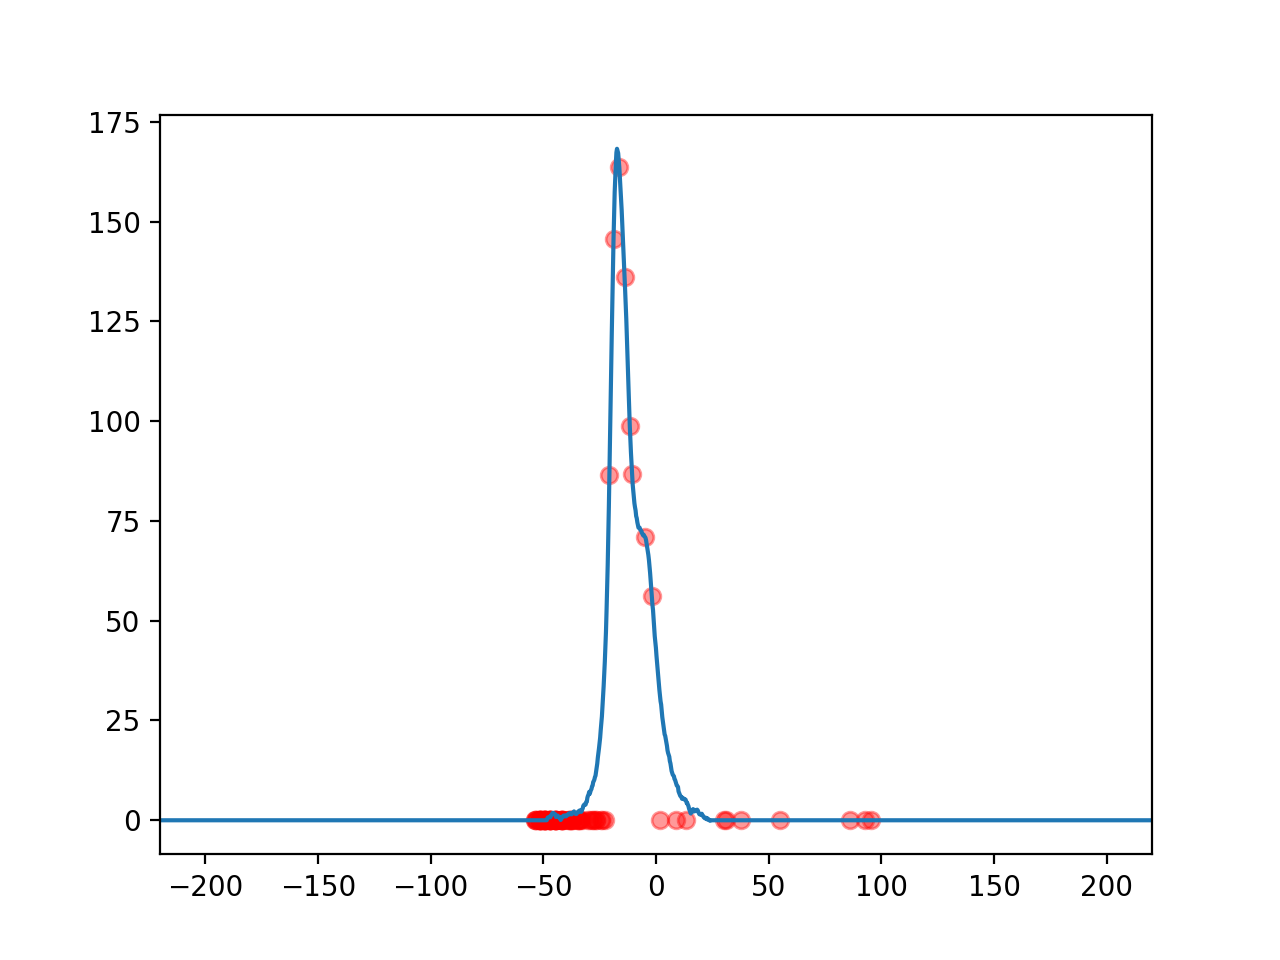

[24.21735848]


(-220.0, 220.0)

In [1209]:
plt.figure()
l=20.0
b=10.0
file_test = np.array(file_count[(l, b)])
print(file_test[0][2])
fin = np.load(f'fitted_2/real0_{1270.0}_{l}_{b}_avg.npz')
plt.plot(file_test[:,0], file_test[:,1],'ro', alpha=.4)
plt.plot(v, fin['real0_fix']*cal)
plt.xlim(-220, 220)

<IPython.core.display.Javascript object>


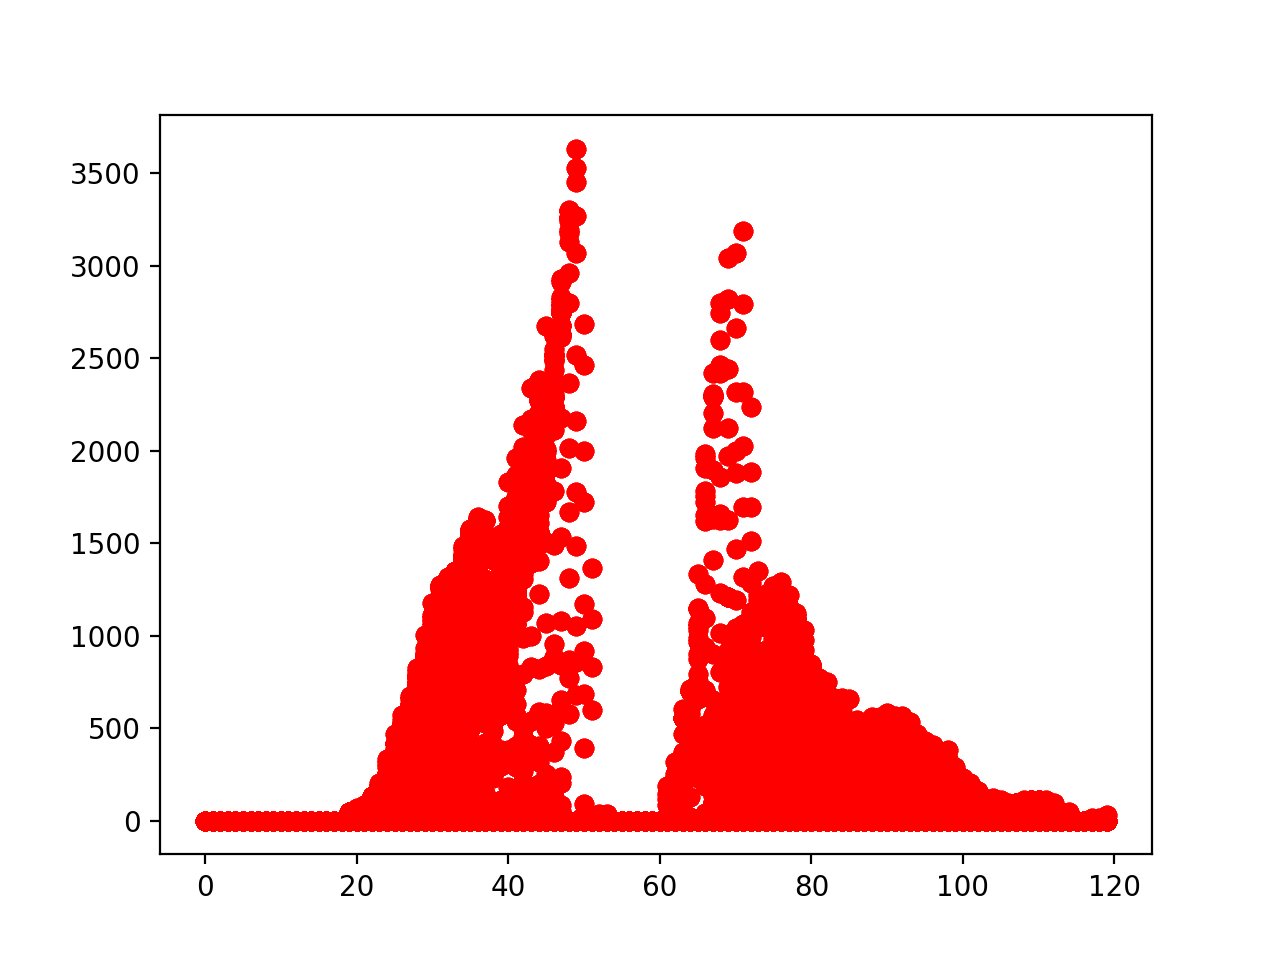

In [922]:
plt.figure()
for i in range(len(power_grid)):
    plt.plot(power_grid[i,:], 'ro', alpha=.04)

In [ ]:
test=power_grid[power_grid.nonzero()[0]]

In [1210]:
zs[50]

IndexError: index 50 is out of bounds for axis 0 with size 42

<IPython.core.display.Javascript object>


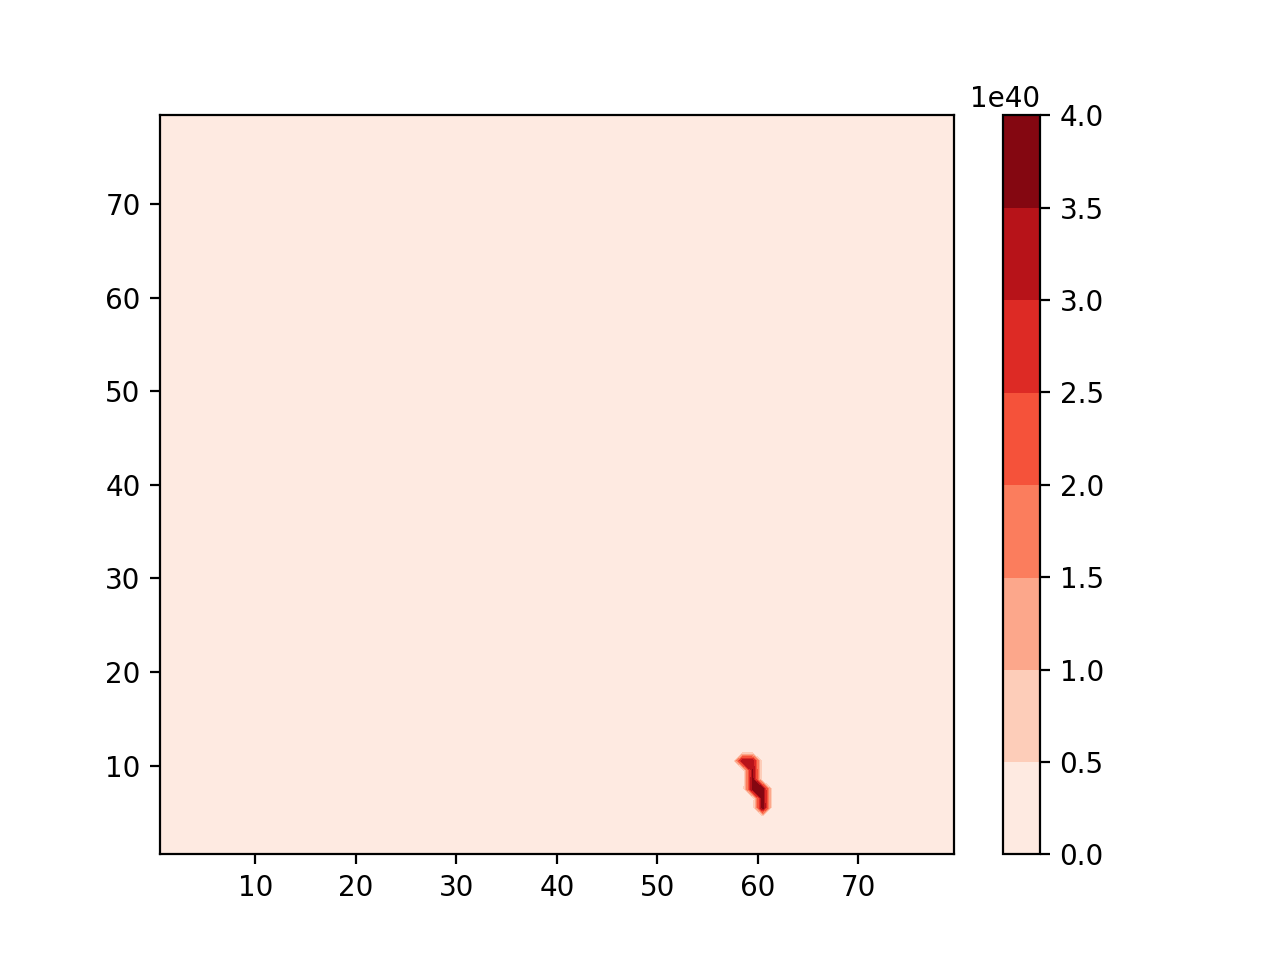

<ipython-input-1234-d2f30b95ff65>:9: UserWarning: The following kwargs were not used by contour: 'interpolation'
  plt.contourf(mass_grid[:,:,1], cmap='Reds', origin='lower', interpolation='none')


In [1234]:
plt.figure()
levels = MaxNLocator(nbins=15).tick_values(0, power_grid[:,:,:].max())


# plt.imshow(power_grid[:,:,], aspect='auto',
#            interpolation='none', extent=[xs[0], xs[-1], ys[0], ys[-1]], 
#            origin='lower', cmap='Reds')
X,Y = np.meshgrid(xs, ys)
plt.contourf(mass_grid[:,:,1], cmap='Reds', origin='lower', interpolation='none')

# plt.xlim(-8.2, 8.2)
# plt.ylim(-8.2, 8.2)
# plt.scatter(0, 8)
plt.colorbar()

In [791]:
power_grid.shape

(120, 120, 122)

In [1212]:
p_upper = np.sum(power_grid[:,:,70:80], axis=2)
p_lower = np.sum(power_grid[:,:,40:50], axis=2)

In [1252]:
diff_mass = np.zeros((len(xs), len(ys)))
for i in range(0, 21):
    diff_mass += mass_grid[:,:,::-1][:,:,i] - mass_grid[:,:,i]

In [1253]:
diff_power = np.zeros((len(xs), len(ys)))
for i in range(0, 21):
    diff_power += power_grid[:,:,::-1][:,:,i] - power_grid[:,:,i]

In [1254]:
X,Y = np.meshgrid(xs, ys)

In [1255]:
m_sun = c.M_sun.to_value()*1000

In [1256]:
np.sum(diff_mass)/m_sun/1e10

-0.8163883824740045

In [1257]:
zs[19]

-0.5

In [1258]:
R = np.sqrt(X**2+Y**2)
PHI = np.arctan2(Y, X)

<IPython.core.display.Javascript object>


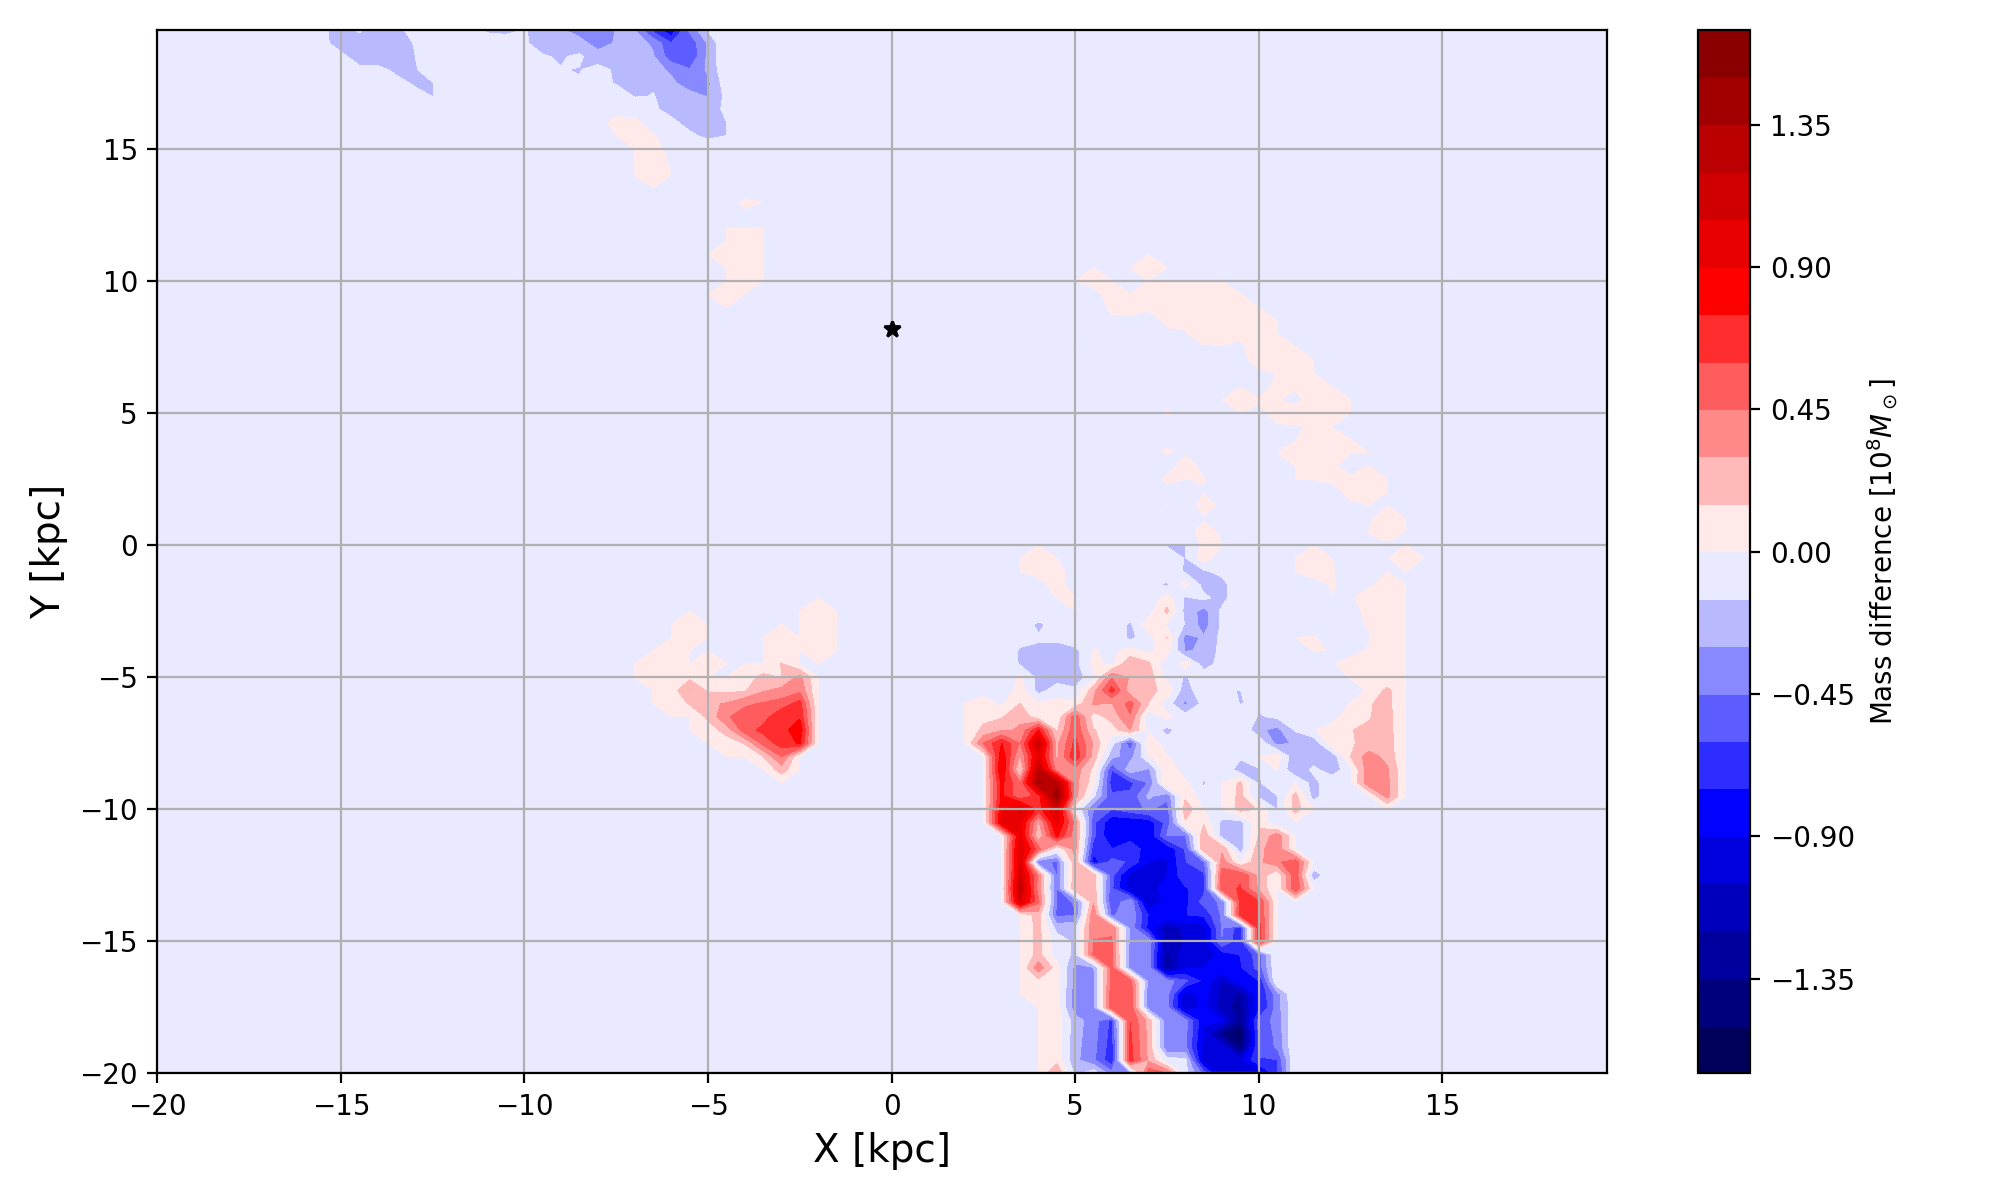

In [1259]:
fig, axs = plt.subplots(nrows=1, figsize=(10, 6))#, sharex=True, gridspec_kw={'hspace':.05}, figsize=(10,6))
# levels = MaxNLocator(nbins=15).tick_values(diff_power.min(), -diff_power.min())
# im = axs[0].contourf(X, Y, diff_power, cmap='seismic', levels=levels, origin='lower', alpha=1)
# fig.colorbar(im,ax=axs[0], label='Temperature difference [$K$]')

levels = MaxNLocator(nbins=30).tick_values(diff_mass.min()/m_sun/1e8, -diff_mass.min()/m_sun/1e8)
im = axs.contourf(X, Y, diff_mass/m_sun/1e8, cmap='seismic', levels=levels, origin='lower', alpha=1)

# plt.contourf(X, Y, p_lower, cmap='Blues', levels=levels, origin='lower', alpha=.5)
fig.colorbar(im, ax=axs, label=r'Mass difference [$10^{8}M_\odot$]')
axs.set_xlabel('X [kpc]', fontsize=14)
axs.set_ylabel('Y [kpc]', fontsize=14)

axs.plot(0, 8.2, '*', c='k', label='Sun')
axs.grid()



plt.tight_layout()
plt.savefig('CONTOUR.pdf')

In [1261]:
diff_mass.shape

(80, 80)

In [1264]:
lower_diff = np.abs(np.sum(diff_power[np.where(diff_power<0)])/m_sun/1e10)
upper_diff = np.abs(np.sum(diff_power[np.where(diff_power>0)])/m_sun/3/1e10)

In [1265]:
lower_diff/(lower_diff+upper_diff)

0.8634355409586175

In [1266]:
(4.2088239840008335e10 + 11.196742673029854e10)*1e10

1.5405566657030689e+21

<IPython.core.display.Javascript object>


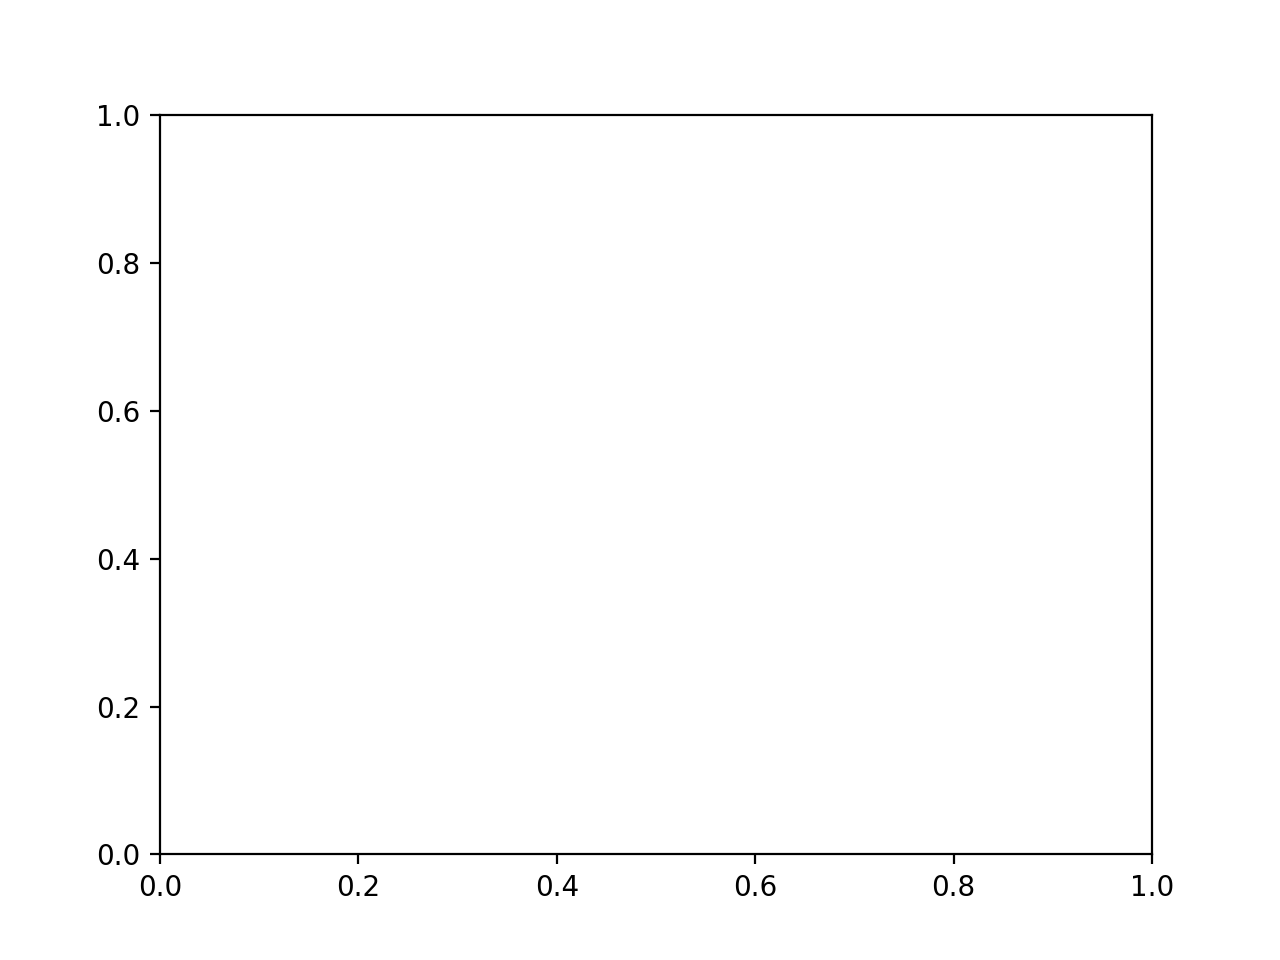

TypeError: Shapes of x (122, 122) and z (120, 120) do not match

In [1023]:
plt.figure()
levels = MaxNLocator(nbins=30).tick_values(-diff.max(), diff.max())
# plt.pcolormesh(X, Y, p_upper-p_lower, cmap='seismic')
# plt.colorbar()
# plt.contour(X, Y, power_grid[:,:,30], cmap='Reds')
plt.contourf(X, Y, diff, cmap='seismic', levels=levels, origin='lower', alpha=1)

# plt.contourf(X, Y, p_lower, cmap='Blues', levels=levels, origin='lower', alpha=.5)
plt.colorbar(label='Temperature difference [$K$]')



plt.xlabel('X [kpc]', fontsize=14)
plt.ylabel('Y [kpc]', fontsize=14)



# levels = MaxNLocator(nbins=30).tick_values(-diff_mass.max(), diff_mass.max())
# # plt.pcolormesh(X, Y, p_upper-p_lower, cmap='seismic')
# # plt.colorbar()
# # plt.contour(X, Y, power_grid[:,:,30], cmap='Reds')
# plt.contourf(X, Y, diff_mass, cmap='seismic', levels=levels, origin='lower', alpha=1)

# # plt.contourf(X, Y, p_lower, cmap='Blues', levels=levels, origin='lower', alpha=.5)
# # plt.colorbar(label='Temperature Difference [$K$]')

# plt.xlabel('X [kpc]', fontsize=14)
# plt.ylabel('Y [kpc]', fontsize=14)

plt.tight_layout()
plt.savefig('Power_diff_contour.pdf')

<IPython.core.display.Javascript object>


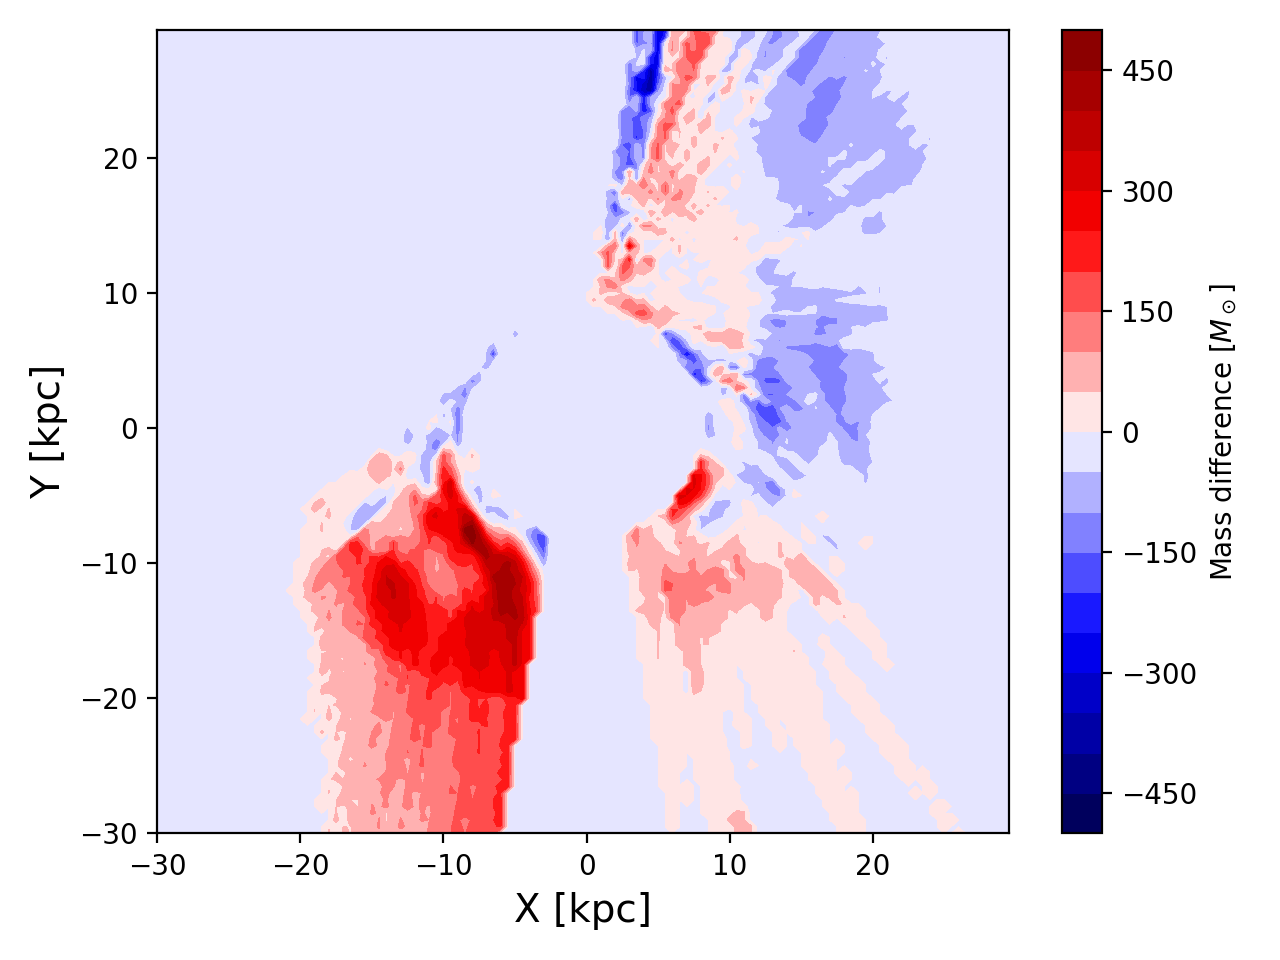

In [339]:
plt.figure()
levels = MaxNLocator(nbins=20).tick_values(-diff.max(), diff.max())
# plt.pcolormesh(X, Y, p_upper-p_lower, cmap='seismic')
# plt.colorbar()
# plt.contour(X, Y, power_grid[:,:,30], cmap='Reds')
plt.contourf(X, Y, diff, cmap='seismic', levels=levels, origin='lower', alpha=1)

# plt.contourf(X, Y, p_lower, cmap='Blues', levels=levels, origin='lower', alpha=.5)
plt.colorbar(label='Mass difference [$M_\odot$]')
plt.xlabel('X [kpc]', fontsize=14)
plt.ylabel('Y [kpc]', fontsize=14)
plt.tight_layout()


<IPython.core.display.Javascript object>


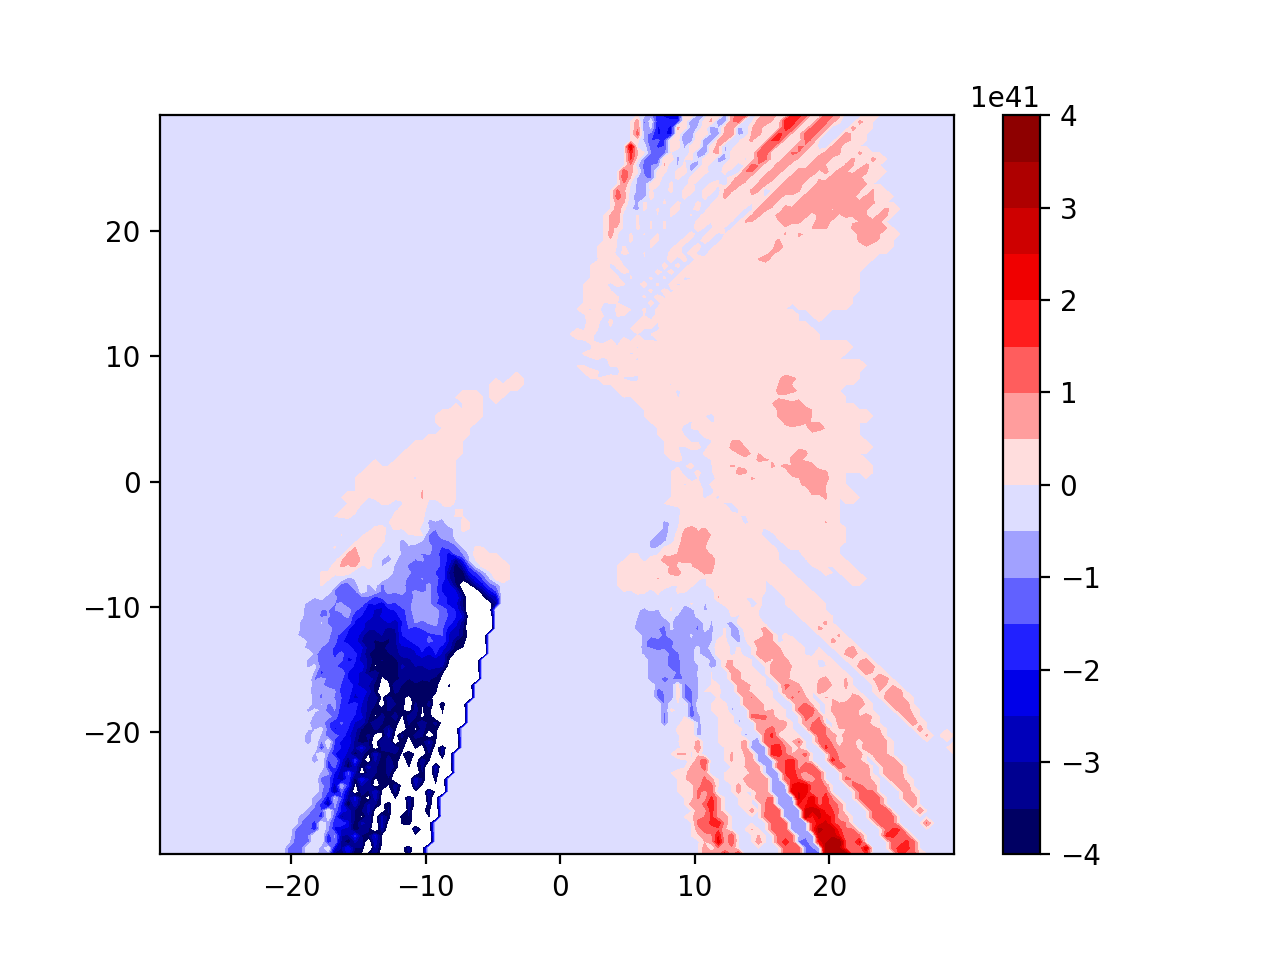

In [153]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np



# make these smaller to increase the resolution
dx, dy = np.median(np.diff(xs)), np.median(np.diff(xs))




fig,  axs = plt.subplots(ncols=1)

z = p_upper-p_lower
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(-z.max(), z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('seismic')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)


cf = axs.contourf(X[:-1, :-1] + dx/2.,
                  Y[:-1, :-1] + dy/2., z,
                  cmap=cmap, levels=levels)
fig.colorbar(cf, ax=axs)



<IPython.core.display.Javascript object>


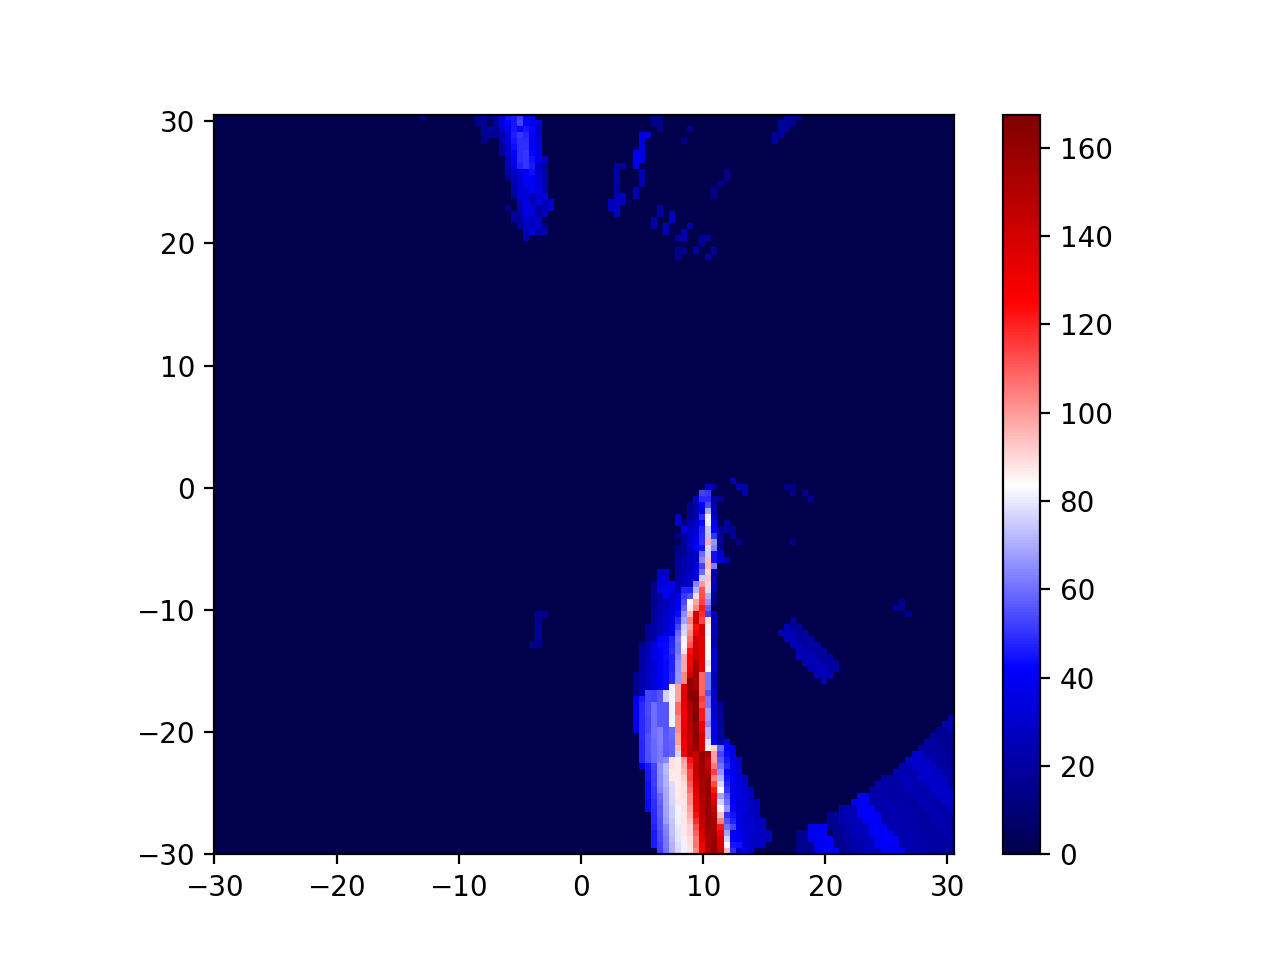

In [1024]:
plt.figure()
plt.imshow(power_grid[:,:,30], cmap='seismic', interpolation='none',extent=[xs[0], xs[-1], ys[0], ys[-1]], origin='lower')
plt.colorbar()

# Healpy and temperature

In [438]:
import glob

In [439]:
files = sorted(glob.glob('fitted_2/*.npz'))

In [440]:
from astropy.coordinates import SkyCoord

In [441]:
def file_sort():
    ls = np.arange(0, 361, 2)
    bs = np.arange(-20, 21, 2)
    start = time.time()
    mw_grid_fix = np.zeros((181, 21, 8192))

    amps = []
    for ii, l in enumerate(ls):
        for jj, b in enumerate(bs):
            # MAke the l and b an even number

            l_even = float(np.round(l/2)*2)
            b_even = float(np.round(b/2)*2)

            # Convert to string
            if b<0:
                b_str = 'n'+str(np.abs(b_even))
                b_opp = str(np.abs(b_even))
            elif int(round(b))==-0:
                b_str='0.0'
            else:
                b_str = str(b_even)
                b_opp = 'n'+str(b_even)
            try:

                # Make file name and import
                file_name = f'fitted_2/real0_1270.0_{str(l_even)}_{b_str}_avg.npz'
                file_opp =  f'fitted_2/real0_1270.0_{str(l_even)}_{b_opp}_avg.npz'
                fin = np.load(file_name, allow_pickle=True)
                fop = np.load(file_opp, allow_pickle=True)
                dat = np.abs(fin['real0_fix']*cal)


                mw_grid_fix[ii,jj] = dat
            except FileNotFoundError:
                pass


        if ii%60==0:
            time_tot = time.time() - start
            print(f'{ii}/{len(ls)} done in {time_tot} sec')
            start = time.time()
            
    return mw_grid_fix

In [443]:
import time

In [444]:
mw_fix = file_sort()

0/181 done in 0.020591259002685547 sec
60/181 done in 2.7337050437927246 sec
120/181 done in 2.6647732257843018 sec
180/181 done in 0.15432286262512207 sec


In [445]:
def get_thingys(grid, res=4):
    sumation = np.sum(grid, axis=2)/8192
    ls = np.arange(0, 362, 2/res)
    bs = np.arange(-20, 21, 2/res)
    ls_new = []
    bs_new = []
    ra_wanted = []
    dec_wanted = []
    amps = []
    for i, l in enumerate(ls):
        for j, b in enumerate(bs):
            ls_new.append(l)
            bs_new.append(b)
#             c = SkyCoord(l, b, frame='galactic',unit='deg')   
#             ra_dec = c.transform_to('fk5')
#             ra_wanted.append(ra_dec.ra.radian*180/np.pi)
#             dec_wanted.append(ra_dec.dec.radian*180/np.pi)
            weights = [1-l%2/2,l%2/2]
            amp1 = sumation[int(i/res)-1, int(j/res)-1]
            amp2 = sumation[int(i/res), int(j/res)]
            amp = (amp1*weights[0]+amp2*weights[1])/2
            amps.append(amp)
        if l%90==0:
            print(l)
    return np.array(ls_new), np.array(bs_new), np.array(ra_wanted), np.array(dec_wanted), np.array(amps)

In [446]:
ls_new, bs_new, ra_wanted, dec_wanted, amps = get_thingys(mw_fix, 1)

0.0
90.0
180.0
270.0
360.0


In [1295]:
# lower = np.sum(mw[:,:9, :], axis=1)
# upper = np.sum(mw[:,12:, :], axis=1)

lower_fix = np.sum(mw_fix[:,:10, :], axis=1)
upper_fix = np.sum(mw_fix[:,11:, :], axis=1)

chi2 = (upper_fix.T-lower_fix.T)**2/(upper_fix.T+lower_fix.T)

<ipython-input-1295-f65137ddbb78>:7: RuntimeWarning: invalid value encountered in true_divide
  chi2 = (upper_fix.T-lower_fix.T)**2/(upper_fix.T+lower_fix.T)


<IPython.core.display.Javascript object>


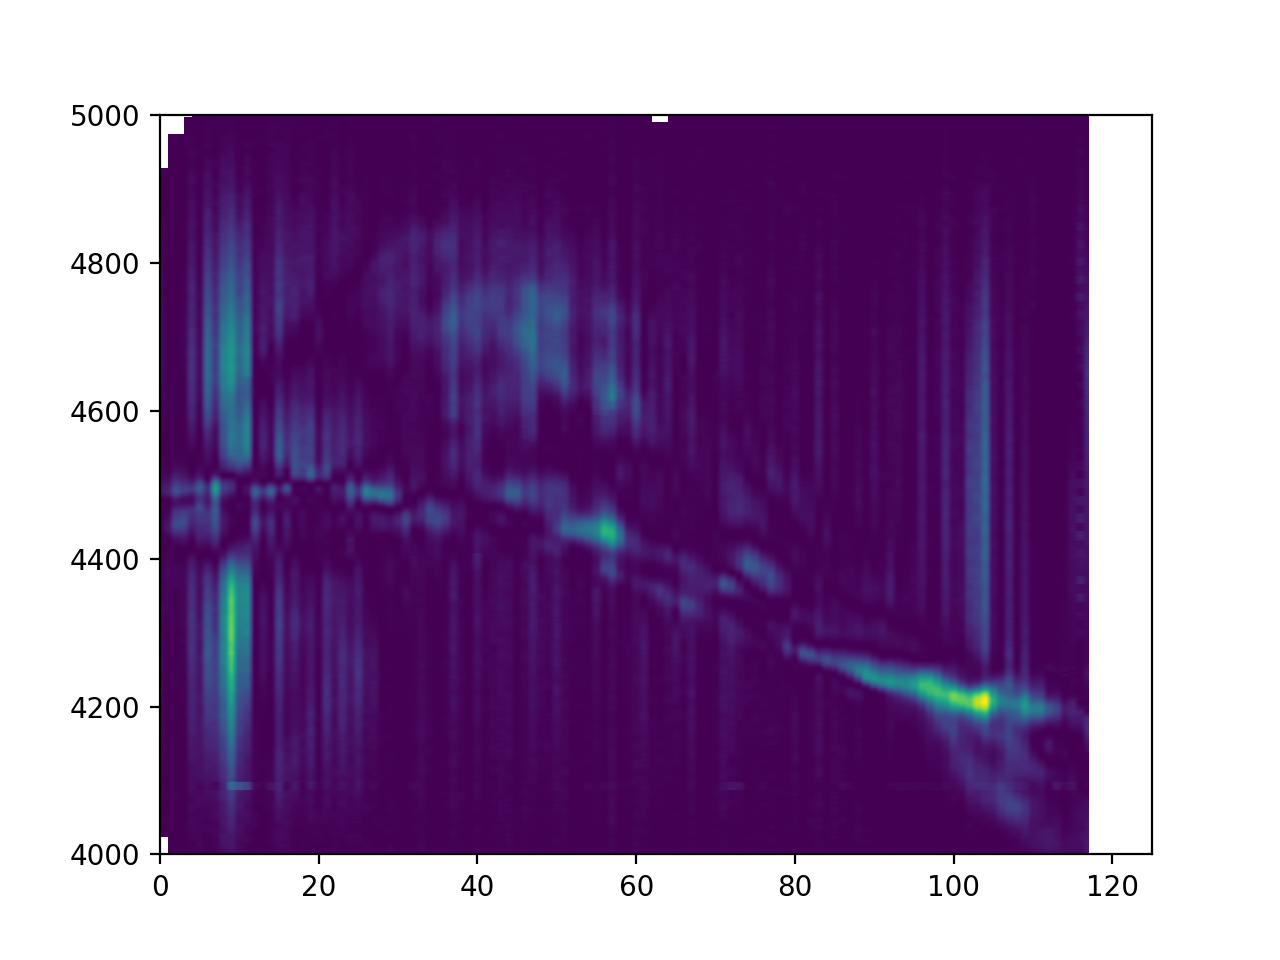

(4000.0, 5000.0)

In [1293]:
plt.figure()
plt.imshow(chi2, aspect='auto', origin='lower')
plt.xlim(0, 125)
plt.ylim(4000, 5000)

<IPython.core.display.Javascript object>


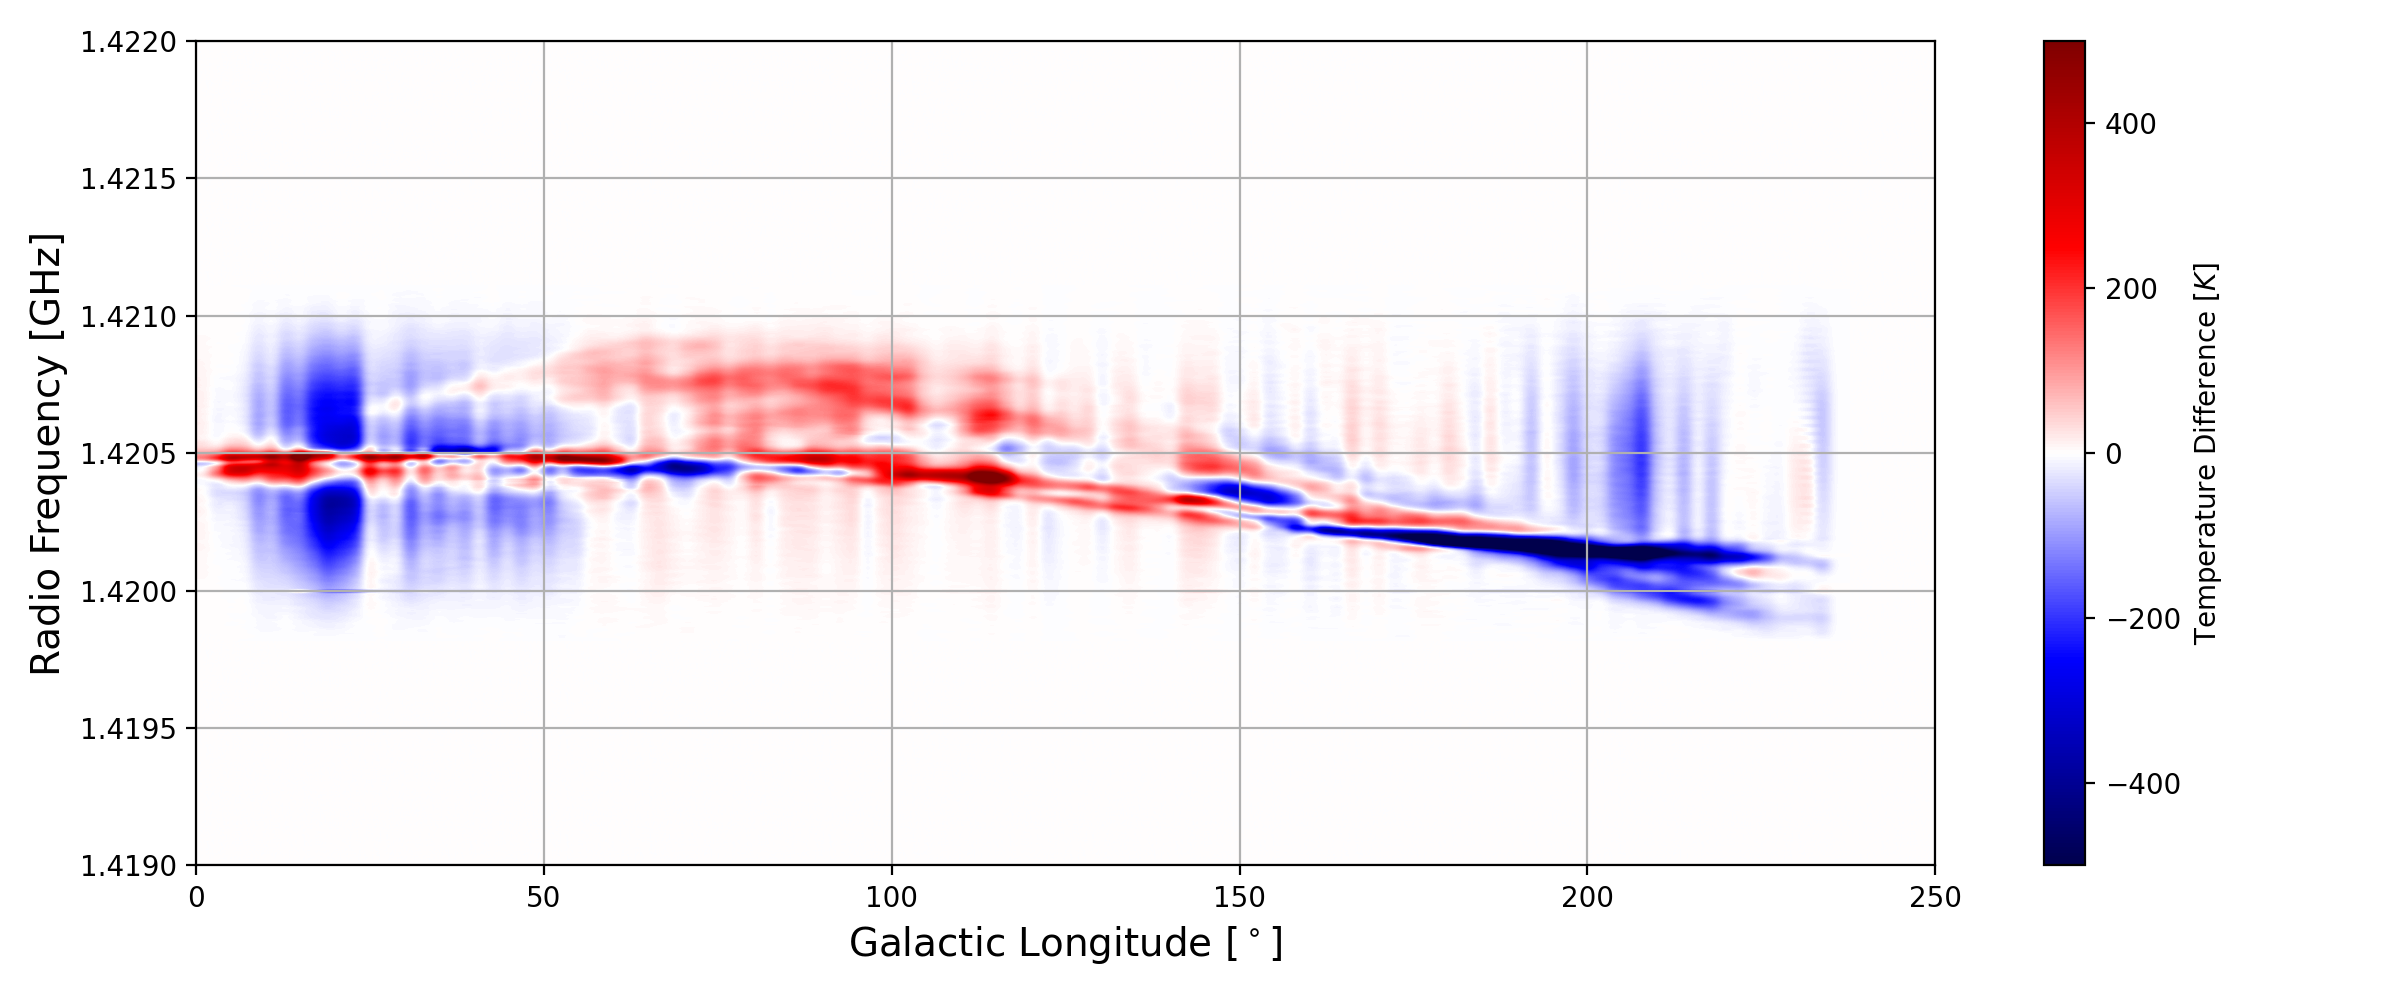

In [1300]:
plt.figure(figsize=(12,5))
# plt.subplot(121)
# plt.imshow((upper-lower), vmin=-5, vmax=5, aspect='auto', extent=[0, 360,f[0], f[-1]], origin='lower', cmap='seismic', alpha=.8)
# plt.subplot(122)
# plt.imshow(colors, aspect='auto')
plt.imshow((upper_fix.T-lower_fix.T),vmin=-500, vmax=500, 
           aspect='auto', extent=[0, 360,f[0]/1e9, f[-1]/1e9],
           origin='lower', cmap='seismic', 
          interpolation='gaussian', alpha=1)
# plt.imshow((upper_fix.T),vmin=0, vmax=500, 
#            aspect='auto', extent=[0, 360,f[0]/1e9, f[-1]/1e9],
#            origin='lower', cmap='Blues', 
#           interpolation='gaussian', alpha=.5)

# plt.imshow((mw_fix[:,10,:].T), 
#            aspect='auto', extent=[0, 360,f[0]/1e9, f[-1]/1e9],
#            origin='lower', cmap='seismic', 
#           interpolation='gaussian')
# plt.imshow(, aspect='auto', extent=[f[0], f[-1], 0, 360], origin='lower', cmap='Blues', alpha=.5)
plt.grid()
plt.ylim(1.419, 1.422)
plt.xlim(0, 250)
plt.xlabel(r'Galactic Longitude [$^\circ$]', fontsize=14)
plt.ylabel('Radio Frequency [GHz]', fontsize=14)
plt.colorbar(label='Temperature Difference [$K$]')
plt.tight_layout()
plt.savefig('warp_diff.pdf')



<IPython.core.display.Javascript object>


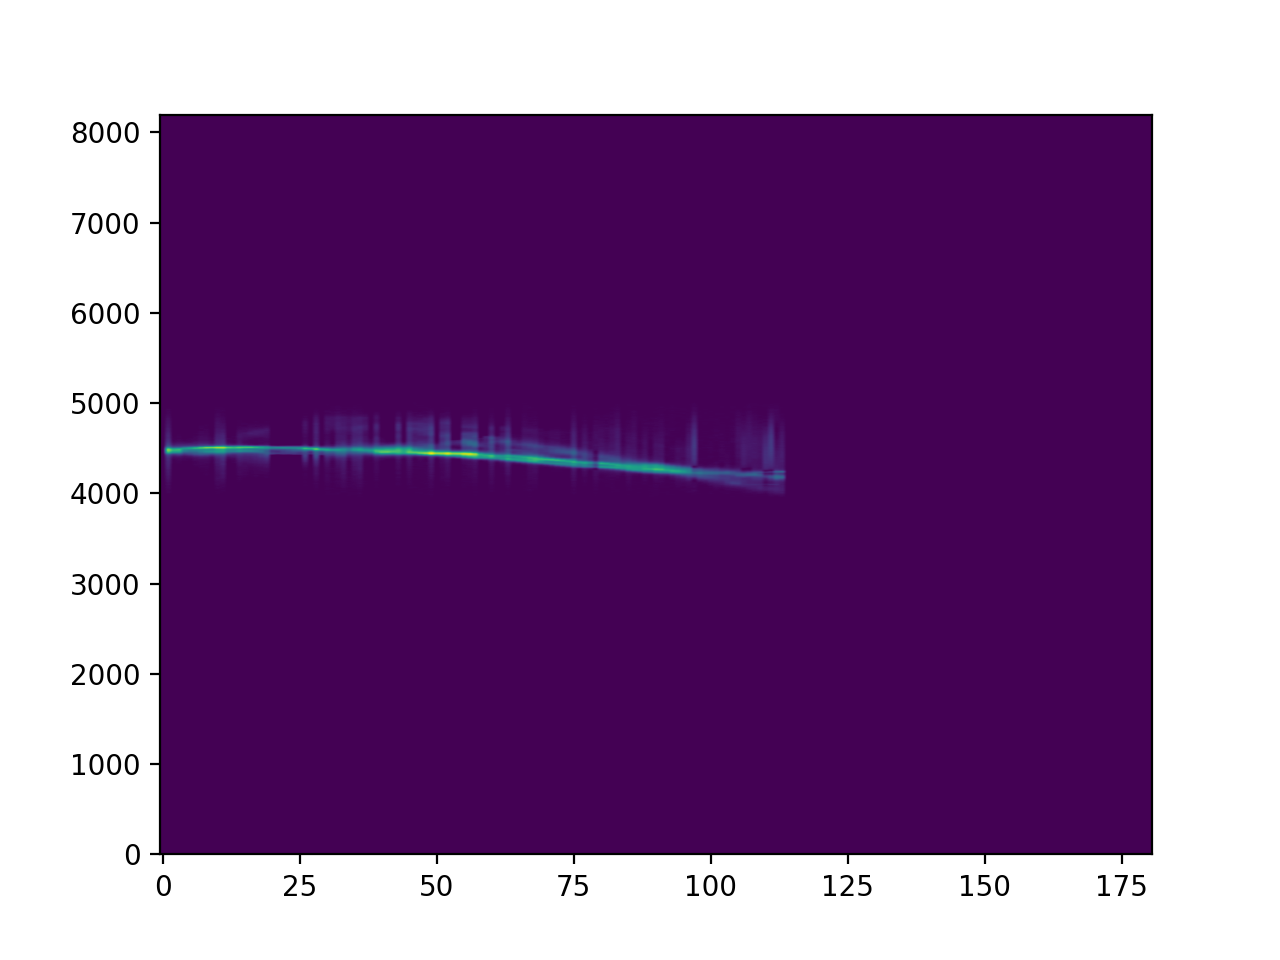

In [1277]:
plt.figure()
plt.imshow(mw_fix[:,14,:].T, aspect='auto', origin='lower')

In [1278]:
fractional temperature difference /total difference

mass of hydrogen

SyntaxError: invalid syntax (<ipython-input-1278-e75bc003f955>, line 1)

In [1279]:
look for the biggest temperature differences and the the velocities that they corresopnd with and the distances to those points and where they live in the mw

SyntaxError: invalid syntax (<ipython-input-1279-a53bcfb07239>, line 1)

In [1280]:
diff = (lower_fix-upper_fix)



In [1281]:
diff.shape

(181, 8192)

In [1282]:
pos = []
neg = []
biggest_pos = 0
for i in np.arange(10, len(ls)):
    for j in range(8192):
        if diff[i,j]>0:
            pos.append(np.abs(diff[i,j]))
            if np.abs(diff[i,j]) > biggest_pos:
                biggest_pos = np.abs(diff[i,j])
                biggest_l = ls[i]
                biggest_f = f[j]
                biggest_v = v[j]
        elif diff[i,j]<0:
            neg.append(np.abs(diff[i,j]))
            

NameError: name 'ls' is not defined

In [1283]:
biggest_pos
biggest_l

NameError: name 'biggest_l' is not defined

In [1284]:
r = ((biggest_v)/220/sun_mag/np.sin(-float(biggest_l)*np.pi/180)/np.cos(float(b)*np.pi/180)+1/8.5)**-1



NameError: name 'biggest_v' is not defined

In [1285]:
r

array([30.        , 29.8370575 , 29.68164416, ..., 29.16761903,
       29.33428029, 29.50847336])

In [1286]:
np.sum(neg)/(np.sum(pos)+np.sum(neg))

<ipython-input-1286-e79880c957f2>:1: RuntimeWarning: invalid value encountered in double_scalars
  np.sum(neg)/(np.sum(pos)+np.sum(neg))


nan

In [1109]:
bs_lower = np.arange(-10, 0, 2)
bs = np.arange(-20, 21, 2)

In [1110]:
layer_diff.shape

(181, 8192)

In [1129]:
biggest_diff = 0
for i, b in enumerate(bs_lower):
    index_upper = np.where(bs==-b)[0][0]
    print(b, bs[index_upper])
    layer_diff = (mw_fix[:, i, :] - mw_fix[:,index_upper, :])
    for l in range(len(ls)):
        for t in range(8192):
            if np.abs(layer_diff[l,t])>biggest_diff:
                r = get_rs(float(ls[l]), float(b), v[t])
                if r>8.5:
                    biggest_diff = np.abs(layer_diff[l, t])
                    biggest_l= ls[l]
                    biggest_b = b
                    biggest_v = v[t]
                    biggest_f = f[t]
                else:
                    continue

-10 10


FileNotFoundError: [Errno 2] No such file or directory: 'fitted_2/real0_1270.0_100.0_n10.0_avg.npz'

In [1123]:
print(biggest_diff, biggest_l, biggest_b, biggest_v, biggest_f)

181.1300169567247 172 -2 20.946674055428133 1420306922.2317178


In [1124]:
sun_mag=8.5

In [1125]:
#calculate the distance to each point in the data
def get_rs(l,b, v):
    _, LSR = get_real_file(l,b)
    try:
        _, b = b.split('n')
    except:
        pass
    rs = ((v-LSR[0])/220/sun_mag/np.sin(-float(l)*np.pi/180)/np.cos(float(b)*np.pi/180)+1/8.5)**-1
    return np.abs(rs)

In [1126]:
r= get_rs(float(biggest_l), float(biggest_b), biggest_v)

In [1127]:
x = r*np.sin(np.radians(biggest_l))
y = (r+8.5)*np.cos(np.radians(biggest_l))
z= r*np.tan(np.radians(biggest_b))
print(x,y,z)

2.702116221639317 -27.643834534118984 -0.6780044208604277


In [1128]:
r

19.415506322695716

# HEalpy

In [399]:
neg_bs = np.where(np.array(bs_new)<0)[0]
pos_bs = np.where(np.array(bs_new)>0)[0]
plane = np.where(np.array(bs_new)==0.0)[0]
ls_new=np.array(ls_new)
bs_new = np.array(bs_new)
amps = np.abs(np.array(amps))
ra_wanted = np.array(ra_wanted)
dec_wanted = np.array(dec_wanted)

In [374]:
# plt.scatter(ra_wanted, dec_wanted, c=np.abs(amps), cmap='Reds', vmin=0, vmax=700, s=5)
# plt.scatter(ls_new[neg_bs], bs_new[neg_bs]*-1, c=np.abs(amps[neg_bs]), cmap='Reds', vmin=0, vmax=700, s=5, alpha=.4)

# fig, axs = plt.subplots(ncols=1, sharey=False, gridspec_kw={'wspace':.3})

# axs.scatter(ra_wanted[neg_bs], dec_wanted[neg_bs], c=np.abs(amps[neg_bs]), cmap='Reds', s=5, alpha=.4, vmin=0, vmax=2000)
# im = axs.scatter(ra_wanted[pos_bs], dec_wanted[pos_bs], c=np.abs(amps[pos_bs]), cmap='Reds', s=5, alpha=.4, vmin=0, vmax=2000)
# axs.scatter(ra_wanted[plane], dec_wanted[plane], c=np.abs(amps[plane]), cmap='Reds', s=5, alpha=.4, vmin=0, vmax=2000)

# fig.colorbar(im, label=r'Averaged Line of Sight $T_b$')
# axs.set_xlabel(r'$\alpha\,[^\circ]$', fontsize=14)
# axs.set_ylabel(r'$\delta\,[^\circ]$', fontsize=14)






In [375]:
import healpy as hp

In [376]:
nside = 128
npix = hp.nside2npix(nside)
m = np.zeros(npix)
i=0
for l, b in zip(ls_new,bs_new):
        pixel = hp.ang2pix(nside, l,b, lonlat=True)
        m[pixel] = amps[i]
        i+=1

In [377]:
for _ in range(10):
    points =m.nonzero()
    pixels = np.arange(npix)[~points[0]]

    # for l, b in zip(ls_needed, bs_needed):
    val = hp.get_interp_weights(m,pixels)
    
    m[pixels] = val

ValueError: [0. 0. 0. ... 0. 0. 0.] is not a valid nside parameter (must be a power of 2, less than 2**30)

<IPython.core.display.Javascript object>


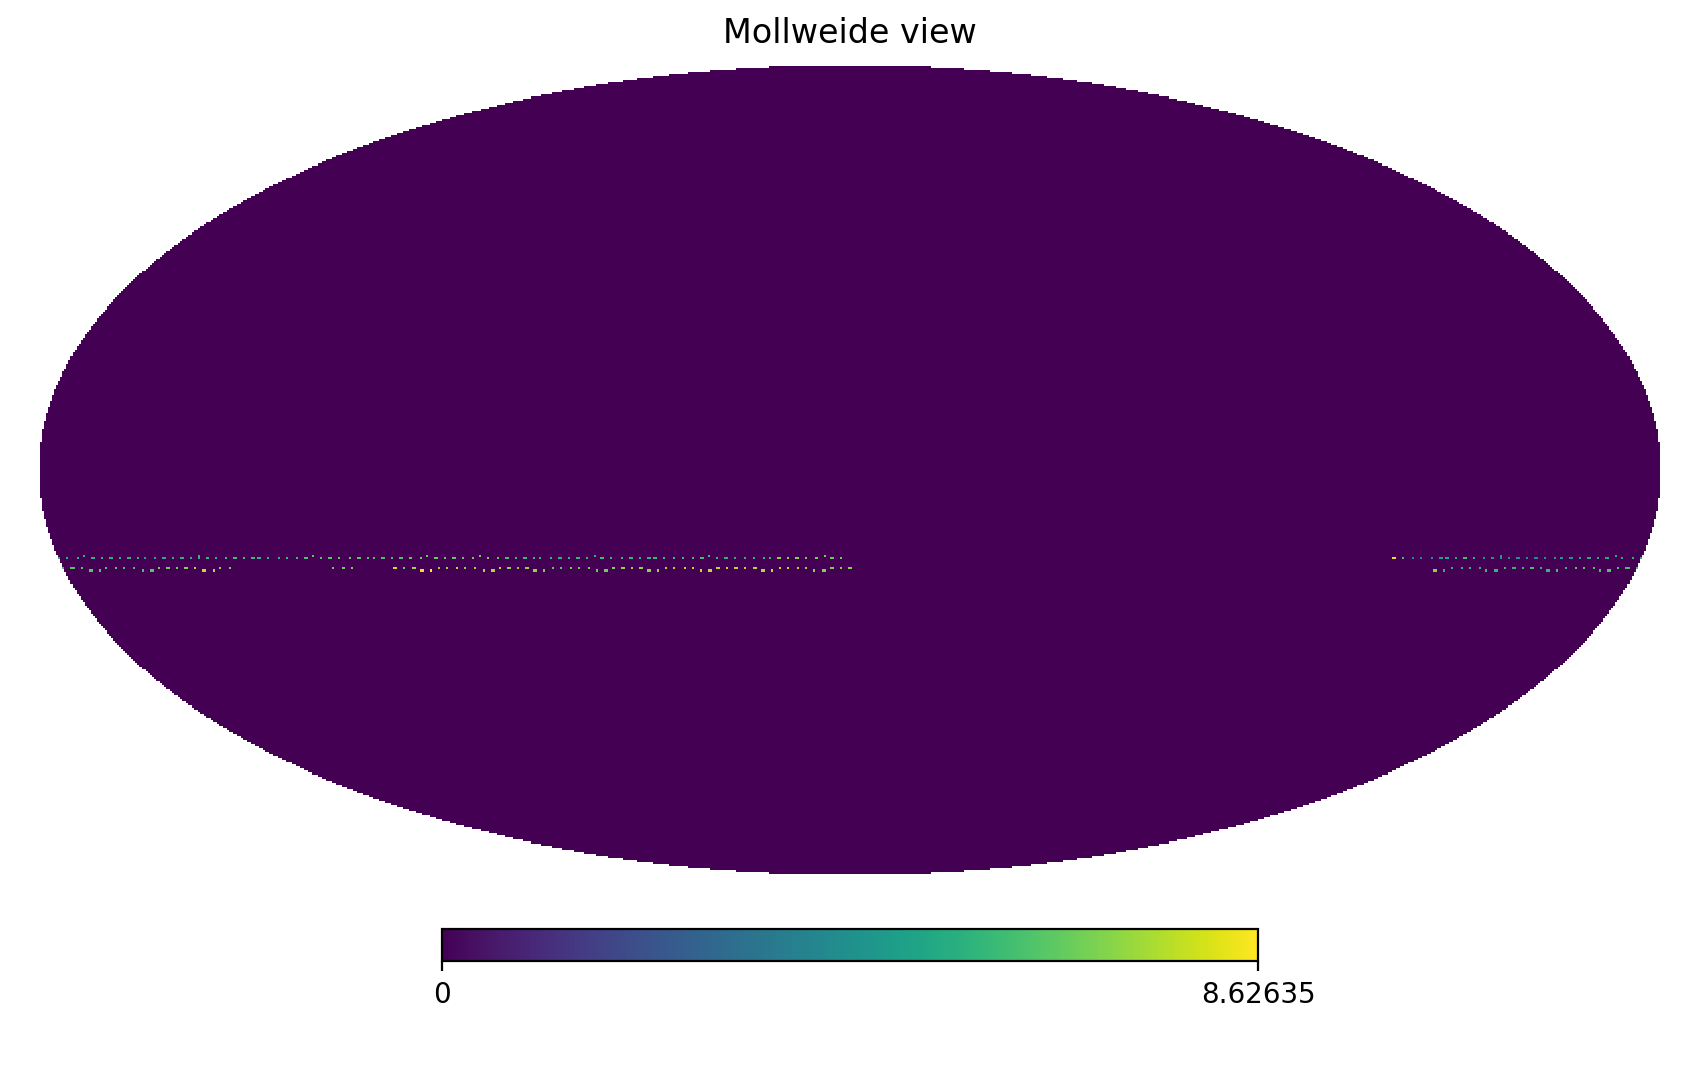

In [378]:
hp.mollview(m)

In [379]:
alphas = mass/mass.max()

NameError: name 'mass' is not defined

In [380]:
# alphas = np.ones(fix_diff.shape)
alphas= mass_over-mass_under

NameError: name 'mass_over' is not defined

In [381]:
from matplotlib.colors import Normalize

In [382]:
# Normalize the colors b/w 0 and 1, we'll then pass an MxNx4 array to imshow
colors = Normalize(-20, 20, clip=True)(fix_diff)
cmap = plt.cm.seismic

colors = cmap(colors)

# Now set the alpha channel to the one we created above
colors[...,-1 ] = alphas

NameError: name 'fix_diff' is not defined

In [383]:
greys = np.full((*fix_diff.shape, 3), 1000, dtype=np.uint8)

NameError: name 'fix_diff' is not defined

<IPython.core.display.Javascript object>


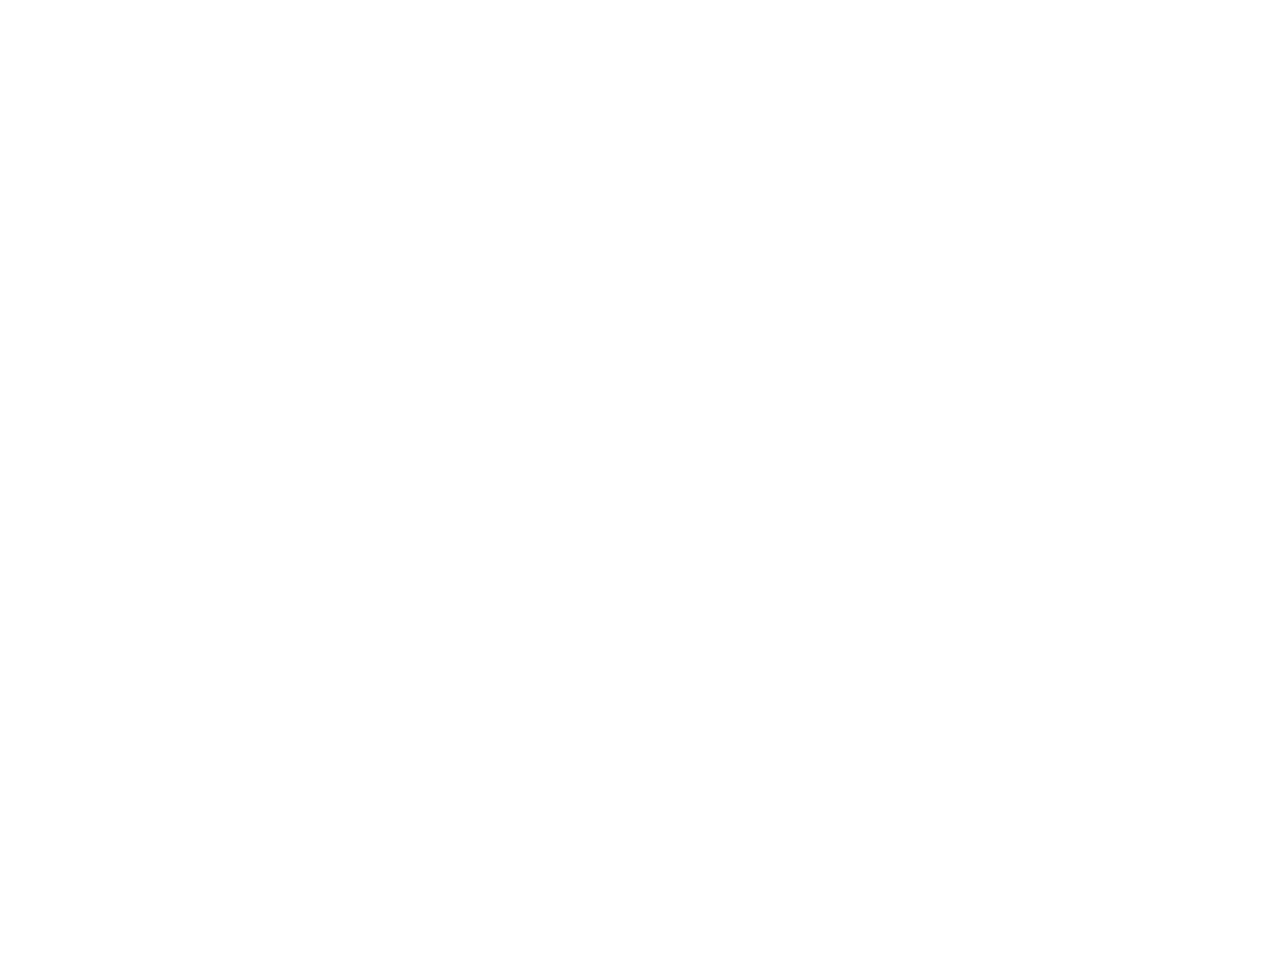

NameError: name 'colors' is not defined

In [384]:
plt.figure()
# plt.imshow(greys)
plt.imshow(colors, aspect='auto', cmap='seismic', vmin=-1, vmax=1, interpolation='gaussian')
# Add contour lines to further highlight different levels.
# plt.contour(fix_diff[::-1], levels=[-.1, .1], colors='k', linestyles='-')
plt.show()
plt.colorbar()

In [391]:
mw_fix

array([[[ 39.52241518,  23.72009825,   7.91778131, ..., 120.73077525,
         123.49447774, 126.25818022],
        [ 43.12365091,  29.25346934,  15.38328776, ..., 116.4244426 ,
         119.01612892, 121.60781524],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ]],

       [[ 39.07067421,  23.16612746,   7.26158071, ..., 119.93961497,
         122.64185923, 125.34410349],
        [ 43.10338589,  28.83919553,  14.57500516, ..., 116.83631983,
         119.38969154, 121.94306325],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        ...,


<IPython.core.display.Javascript object>


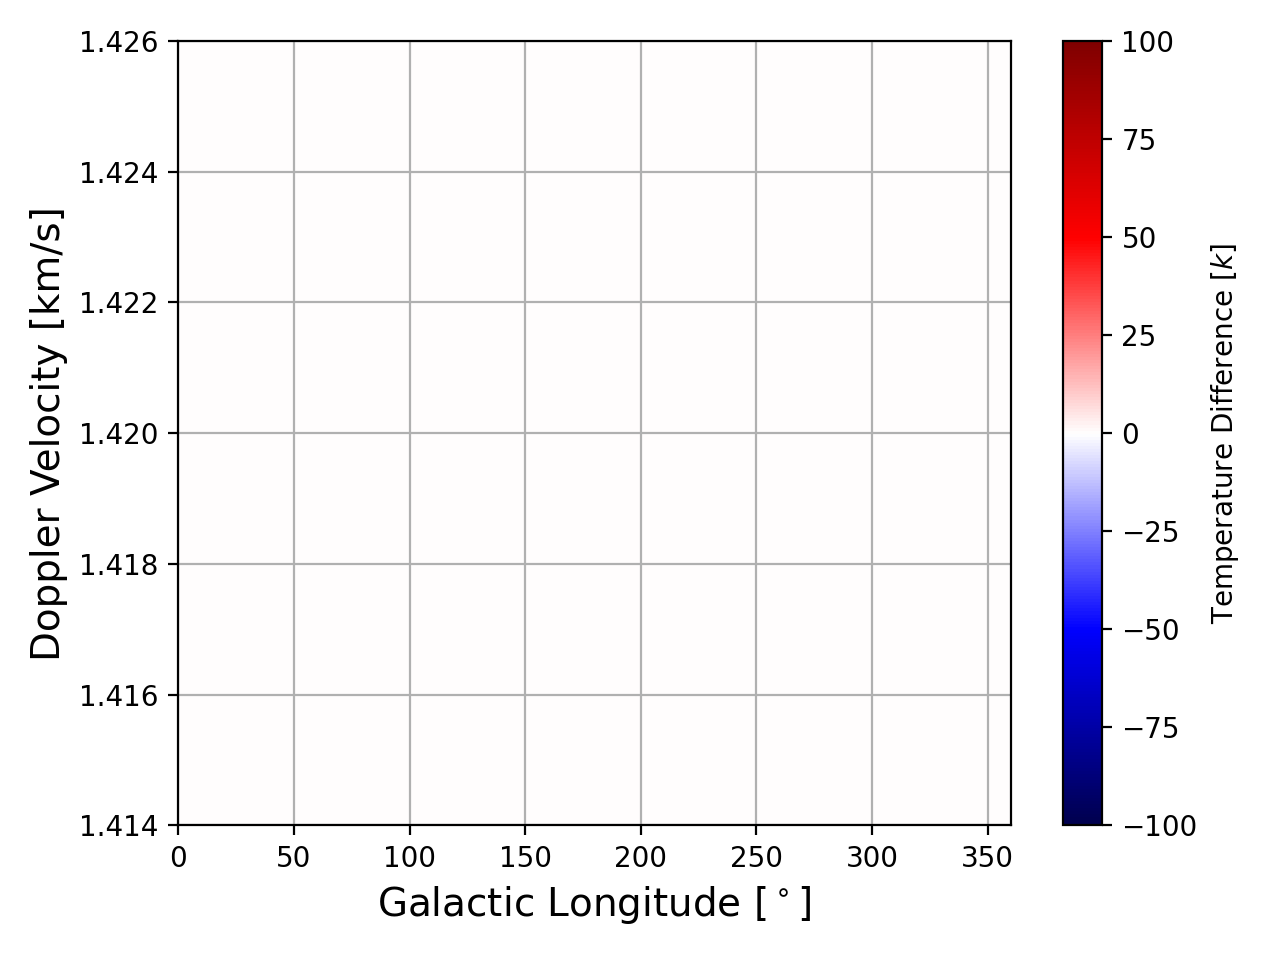

In [386]:
def get_real_file(l, b=0.0):
    try:
        _,b = str(b).split('-')
        b = 'n'+str(b)
    except:
        pass
    file = f'fitted_2/real0_{1270.0}_{l}_{b}_avg.npz'
    f_in = np.load(file, allow_pickle=True)
    f_fix = f_in['real0_fix']*30612.526363412657
    lsr = f_in['LSR']
    return f_fix, lsr

In [387]:
#calculate the distance to each point in the data
def get_rs(l,b, v):
    fin, LSR = get_real_file(l,b)
    rs = ((v)/220/sun_mag/np.sin(float(l)*np.pi/180)/np.cos(float(b)*np.pi/180)+1/8.5)**-1
    return rs, fin

In [388]:
def MassH1(l,b,v, m_h=1.6735e-27, Omega_b=2.5**2, Ta=50):
    delta_v = v
    d, fin = get_rs(l,b,v)
    return np.sum(1.8e18 * v*fin/.0681)# * m_h)# * Ta * np.radians(Omega_b))

In [389]:
def tau(l,b,v, m_h=1.6735e-27, Omega_b=2.5**2, Ta=50):
    d, fin = get_rs(l,b,v)
    tau = -np.log(fin/.0681-1)
    tau = np.nan_to_num(tau, 0)
    return 1.8e18*.0681*np.sum(tau*np.median(np.diff(v)))

In [990]:
ls = np.arange(0, 361, 2)
bs = np.arange(-20, 21, 2)

In [991]:
test_mass = np.zeros((len(ls), len(bs)))

f = np.linspace(145e6, 155e6, 8192)+1270e6
v = 3e8*(1420.4e6-f)/1420.4e6/1e3
for i,l in enumerate(ls):
    for j,b in enumerate(bs):
        try:
            l_even, b_even = float(round(l)), float(round(b))

            mass = tau(l_even, b_even, v)
            test_mass[i,j] = mass
        except FileNotFoundError:
            pass

        

<ipython-input-878-b46e90dcef0b>:4: RuntimeWarning: divide by zero encountered in true_divide
  rs = ((v)/220/sun_mag/np.sin(float(l)*np.pi/180)/np.cos(float(b)*np.pi/180)+1/8.5)**-1
<ipython-input-989-675c364ebc5e>:3: RuntimeWarning: invalid value encountered in log
  tau = -np.log(fin/.0681-1)


In [993]:
from matplotlib.colors import LogNorm

In [995]:
mass_over = np.sum(test_mass[:, :11], axis=1)
mass_under = np.sum(test_mass[:, 10:], axis=1)



<IPython.core.display.Javascript object>


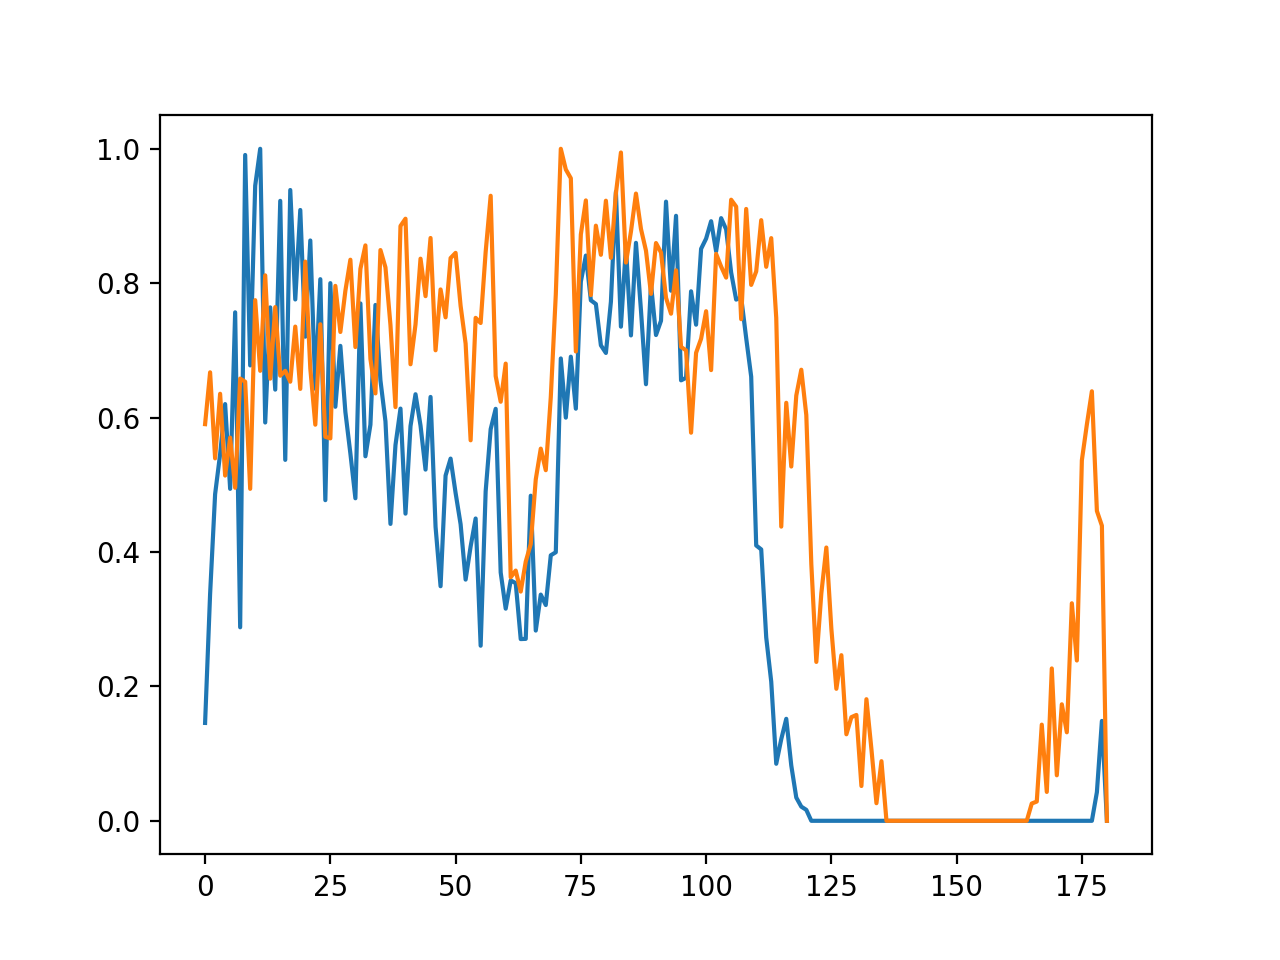

In [996]:
plt.figure()
plt.plot(mass_over/mass_over.max())
plt.plot(mass_under/mass_under.max())

In [256]:
from matplotlib.colors import LogNorm

In [ ]:
# difference symetrically and sum up residiuals

# Whole new approach

In [3]:
import glob

In [4]:
files =  sorted(glob.glob('fitted_2/*.npz'))

In [11]:
# from __future__ import absolute_import
# import numpy as np
# from scipy.optimize import curve_fit

# def _pack_prms(amp, avg, sig):
#     '''Internal. Convert user arguments to parameter list.'''
#     prms = np.array([amp, avg, sig])
#     prms.shape = (3,-1)
#     return prms.T.flatten()

# def _unpack_prms(prms):
#     '''Internal. Convert parameter list to user arguments.'''
#     amp = np.array(prms[0::3]); amp.shape = (-1,1)
#     avg = np.array(prms[1::3]); avg.shape = (-1,1)
#     sig = np.array(prms[2::3]); sig.shape = (-1,1)
#     return amp, avg, sig

# def _gauss(x, *prms):
#     '''Internal. Gaussian model that is fit to the data.'''
#     amp, avg, sig = _unpack_prms(prms)
#     ans = amp * np.exp(-(x-avg)**2/(2.*sig**2))
#     return np.sum(amp * np.exp(-(x-avg)**2/(2.*sig**2)), axis=0)

# def gaussfit(x, y, amp=1., avg=0., sig=1., return_cov=False):
#     '''Fit amp, avg, and sig for a Gaussian [y = amp * e^(-(x-avg)^2/(2*sig^2)].
#     amp/avg/sig can be lists/arrays to simultaneously fit multiple Gaussians.
#     Parameters
#     ----------
#     x : x coordinate at which Gaussian is evaluated
#     y : measured y coordinate to which Gaussian is compared
#     amp : first guess at amp, the amplitude(s) of the Gaussian(s), default=1.
#     avg : first guess at avg, the average(s) of the Gaussian(s), default=0.
#     sig : first guess at sig, the width(s) of the Gaussian(s), default=1.
#     return_cov : return the [amp, avg, sig] covariance matrix of the solution
#     Returns
#     -------
#     ans : dictionary with amp/avg/sig keys and fit solutions as values.
#     prm_covariance : the [amp, avg, sig] covariance matrix'''
#     prms0 = _pack_prms(amp, avg, sig)
#     prms, prm_covariance = curve_fit(_gauss, x, y, p0=prms0)
#     amp, avg, sig = _unpack_prms(prms)
#     ans = {'amp':amp.flatten(), 'avg':avg.flatten(), 'sig':sig.flatten()}
#     if return_cov:
#         return ans, prm_covariance
#     else:
#         return ans

# def gaussval(x, amp, avg, sig):
#     '''Evaluate a Gaussian given amp, avg, and sig [y = amp * e^(-(x-avg)^2/(2*sig^2)].
#     amp/avg/sig can be lists/arrays to simultaneously fit multiple Gaussians.
#     Parameters
#     ----------
#     x : x coordinate at which Gaussian is evaluated
#     amp : amplitude(s) of Gaussian(s)
#     avg : center point(s) of Gaussian(s)
#     sig : width(s) of Gaussian(s)
#     Returns
#     -------
#     y : the evaluated Gaussian [y = amp * e^(-(x-avg)^2/(2*sig^2)]'''
#     prms = _pack_prms(amp, avg, sig)
#     return _gauss(x, *prms)

In [12]:
# params = gaussfit(v-fin['LSR'], fin['real0_fix'], avg=[-30, 0, 30], amp=[.001,.001, .001], sig=[1,1, 1])
# gausses = [gaussval(v-fin['LSR'], amp, avg, sig) for amp, avg, sig in zip(params['amp'], params['avg'], params['sig'])]

In [13]:
# for ii, file in enumerate(files):
#     fin = np.load(file)
#     try:
#         name = file.split('/')[1]
#         if os.path.exists('gauss_fit/'+name):
#             pass
#         else:
#             params = gaussfit(v-fin['LSR'], fin['real0_fix'], avg=[0], amp=[.001], sig=[1])
#             gausses = np.array([gaussval(v-fin['LSR'], amp, avg, sig) for amp, avg, sig in zip(params['amp'], params['avg'], params['sig'])])
# #             if np.min(gausses[0, :])<0:
# #                 gausses = gausses[1:,:]
# #                 params['amp'] = params['amp'][1:]
# #                 params['avg'] = params['avg'][1:]
# #                 params['sig'] = params['sig'][1:]

# #             elif np.min(gausses[1, :])<0:
# #                 gausses = [gausses[1], gausses[-1]]

# #                 params['amp'] = np.array([params['amp'][1], params['amp'][-1]])
# #                 params['avg'] = np.array([params['avg'][1], params['avg'][-1]])
# #                 params['sig'] = np.array([params['sig'][1], params['sig'][-1]])

# #             elif np.min(gausses[2, :])<0:
# #                 gausses = gausses[:-1, :]
# #                 params['amp'] = params['amp'][:-1]
# #                 params['avg'] = params['avg'][:-1]
# #                 params['sig'] = params['sig'][:-1]

#             np.savez('gauss_fit/'+name, gauss=gausses, params=params)
#             if ii%100==0:
#                 print(f'{ii}/{len(files)} saved')
#     except RuntimeError:
#         print(file)
#         pass
    

In [5]:
#calculate the distance to each point in the data
def get_rs(l,b, v):
    _, LSR = get_real_file(l,b)
    try:
        _, b = b.split('n')
    except:
        pass
    rs = ((v-LSR[0])/220/sun_mag/np.sin(-float(l)*np.pi/180)/np.cos(float(b)*np.pi/180)+1/8.5)**-1
    return rs

In [6]:
ls = np.linspace(0, 360, 180)
bs = np.linspace(-20, 20, 20)

In [7]:
import time
from astropy.coordinates import SkyCoord

In [22]:
xs = []
ys= []
amps= []
sigxs = []
sigys = []
zs = []
files_used = []
start = time.time()
l_used = []
b_used = []
ra_used = []
dec_used = []
for ii, l in enumerate(ls):
    for jj, b in enumerate(bs):
        # MAke the l and b an even number
        
        l_even = float(np.round(l/2)*2)
        b_even = float(np.round(b/2)*2)
        
        # Convert to string
        if b<0:
            b_str = 'n'+str(np.abs(b_even))
        elif int(round(b))==-0:
            b_str='0.0'
        else:
            b_str = str(b_even)
        try:
            
            # Make file name and import
            file_name = f'gauss_fit/real0_1270.0_{str(l_even)}_{b_str}_avg.npz'
            fin = np.load(file_name, allow_pickle=True)
            
            params = fin['params'].ravel()[0]
            for avg, amp, sig in zip(params['avg'], params['amp'], params['sig']):
#                 if amp >0:
                r = get_rs(l_even, b_even, avg)
                sig = get_rs(l_even, b_even, sig)
                l_rad = -np.radians(float(l_even))
                
                x = r*np.cos(l_rad-np.pi/2)
                
                sig_x = sig*np.sin(l_rad)
                y= r*np.sin(l_rad-np.pi/2)
                
                sig_y = sig*np.cos(l_rad)
                z = r*np.tan(np.radians(b))
                xs.append(x)
                ys.append(y)
                zs.append(z)
                amps.append(amp*30612.526363412657)
                sigxs.append(sig_x)
                sigys.append(sig_y)
                c = SkyCoord(l, b, frame='galactic',unit='deg')   
                ra_dec = c.transform_to('fk5')                                       # convert the l,b to ra, dec and store in grid
                l_used.append(l)
                b_used.append(b)
                ra_used.append(ra_dec.ra.radian*180/np.pi)
                dec_used.append(ra_dec.dec.radian*180/np.pi)
#                 files_used.append(file)
#                 else:
#                     print('meh')
#                     pass
        except FileNotFoundError:
            pass

        
    if ii%100==0:
        time_tot = time.time() - start
        print(f'{ii}/{len(ls)} done in {time_tot} sec')
        start = time.time()
# plt.xlim(-30, 30)
# plt.ylim(-30, 30)

<ipython-input-19-704948aa0762>:8: RuntimeWarning: divide by zero encountered in double_scalars
  rs = ((v-LSR[0])/220/sun_mag/np.sin(-float(l)*np.pi/180)/np.cos(float(b)*np.pi/180)+1/8.5)**-1


0/180 done in 0.1917119026184082 sec
100/180 done in 27.16308617591858 sec


<IPython.core.display.Javascript object>


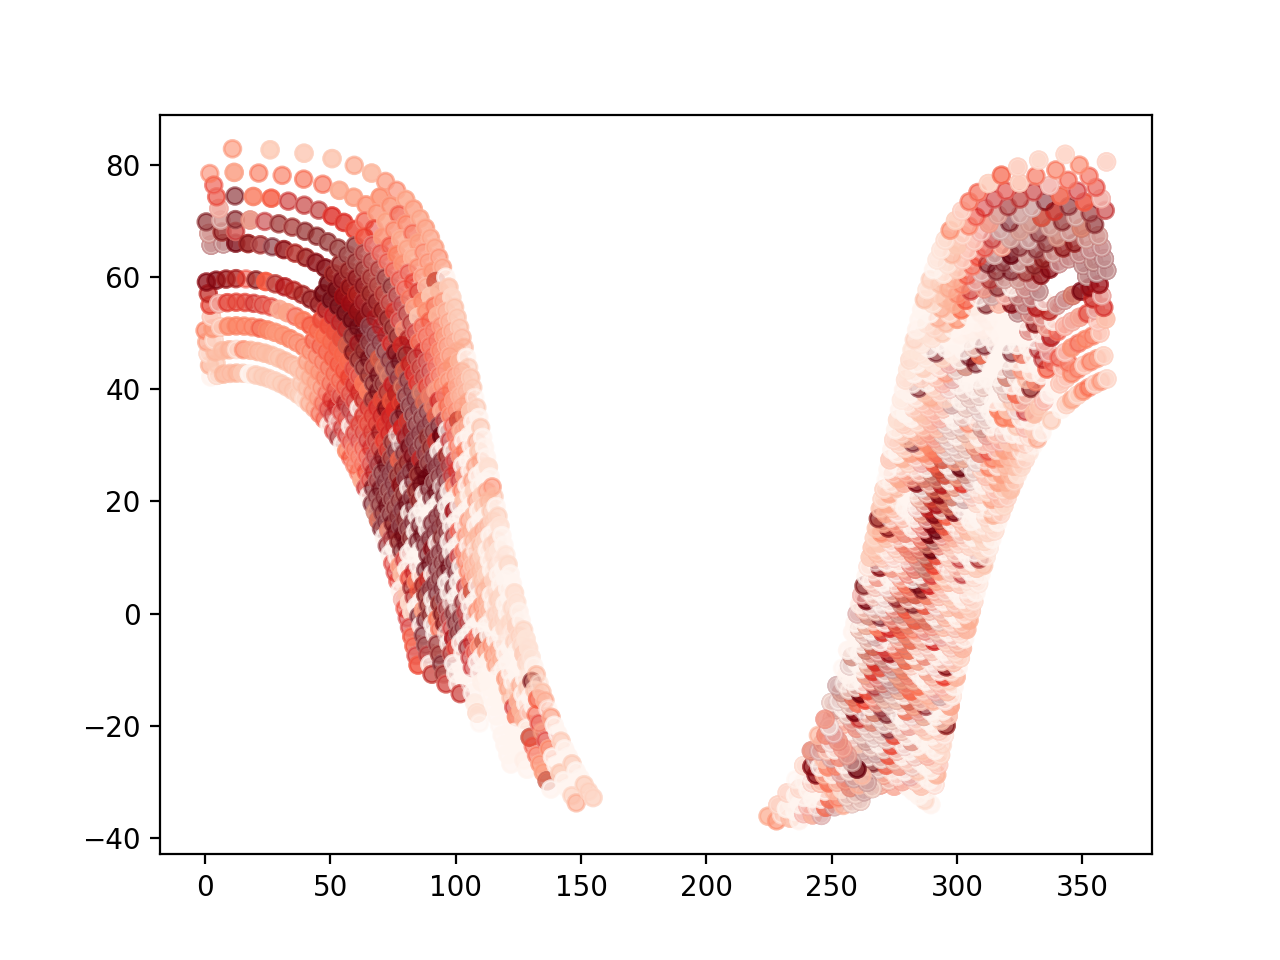

In [23]:
plt.figure()
plt.scatter(ra_used, dec_used, c=amps, alpha=.5, cmap='Reds', vmin=0, vmax=120)

In [24]:
xs = np.array(xs)
ys = np.array(ys)
zs = np.array(zs)
sigxs = np.abs(np.array(sigxs))
sigys = np.abs(np.array(sigys))
amps = np.array(amps)





In [25]:
theta = np.pi/180 * 0
R1 = np.array([ [1, 0, 0],
             [0, np.cos(theta), -np.sin(theta)], 
              [0, np.sin(theta), np.cos(theta)]])

In [26]:
phi = np.pi/180*0
R2 = np.array([
             [ np.cos(phi),0, np.sin(phi)], 
                 [0, 1, 0],
              [-np.sin(phi),0, np.cos(phi)]])

In [27]:
vector = np.vstack((xs, ys, zs))

In [28]:
R = np.dot(R1, R2)

In [29]:
ROT = np.dot(R, vector)

In [32]:
under = np.where(zs<0)[0]
over = np.where(zs>0)[0]


<IPython.core.display.Javascript object>


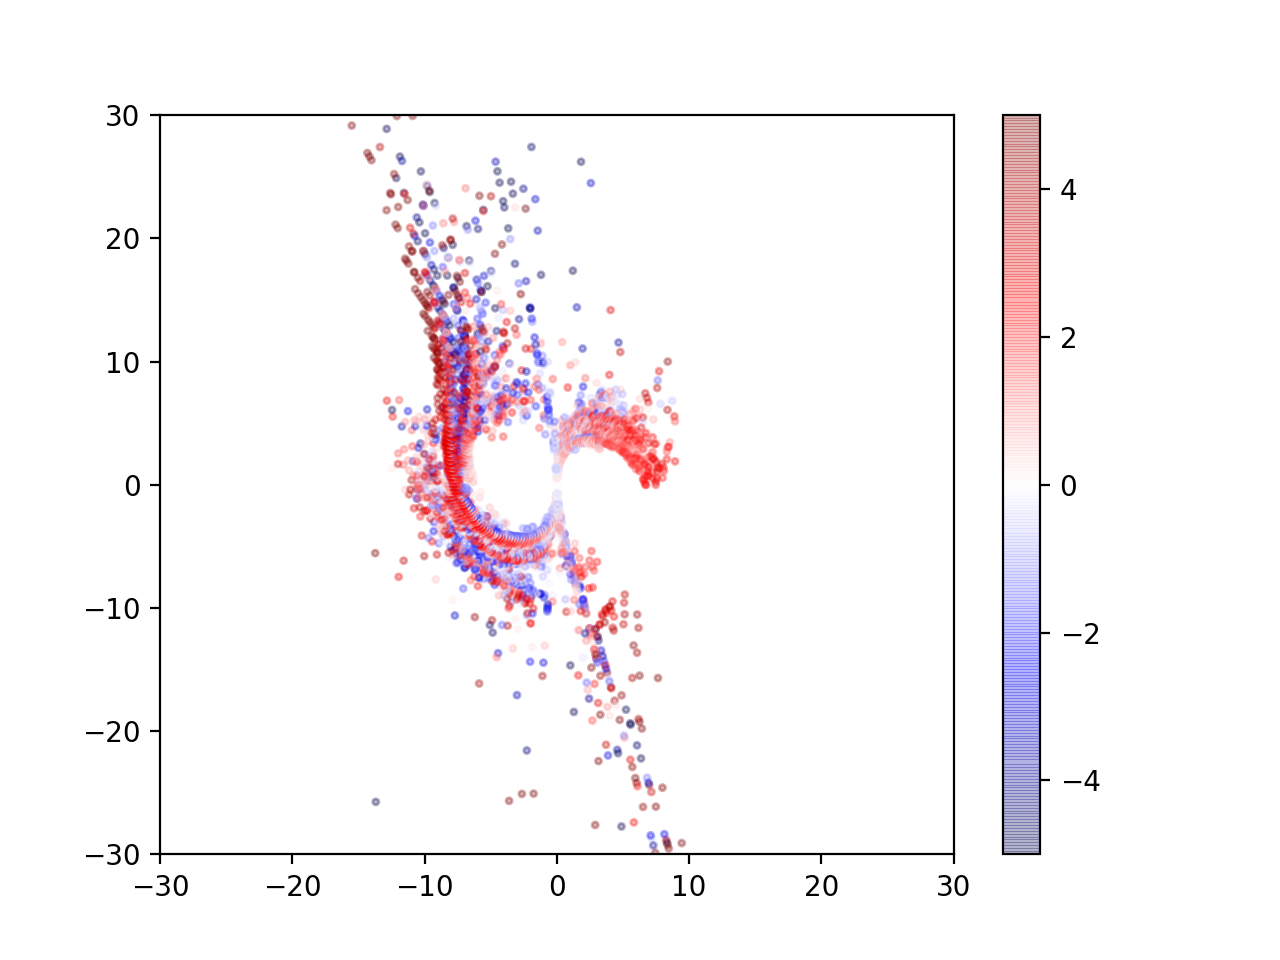

(-30.0, 30.0)

In [33]:
plt.figure()
# plt.scatter(xs[under], ys[under], c=amps[under], alpha=.3,s=1, cmap='Reds', vmin=-1, vmax=1)
# plt.scatter(xs[over], ys[over], c=amps[over], alpha=.3,s=1, cmap='Blues', vmin=-1, vmax=1)
plt.scatter(ROT[0, :], ROT[1,:],c=zs, alpha=.3,s=5, cmap='seismic', vmin=-5, vmax=5)



plt.colorbar()
plt.xlim(-30, 30)
plt.ylim(-30, 30)


<IPython.core.display.Javascript object>


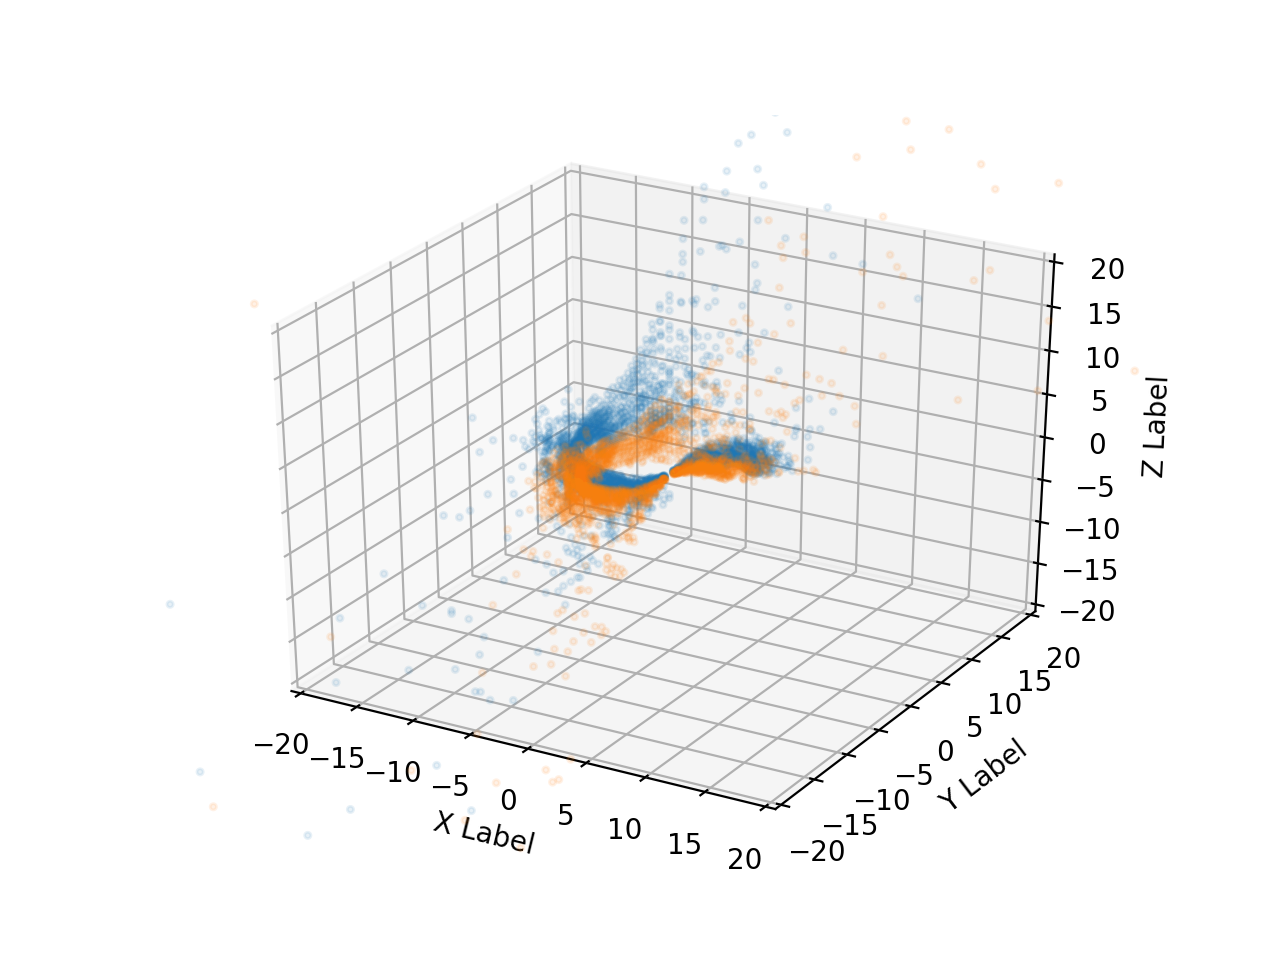

In [34]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

alphas = amps
rgba_colors = np.zeros((len(alphas),4))
# for red the first column needs to be one
rgba_colors[:,0] = 1.0
# the fourth column needs to be your alphas
rgba_colors[:, 3] = alphas


# ax.scatter(ROT[0,:], ROT[1,:], ROT[2,:], c=amps)
ax.scatter(xs[over],ys[over], zs[over], cmap='Reds', s=5, alpha=.1)
ax.scatter(xs[under],ys[under], zs[under], cmap='Blues', s=5, alpha=.1)



ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_zlim(-20, 20)



plt.show()

# Getting Column density

In [7]:
f1 = np.load(files[0])['real0_fix']
f2 = np.load(files[1])['real0_fix']

In [8]:
np.concatenate((f1, f2)).shape

(16384,)

In [9]:
#calculate the distance to each point in the data
def get_rs(l,b, v):
    _, LSR = get_real_file(l,b)
    try:
        _, b = b.split('n')
    except:
        pass
    rs = ((v-LSR[0])/220/sun_mag/np.sin(-float(l)*np.pi/180)/np.cos(float(b)*np.pi/180)+1/8.5)**-1
    return rs

In [584]:
ls = np.arange(0, 361, 2)
bs_upper = np.arange(0, 21, 2)
bs_lower = np.arange(-4, 0, 2)

In [585]:
import time

In [586]:
f = np.linspace(144, 156, 8192)*1e6+1270e6
v = -(f-1420.406e6)/4.73e3

<Quantity 3.08567758e+19 m>

In [846]:
def make_vec(R, l, b):
    x = R*np.sin(l)
    y = (R+8.2)*np.cos(l)
    z = R*np.tan(b)
    return np.linalg.norm(np.array([x,y,z]), axis=0)

In [861]:
v_upper = np.array([])
v_lower = np.array([])
N_upper = np.array([])
N_lower = np.array([])
M_upper = np.array([])
M_lower = np.array([])

start = time.time()

m_h = c.m_p+c.m_e
m_h = m_h.to_value() 
for ii, l in enumerate(ls):
    for jj, b in enumerate(bs_upper):
        # MAke the l and b an even number
        
        l_even = float(np.round(l/2)*2)
        b_even = float(np.round(b/2)*2)
        
        # Convert to string
        if b<0:
            b_str = 'n'+str(np.abs(b_even))
            b_opp = str(np.abs(b_even))
        elif int(round(b))==-0:
            b_str='0.0'
        else:
            b_str = str(b_even)
            b_opp = 'n'+str(b_even)
        try:
            
            # Make file name and import
            file_name = f'fitted_2/real0_1270.0_{str(l_even)}_{b_str}_avg.npz'
            file_opp =  f'fitted_2/real0_1270.0_{str(l_even)}_{b_opp}_avg.npz'
            fin = np.load(file_name, allow_pickle=True)
            fop = np.load(file_opp, allow_pickle=True)
            dat = fin['real0_fix']*cal
            dat_opp = fop['real0_fix']*cal
            LSR = fin['LSR']
            LSR_opp = fop['LSR']
            points = np.where(dat>1e-2)[0]
            points_opp = np.where(dat_opp>1e-2)[0]
            
            v_upper = np.concatenate((hist_upper, (v-LSR)[points]))
            v_lower = np.concatenate((hist_lower, (v-LSR_opp)[points_opp]))
            N_upper = np.concatenate((N_upper, 1.8e18*dat[points]*np.abs(np.median(np.diff(v-LSR)))))
            N_lower = np.concatenate((N_lower, 1.8e18*dat_opp[points_opp]*np.abs(np.median(np.diff(v-LSR_opp)))))
            r_upper = ((v-LSR)[points]/220/8.2/np.sin(-np.radians(l))/np.cos(np.radians(b))+1/8.5)**-1
            r_lower = ((v-LSR_opp)[points_opp]/220/8.2/np.sin(-np.radians(l))/np.cos(np.radians(-b))+1/8.5)**-1
            r_upper = make_vec(r_upper, l, b)
            r_lower = make_vec(r_lower, l, -b)
            dat = dat[points]
            dat_opp = dat_opp[points_opp]
            points = np.where(r_upper>8)[0]
            points_opp=np.where(r_lower>8)[0]
            
            M_upper = np.concatenate((M_upper,  1.8e18*dat[points]*np.abs(np.median(np.diff(v)))*r_upper[points]**2*m_h*np.radians(2.5)**2))
            M_lower = np.concatenate((M_lower,  1.8e18*dat_opp[points_opp]*np.abs(np.median(np.diff(v)))*r_lower[points_opp]**2*m_h*np.radians(2.5)**2))
        except FileNotFoundError:
            pass

        
    if ii%60==0:
        time_tot = time.time() - start
        print(f'{ii}/{len(ls)} done in {time_tot} sec')
        start = time.time()
        


<ipython-input-861-c96b1e24cacb>:46: RuntimeWarning: divide by zero encountered in true_divide
  r_upper = ((v-LSR)[points]/220/8.2/np.sin(-np.radians(l))/np.cos(np.radians(b))+1/8.5)**-1
<ipython-input-861-c96b1e24cacb>:47: RuntimeWarning: divide by zero encountered in true_divide
  r_lower = ((v-LSR_opp)[points_opp]/220/8.2/np.sin(-np.radians(l))/np.cos(np.radians(-b))+1/8.5)**-1


0/181 done in 0.02795886993408203 sec
60/181 done in 6.440026044845581 sec
120/181 done in 7.476750135421753 sec
180/181 done in 0.1023259162902832 sec


In [855]:
N_upper_hist, N_bins_upper = np.histogram(N_upper, bins=100)
N_lower_hist, N_bins_lower = np.histogram(N_lower, bins=100)

N_upper_bincenters = np.array([0.5 * (N_bins_upper[i] + N_bins_upper[i+1]) for i in range(len(N_bins_upper)-1)])
N_lower_bincenters = np.array([0.5 * (N_bins_lower[i] + N_bins_lower[i+1]) for i in range(len(N_bins_lower)-1)])

In [863]:
M_lower_hist

array([522484,     10,      7,      5,      3,      2,      1,      1,
            0,      0,      3,      0,      0,      2,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      1,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      1,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [862]:
M_upper_hist, M_bins_upper = np.histogram(M_upper, bins=1000)
M_lower_hist, M_bins_lower = np.histogram(M_lower, bins=1000)

M_upper_bincenters = np.array([0.5 * (M_bins_upper[i] + M_bins_upper[i+1]) for i in range(len(M_bins_upper)-1)])
M_lower_bincenters = np.array([0.5 * (M_bins_lower[i] + M_bins_lower[i+1]) for i in range(len(M_bins_lower)-1)])

In [820]:
v_upper_hist, v_bins_upper = np.histogram(v_upper, bins=10)
v_lower_hist, v_bins_lower = np.histogram(v_lower, bins=10)

v_upper_bincenters = np.array([0.5 * (v_bins_upper[i] + v_bins_upper[i+1]) for i in range(len(v_bins_upper)-1)])
v_lower_bincenters = np.array([0.5 * (v_bins_lower[i] + v_bins_lower[i+1]) for i in range(len(v_bins_lower)-1)])

In [760]:
from scipy.optimize import curve_fit

In [761]:
def log_normal(x, A, sigma, mu):
    return A * 1/sigma/np.sqrt(2*np.pi) * np.exp(-(np.log(x) - mu)**2/(2*sigma**2))

In [762]:
# popt_upper, pcov = curve_fit(log_normal, xdata=binscenters_1, ydata=data_entries_1, p0=[30000, data_entries_1.std(), 0])
# fit_upper = log_normal(binscenters_1, *popt)

# popt_lower, pcov = curve_fit(log_normal, xdata=binscenters_2, ydata=data_entries_2, p0=[600000, 6, 0])
# fit_lower = log_normal(binscenters_2, *popt)
# print(popt_lower)

popt_upper, pcov = curve_fit(log_normal, xdata=binscenters_1, ydata=data_entries_1, p0=[30, data_entries_1.std(), 0])
fit_upper = log_normal(binscenters_1, *popt)

popt_lower, pcov = curve_fit(log_normal, xdata=binscenters_2, ydata=data_entries_2, p0=[60, data_entries_2.std(), 0])
fit_lower = log_normal(binscenters_2, *popt)
print(popt_lower)

[1.58899846e+14 6.92902869e+00 4.49706031e-10]


/Users/maxlee/anaconda3/envs/radio_lab/lib/python3.8/site-packages/scipy/optimize/minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [772]:
ax2.get_xticks()

array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.])

In [793]:
ax2.set_xticks(locs)

<IPython.core.display.Javascript object>


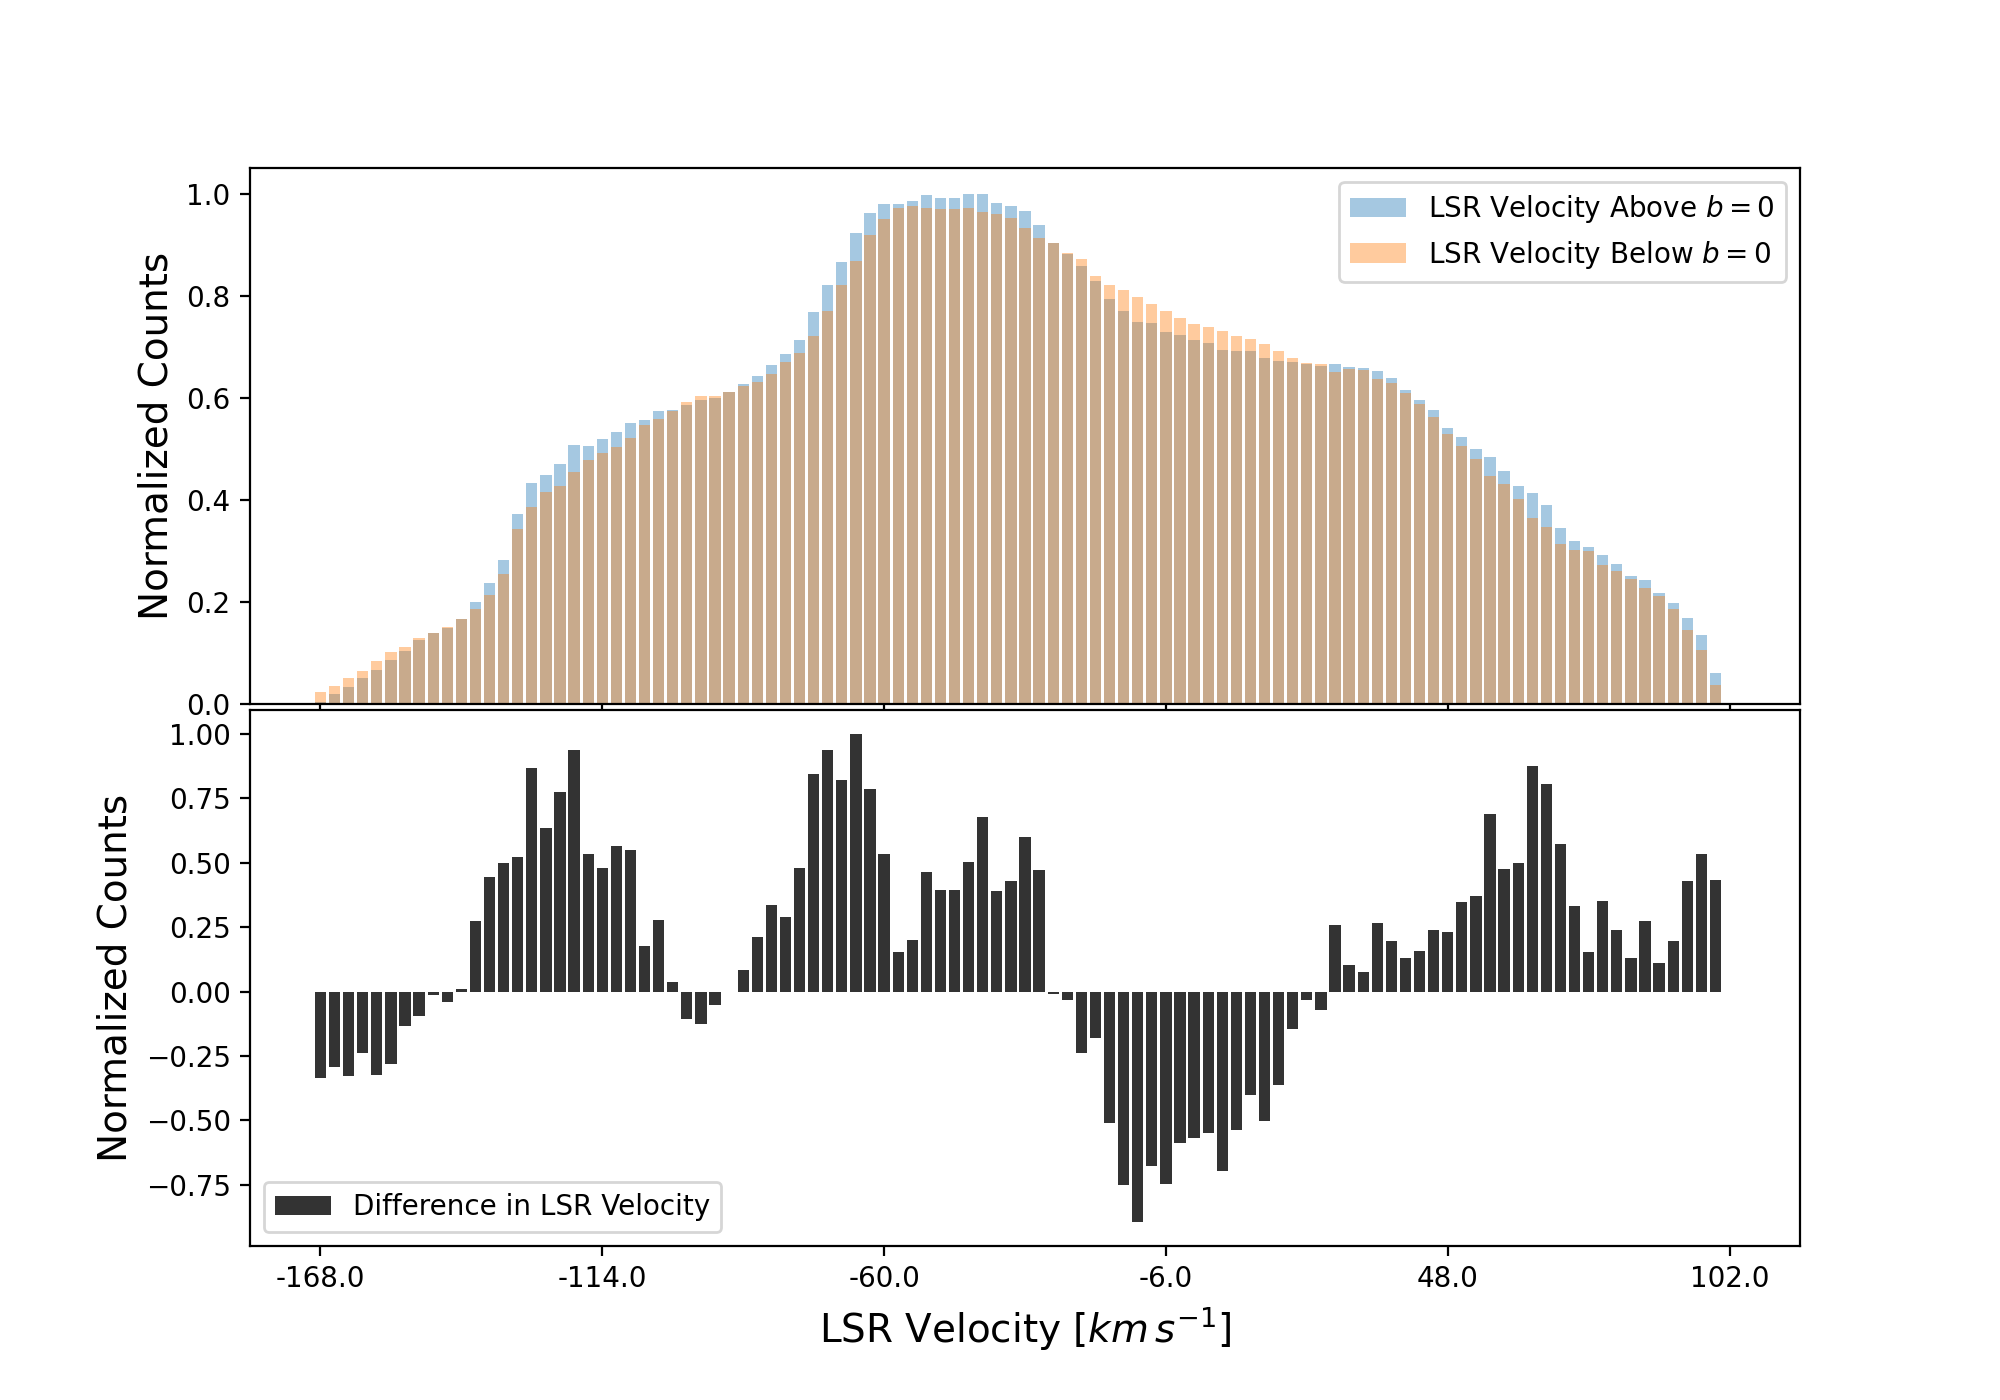

<ipython-input-813-5962bcaae8ca>:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [813]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'hspace':0.01}, figsize=(10,7))
hist = ax1.bar(np.arange(len(v_upper_bincenters)), v_upper_hist/v_upper_hist.max(), alpha=.4, label=r'LSR Velocity Above $b=0$')
hist = ax1.bar(np.arange(len(v_lower_bincenters)), v_lower_hist/v_upper_hist.max(), alpha=.4, label=r'LSR Velocity Below $b=0$')

hist = ax2.bar(np.arange(len(v_upper_bincenters)), (v_upper_hist-v_lower_hist)/( v_upper_hist-v_lower_hist).max(), 
               alpha=.8, color='k', label='Difference in LSR Velocity')

locs = ax2.get_xticks()
ax2.set_xticks(locs)
ax2.set_xticklabels(np.round(np.linspace(v_lower_bincenters[0], v_lower_bincenters[-1],len(locs) ), 0))

locs = ax1.get_xticks()
ax1.set_xticks(locs)
ax1.set_xticklabels(np.round(np.linspace(v_lower_bincenters[0], v_lower_bincenters[-1],len(locs) ), 0))

ax1.set_xlim(-5, 105)

ax1.legend()
ax2.legend()

ax2.set_xlabel('LSR Velocity [$km\,s^{-1}$]', fontsize=14)

ax2.set_ylabel('Normalized Counts', fontsize=14)
ax1.set_ylabel('Normalized Counts', fontsize=14)

plt.tight_layout()

plt.savefig('LSR_VEL.pdf')

In [719]:
from astropy import constants as c
from astropy import units as u

In [720]:
mh = c.m_p+c.m_e
mh = mh.to_value()

In [721]:
avo = 6.022e23

<IPython.core.display.Javascript object>


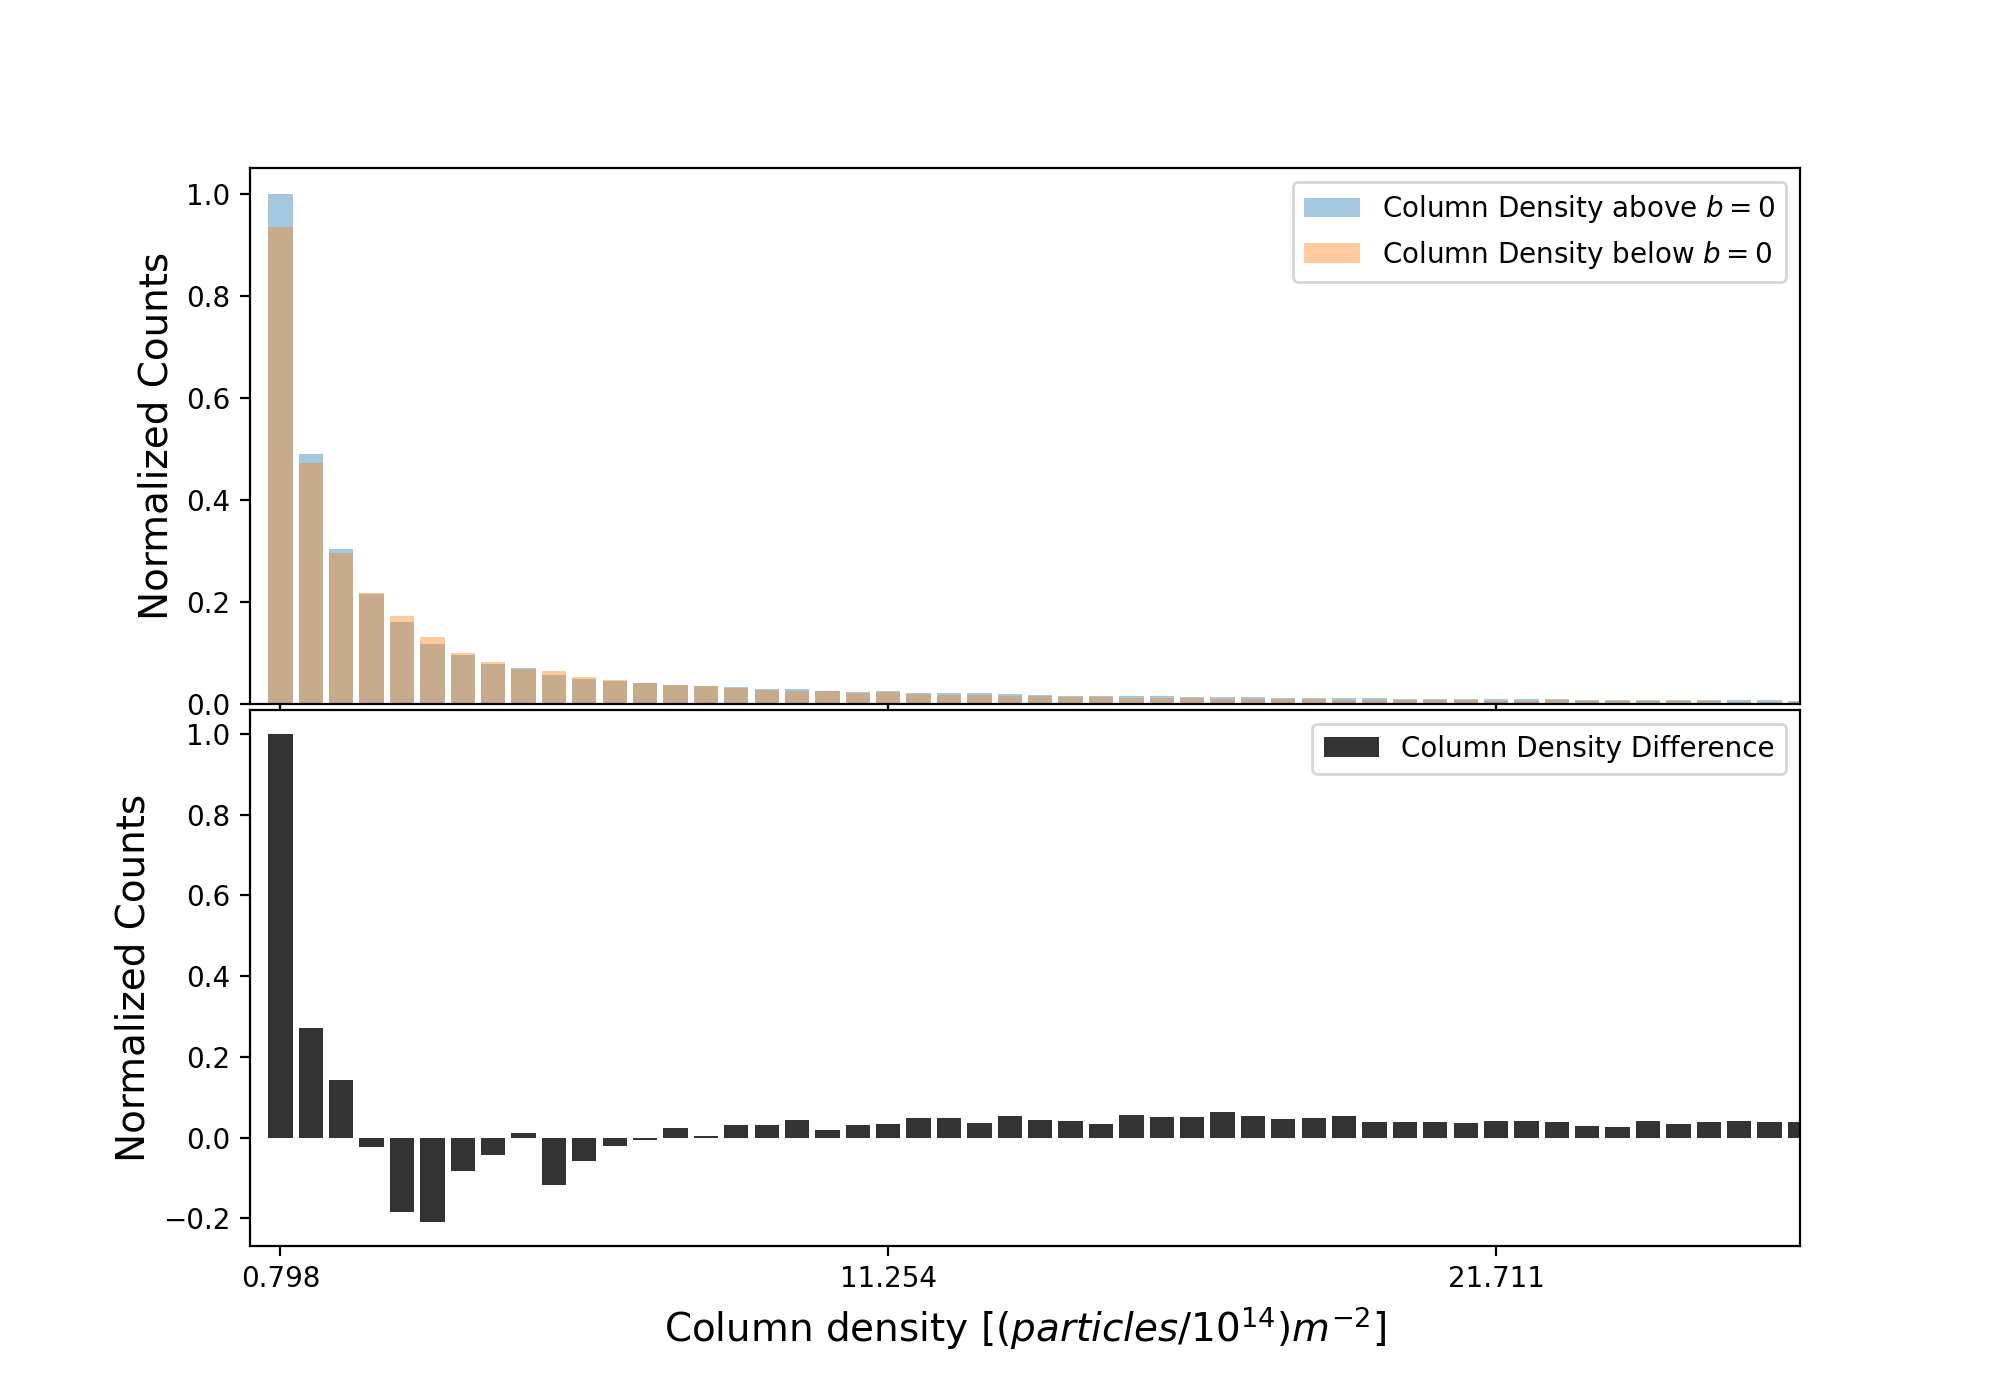

<ipython-input-812-b48b749101fa>:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [812]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex = True, gridspec_kw={'hspace':0.01}, figsize=(10,7))
# hist = plt.hist(N_upper/1e20, bins=100, density=False, histtype='bar', alpha=.3)
# hist = plt.hist(N_lower/1e20, bins=100, density=False, histtype='bar', alpha=.3)
# plt.xlim(0, .5)
m = ax1.bar(np.arange(len(N_upper_bincenters)), N_upper_hist/N_upper_hist.max(), log=False, alpha=.4, label=r'Column Density above $b=0$')
# plt.plot(np.arange(len(binscenters_1)), fit_upper, '--b')

m = ax1.bar(np.arange(len(N_lower_bincenters)), N_lower_hist/N_upper_hist.max(), log=False, alpha=.4, label=r'Column Density below $b=0$')

m = ax2.bar(np.arange(len(N_upper_bincenters)), (N_upper_hist-N_lower_hist)/np.abs((N_upper_hist-N_lower_hist).max()),
            log=False, alpha=.8, color='k',label='Column Density Difference' )
locs, labels = plt.xticks()
plt.xticks(locs[1:], np.round(np.linspace(N_upper_bincenters[0]/1e18, N_upper_bincenters[-1]/1e18, 16), 3))

plt.xlim(-1, 50)
ax2.set_xlabel('Column density [$(particles/10^{14})m^{-2}$]', fontsize=14)

ax2.set_ylabel('Normalized Counts', fontsize=14)
ax1.set_ylabel('Normalized Counts', fontsize=14)
ax1.legend()
ax2.legend()
plt.tight_layout()
plt.savefig('Column_density.pdf')

<IPython.core.display.Javascript object>


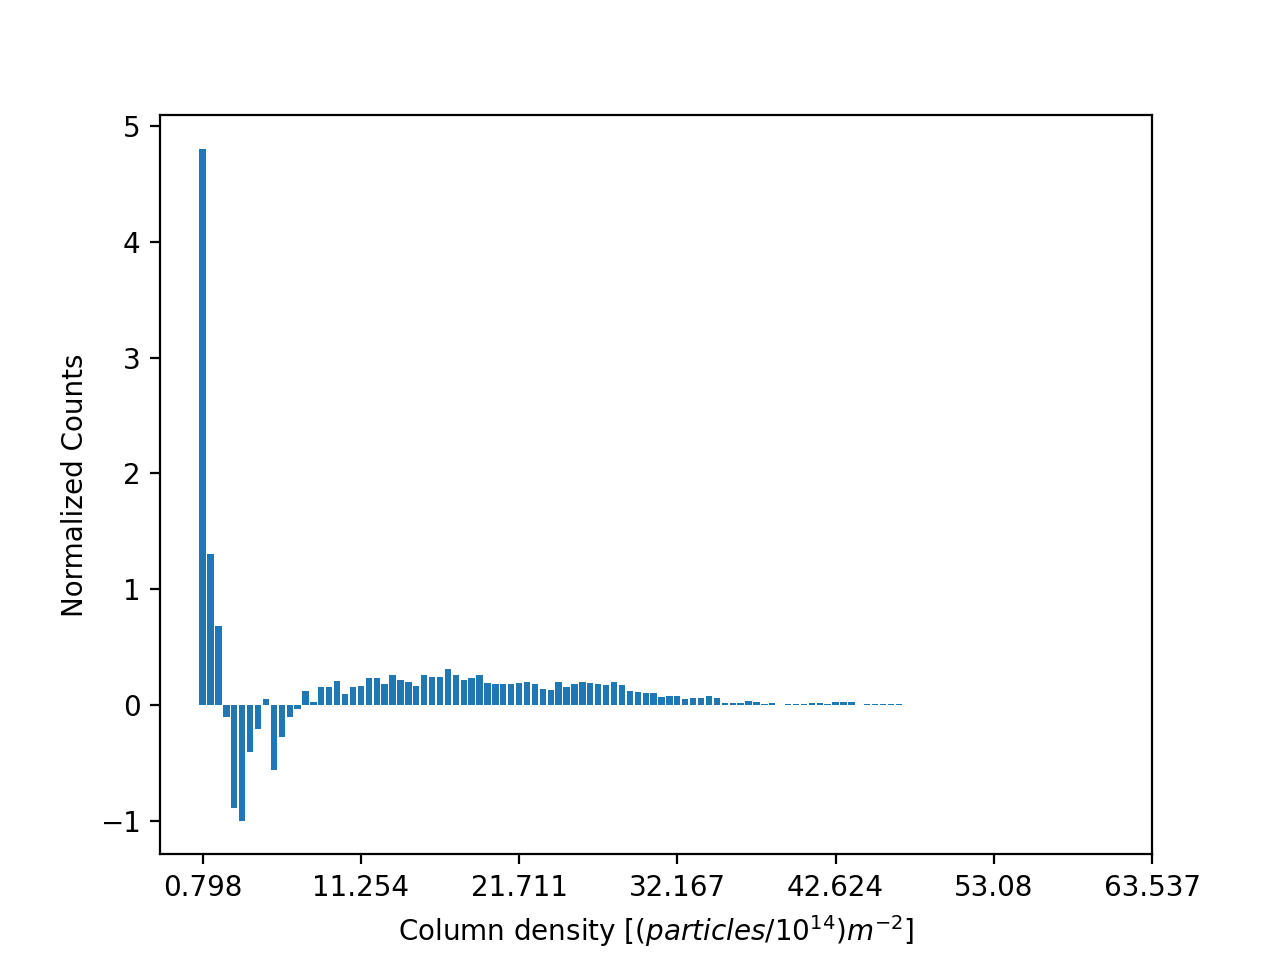

Text(0, 0.5, 'Normalized Counts')

In [725]:
plt.figure()
m = plt.bar(np.arange(len(N_upper_bincenters)),
            (N_upper_hist - N_lower_hist) / np.abs(
                (N_upper_hist - N_lower_hist).min()),
            log=False,
            alpha=1)
locs, labels = plt.xticks()
plt.xticks(
    locs[1:],
    np.round(
        np.linspace(N_upper_bincenters[0] / 1e18,
                    N_upper_bincenters[-1] / 1e18, 16), 3))
# plt.plot(np.arange(len(binscenters_2)), fit_lower, '--r')
# plt.xlim(-1, 50)
plt.xlabel('Column density [$(particles/10^{14})m^{-2}$]')
plt.ylabel('Normalized Counts')

In [840]:
M_upper_bincenters

array([2.81168409e-01, 8.43505227e-01, 1.40584205e+00, 1.96817886e+00,
       2.53051568e+00, 3.09285250e+00, 3.65518932e+00, 4.21752614e+00,
       4.77986295e+00, 5.34219977e+00, 5.90453659e+00, 6.46687341e+00,
       7.02921023e+00, 7.59154704e+00, 8.15388386e+00, 8.71622068e+00,
       9.27855750e+00, 9.84089432e+00, 1.04032311e+01, 1.09655680e+01,
       1.15279048e+01, 1.20902416e+01, 1.26525784e+01, 1.32149152e+01,
       1.37772520e+01, 1.43395889e+01, 1.49019257e+01, 1.54642625e+01,
       1.60265993e+01, 1.65889361e+01, 1.71512730e+01, 1.77136098e+01,
       1.82759466e+01, 1.88382834e+01, 1.94006202e+01, 1.99629570e+01,
       2.05252939e+01, 2.10876307e+01, 2.16499675e+01, 2.22123043e+01,
       2.27746411e+01, 2.33369779e+01, 2.38993148e+01, 2.44616516e+01,
       2.50239884e+01, 2.55863252e+01, 2.61486620e+01, 2.67109989e+01,
       2.72733357e+01, 2.78356725e+01, 2.83980093e+01, 2.89603461e+01,
       2.95226829e+01, 3.00850198e+01, 3.06473566e+01, 3.12096934e+01,
      

<IPython.core.display.Javascript object>


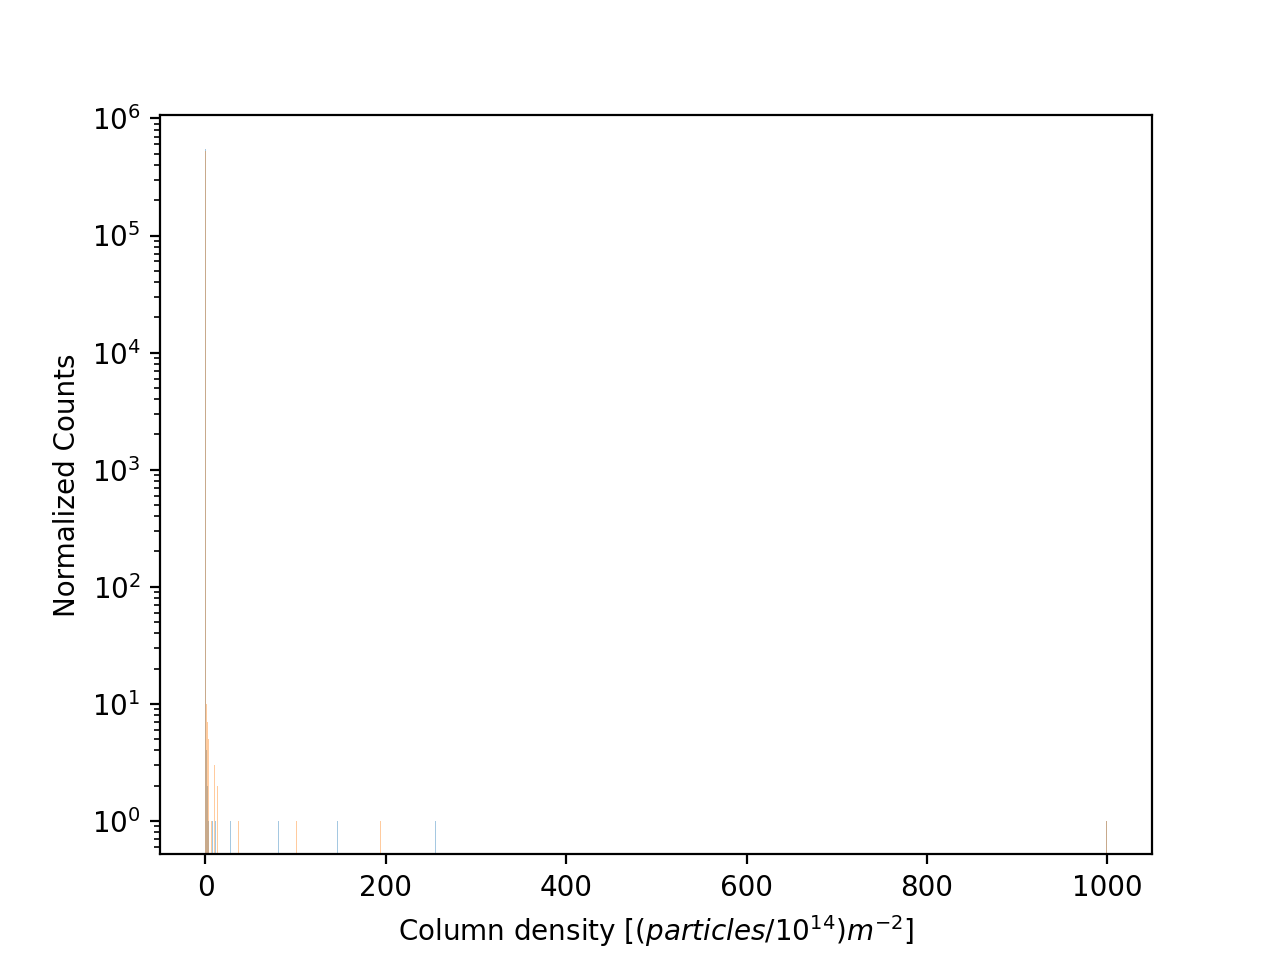

Text(0, 0.5, 'Normalized Counts')

In [1130]:
plt.figure()
# hist = plt.hist(M_upper/1e20, bins=100, density=False, histtype='bar', alpha=.3)
# hist = plt.hist(M_lower/1e20, bins=100, density=False, histtype='bar', alpha=.3)
# plt.xlim(0, .5)
m = plt.bar(np.arange(len(M_upper_bincenters)), M_upper_hist, log=True, alpha=.4)
# plt.plot(np.arange(len(binscenters_1)), fit_upper, '--b')

m = plt.bar(np.arange(len(M_lower_bincenters)), M_lower_hist, log=True, alpha=.4)
# locs, labels = plt.xticks()
# plt.xticks(locs[1:], np.round(np.linspace(M_upper_bincenters[0]/1e18, M_upper_bincenters[-1]/1e18, 16), 3))
# plt.plot(np.arange(len(binscenters_2)), fit_lower, '--r')
# plt.xlim(-1, 50)
plt.xlabel('Column density [$(particles/10^{14})m^{-2}$]')
plt.ylabel('Normalized Counts')

<IPython.core.display.Javascript object>


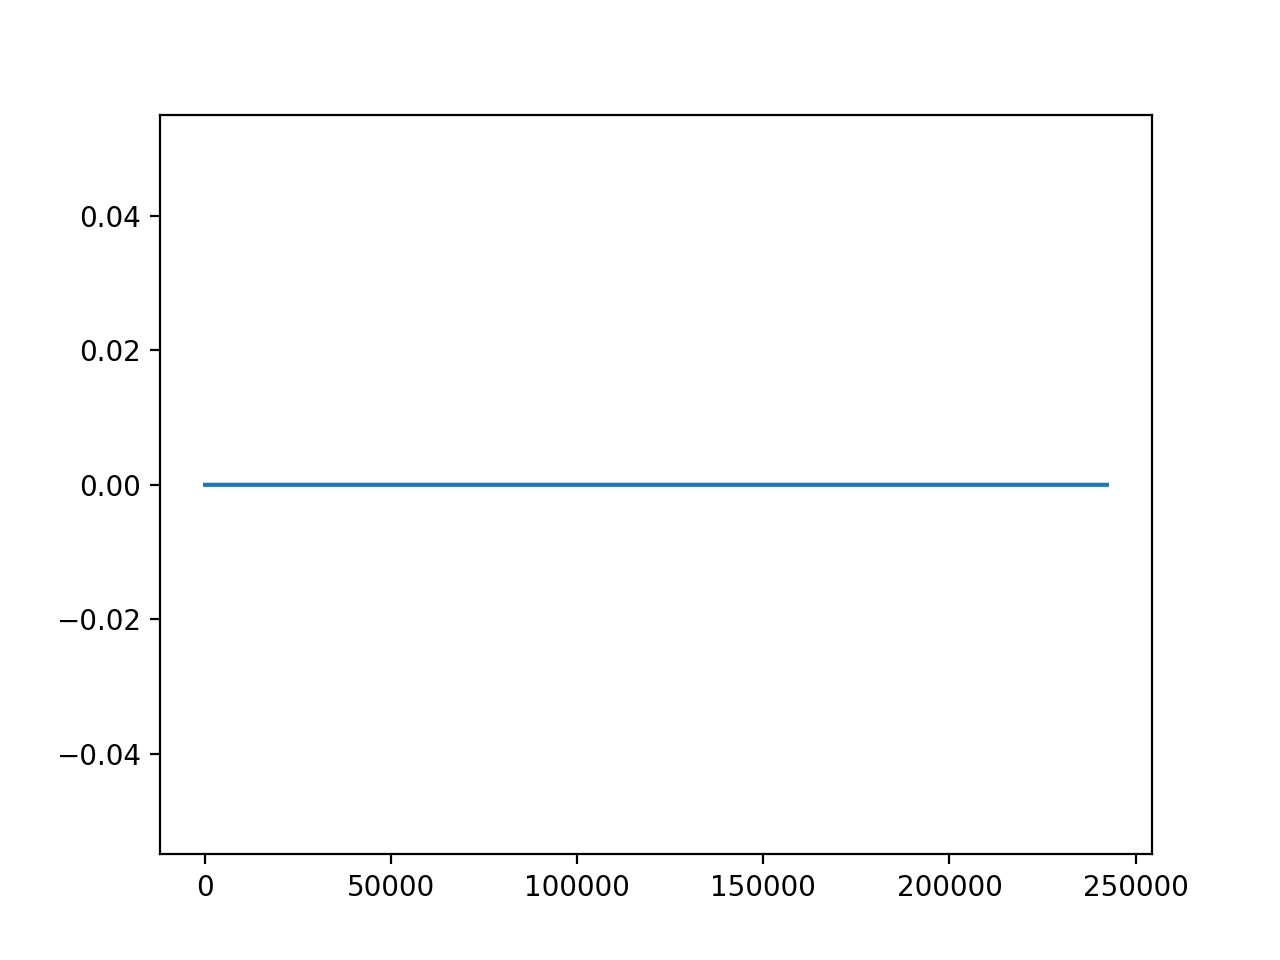

In [702]:
plt.figure()
plt.plot(M_lower)

In [ ]:
def column_density_binned(T, v):
    binned_grid = np.zeros()
    return 1.8e18 

# Getting rid of the waveeeees

In [1287]:
files = sorted(glob.glob('avgs/1270'+'*.npz'))

In [1288]:
from scipy.signal import savgol_filter

<IPython.core.display.Javascript object>


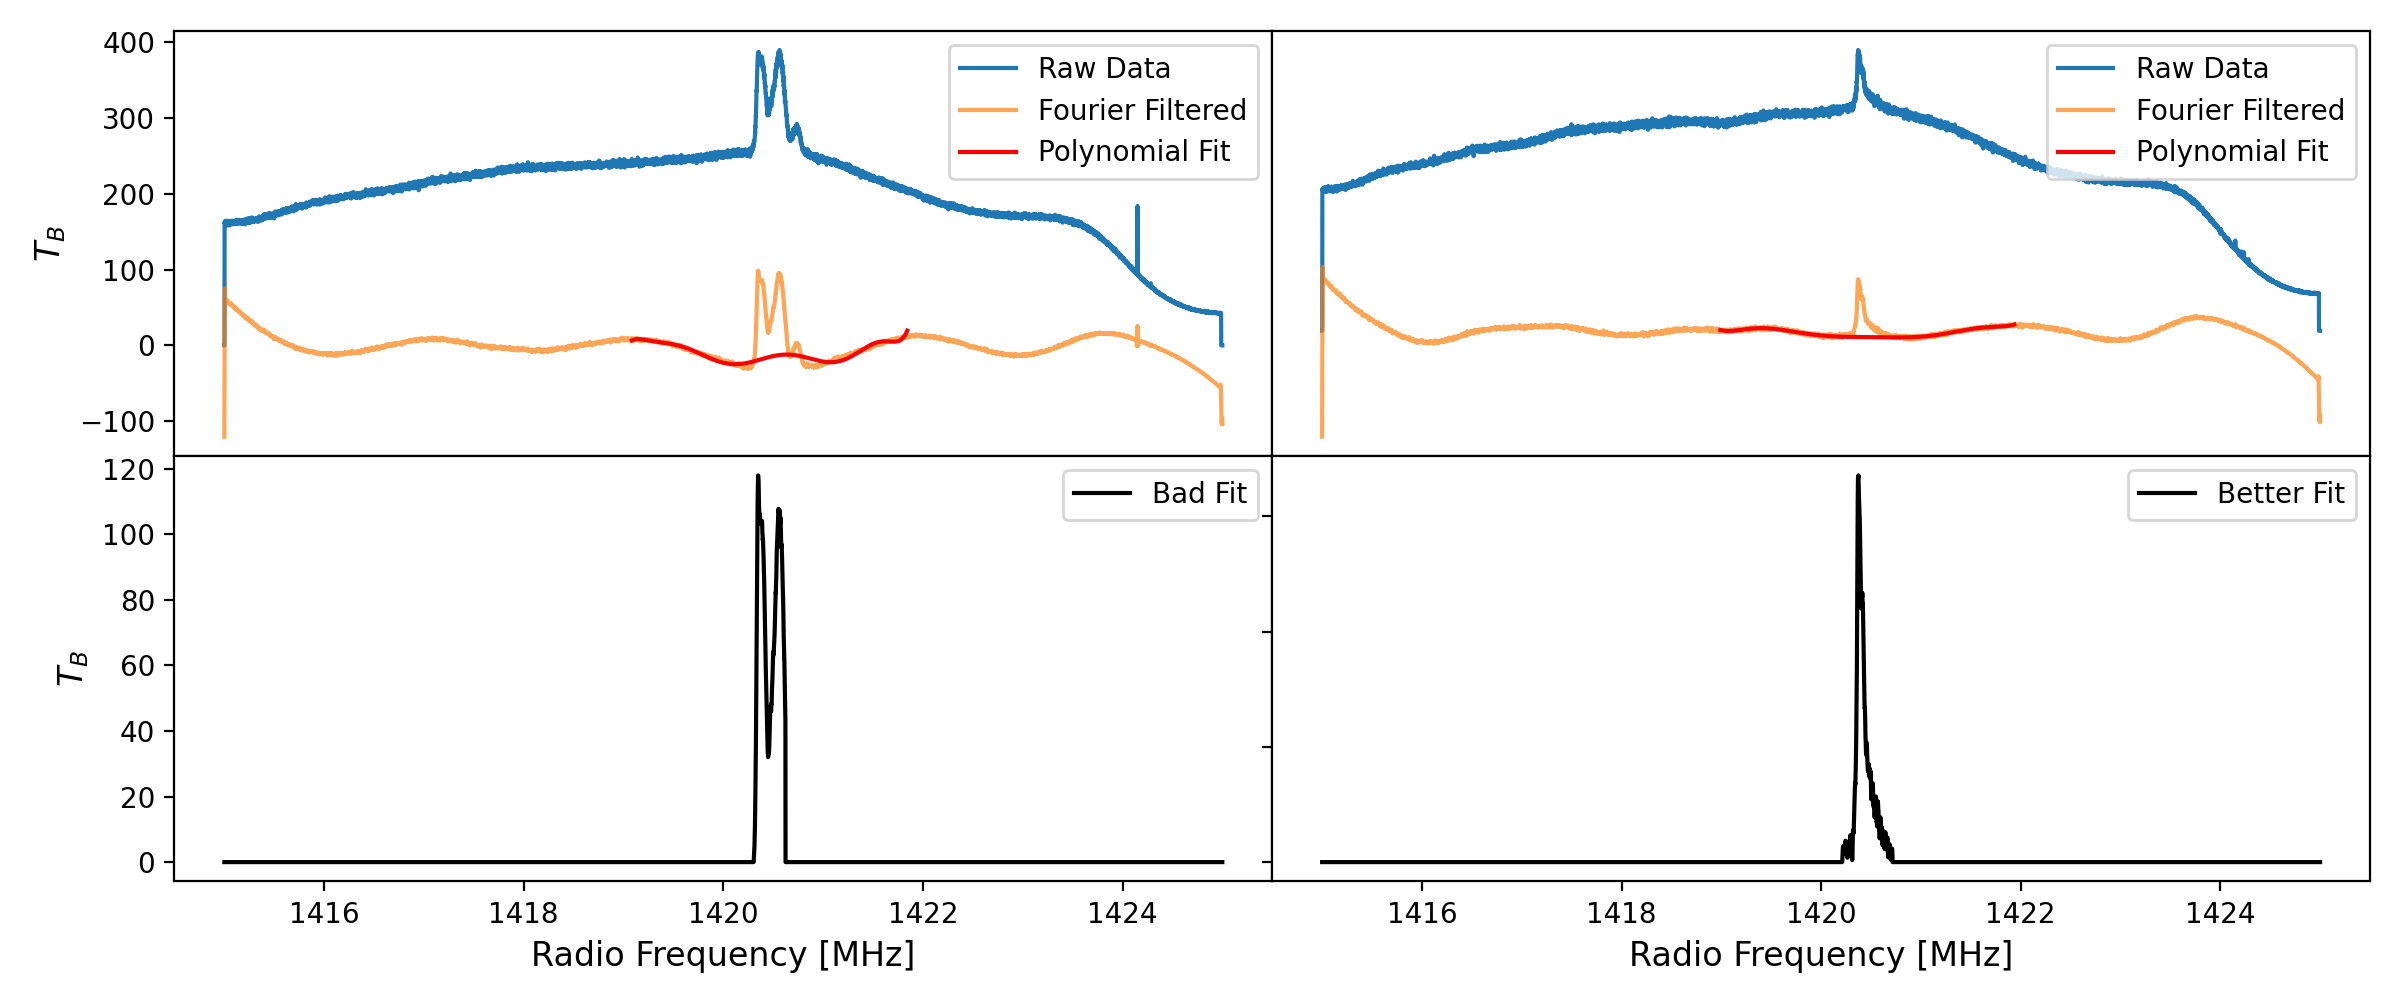

/Users/maxlee/anaconda3/envs/radio_lab/lib/python3.8/site-packages/scipy/signal/_savitzky_golay.py:335: ComplexWarning: Casting complex values to real discards the imaginary part
  x = x.astype(np.float64)


2.335319209915653


/Users/maxlee/anaconda3/envs/radio_lab/lib/python3.8/site-packages/scipy/signal/_savitzky_golay.py:335: ComplexWarning: Casting complex values to real discards the imaginary part
  x = x.astype(np.float64)


0.7081113349562219


In [1291]:
file =  'avgs/1270.0_120.0_0.0_avg.npz'

# fitting code
fig, (axs)= plt.subplots(nrows=2,ncols=2, sharex=True, sharey=False, figsize=(12,5), gridspec_kw={'hspace':0, 'wspace':0})
fits = []
f_raw = np.load(file)
f_raw = f_raw['real0']*30612.526363412657
f_in = f_raw.copy()
f = np.linspace(145, 155, 8192)+1270
tolerant=True
signal = [3950, 5000]
# highlight the area around the signal
counter = 0

#quick fft filter
tilde = np.fft.fft(f_in)
maxs = sorted([np.abs(len(tilde) - np.argmax(tilde)), np.argmax(tilde)])
tilde[:maxs[0]+5] = 0
tilde[maxs[1]-5:] = 0
f_in = np.fft.ifft(tilde)
f_in = savgol_filter(f_in, 11, 3)
tol = -1e-5
while tolerant:

    f_fit = np.concatenate((f[signal[0]-1000:signal[0]], f[signal[1]:signal[1]+1000]))-1420.4
    
    p_fit = np.concatenate((f_in[signal[0]-1000:signal[0]], f_in[signal[1]:signal[1]+1000]))
    f_huh = f[signal[0]-1000:signal[1]+1000]-1420.4
    
    F = np.polyfit(f_fit, p_fit, 9)
    
    fit = np.polyval(F, f_huh)
    f_fix = f_in.copy()
    f_fix[signal[0]-1000:signal[1]+1000] = f_fix[signal[0]-1000:signal[1]+1000] - fit
    f_fix[:signal[0]] = 0
    f_fix[signal[1]:] = 0
    fits.append(fit)
    
    if f_fix.min() < tol and counter%2==0:
        signal[0] =signal[0] + 1
        counter+=1
    elif f_fix.min() < tol and counter%2==1:
        signal[1] =signal[1] - 1
        counter+=1
    else:
        print(np.abs(f_fix.mean()))


        tolerant = False
    
    fit_check = np.polyval(F, f_fit)
    if fit.max() > fit_check.max() or signal[0]==signal[1]:
        signal = [3950, 5000]
        tol *=10
axs[0,0].plot(f, f_raw, label='Raw Data')

axs[0,0].plot(f, f_in, alpha=.7, label='Fourier Filtered')
axs[0,0].plot(f_huh+1420.4, fit, 'r', label='Polynomial Fit')
axs[1,0].plot(f, f_fix, 'k', label='Bad Fit')


file = files[127]


fits = []
f_raw = np.load(file)
f_raw = f_raw['real0']*30612.526363412657
f_in = f_raw.copy()
f = np.linspace(145, 155, 8192)+1270
tolerant=True
signal = [3950, 5000]
# highlight the area around the signal
counter = 0

#quick fft filter
tilde = np.fft.fft(f_in)
maxs = sorted([np.abs(len(tilde) - np.argmax(tilde)), np.argmax(tilde)])
tilde[:maxs[0]+5] = 0
tilde[maxs[1]-5:] = 0
f_in = np.fft.ifft(tilde)
f_in = savgol_filter(f_in, 11, 3)
tol = -1e-5
while tolerant:

    f_fit = np.concatenate((f[signal[0]-1000:signal[0]], f[signal[1]:signal[1]+1000]))-1420.4
    
    p_fit = np.concatenate((f_in[signal[0]-1000:signal[0]], f_in[signal[1]:signal[1]+1000]))
    f_huh = f[signal[0]-1000:signal[1]+1000]-1420.4
    
    F = np.polyfit(f_fit, p_fit, 9)
    
    fit = np.polyval(F, f_huh)
    f_fix = f_in.copy()
    f_fix[signal[0]-1000:signal[1]+1000] = f_fix[signal[0]-1000:signal[1]+1000] - fit
    f_fix[:signal[0]] = 0
    f_fix[signal[1]:] = 0
    fits.append(fit)
    
    if f_fix.min() < tol and counter%2==0:
        signal[0] =signal[0] + 1
        counter+=1
    elif f_fix.min() < tol and counter%2==1:
        signal[1] =signal[1] - 1
        counter+=1
    else:
        print(np.abs(f_fix.mean()))


        tolerant = False
    
    fit_check = np.polyval(F, f_fit)
    if fit.max() > fit_check.max() or signal[0]==signal[1]:
        signal = [3950, 5000]
        tol *=10
        
axs[0,1].plot(f, f_raw, label='Raw Data')

axs[0,1].plot(f, f_in, alpha=.7, label='Fourier Filtered')
axs[0,1].plot(f_huh+1420.4, fit, 'r', label='Polynomial Fit')
axs[1,1].plot(f, f_fix, 'k', label='Better Fit')

axs[0,0].legend()
axs[1,0].legend()
axs[1,1].legend(loc='upper right')
axs[0,1].legend(loc='upper right')

axs[1,0].set_xlabel('Radio Frequency [MHz]', fontsize=12)
axs[1,1].set_xlabel('Radio Frequency [MHz]', fontsize=12)


axs[0,0].set_ylabel('$T_B$', fontsize=12)
axs[1,0].set_ylabel('$T_B$', fontsize=12)
axs[1,1].tick_params(axis=u'y', which=u'y',length=0)
plt.setp(axs[1,1].get_yticklabels(), visible=False)

axs[0,1].tick_params(axis=u'both', which=u'both',length=0)
plt.setp(axs[0,1].get_xticklabels(), visible=False)
plt.setp(axs[0,1].get_yticklabels(), visible=False)



plt.tight_layout()
plt.savefig('fitting_woes.pdf')

* watershed algorithm
* Image segmentation
* shift up?

In [2680]:
f[signal]

array([1420.30460261, 1420.62324503])

<IPython.core.display.Javascript object>


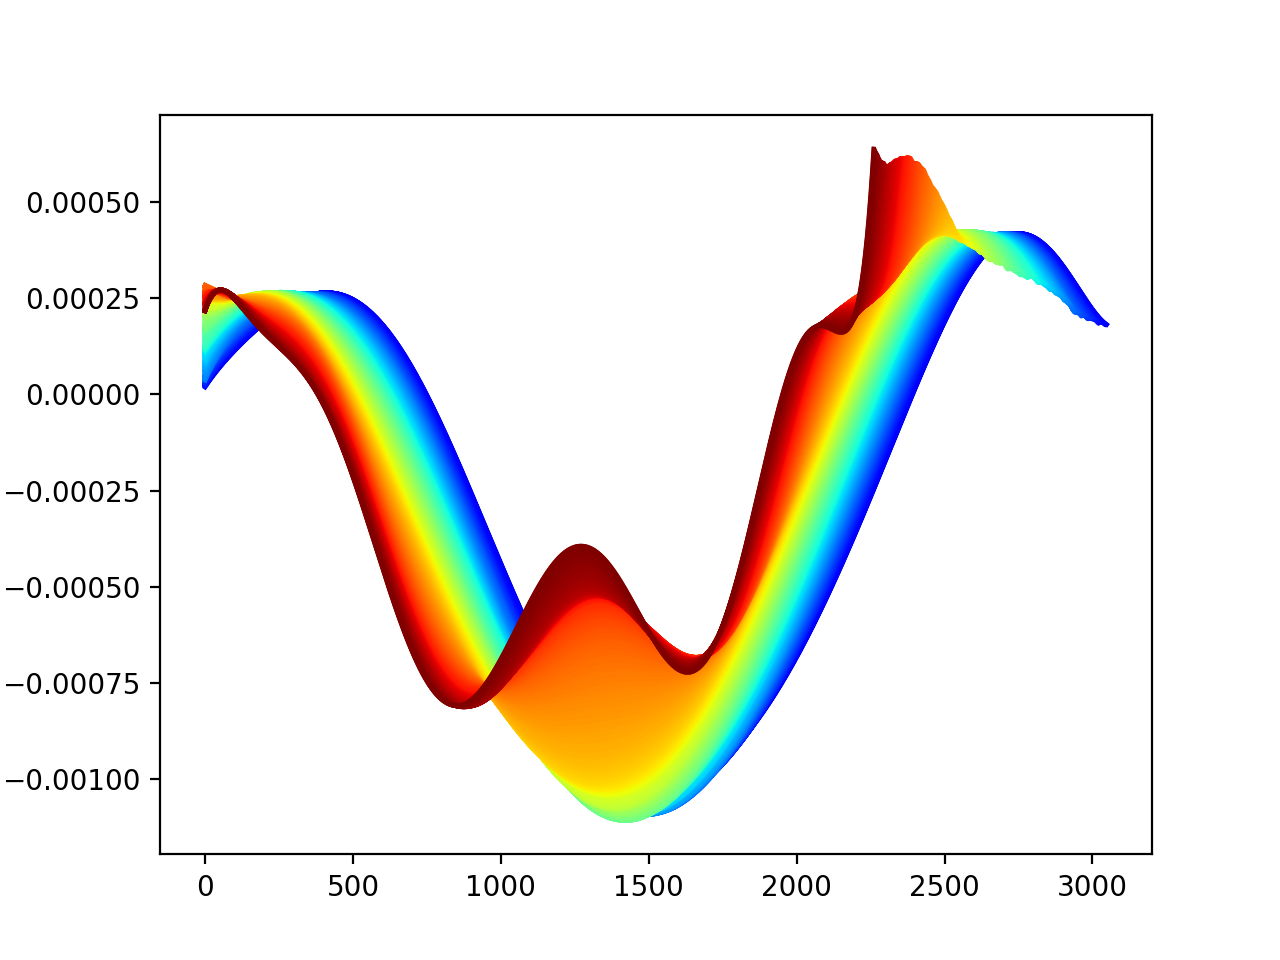

In [2678]:
plt.figure()
colors = plt.cm.jet(np.linspace(.1,1,len(fits)))
for i in range(len(fits)):
    plt.plot(fits[i], color=colors[i])
# plt.scatter(500, 0, color='k')
# plt.scatter(2750, .0001, color='k')

In [1841]:
fits = {}
f_count = 0
for file in p_bar(files, leave=False):
    fits_temp = []
    f_in = np.load(file)
    f_in = f_in['real0']
    f = np.linspace(145, 155, 8192)+1270
    tolerant=True
    signal = [3950, 5000]
    # highlight the area around the signal
    counter = 0
    
    #quick fft filter
    tilde = np.fft.fft(f_in)
    maxs = sorted([np.abs(len(tilde) - np.argmax(tilde)), np.argmax(tilde)])
    tilde[:maxs[0]+5] = 0
    tilde[maxs[1]-5:] = 0
    f_in = np.fft.ifft(tilde)
    f_in = savgol_filter(f_in, 11, 1)
    tol = -1e-5

    while tolerant:
        f_fit = np.concatenate((f[signal[0]-1000:signal[0]], f[signal[1]:signal[1]+1000]))-1420
        p_fit = np.concatenate((f_in[signal[0]-1000:signal[0]], f_in[signal[1]:signal[1]+1000]))
        f_huh = f[signal[0]-1000:signal[1]+1000]-1420
        F = np.polyfit(f_fit, p_fit, 15)
        fit = np.polyval(F, f_huh)
        f_fix = f_in.copy()
        f_fix[signal[0]-1000:signal[1]+1000] = f_fix[signal[0]-1000:signal[1]+1000] - fit
        f_fix[:signal[0]] = 0
        f_fix[signal[1]:] = 0
        fits_temp.append(fit)
        if f_fix.min() < tol and counter%2==0:
            signal[0] =signal[0] + 1
            counter+=1
        elif f_fix.min() < tol and counter%2==1:
            signal[1] =signal[1] - 1
            counter+=1
        else:
            tolerant = False
            
        fit_check = np.polyval(F, f_fit)
        if fit.max() > fit_check.max():
            signal = [3950, 5000]
            tol *=10
        assert counter != 100000
    _, fname = file.split('/')
    np.savez('fitted/'+'real0_'+fname, real0=f_in, real0_fix=f_fix, fits=fit)
    f_count +=1
    if f_count%100==0:
        print(f'saved {f_count}/{len(files)} fitted files')

saved 100/2389 fitted files
saved 200/2389 fitted files
saved 300/2389 fitted files
saved 400/2389 fitted files
saved 500/2389 fitted files
saved 600/2389 fitted files
saved 700/2389 fitted files
saved 800/2389 fitted files
saved 900/2389 fitted files
saved 1000/2389 fitted files
saved 1100/2389 fitted files
saved 1200/2389 fitted files
saved 1300/2389 fitted files
saved 1400/2389 fitted files
saved 1500/2389 fitted files
saved 1600/2389 fitted files
saved 1700/2389 fitted files
saved 1800/2389 fitted files
saved 1900/2389 fitted files
saved 2000/2389 fitted files
saved 2100/2389 fitted files
saved 2200/2389 fitted files
saved 2300/2389 fitted files


In [151]:
avg_files = sorted(glob.glob('avgs/*.npz'))
fitted_files = sorted(glob.glob('fitted/*.npz'))

In [146]:
fin = np.load(files[0])

In [68]:
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation
import astropy.units as u

def get_projected_velocity(ra, dec, jd, obs_lat=37.91934, obs_lon=-122.15385,
    obs_alt=304, epoch=2451545.):
    
    '''Compute the projected velocity of the telescope wrt the 
    Local Standard of Rest.
    Parameters
    ----------
    ra, dec : float degrees, the RA/DEC of target
    jd      : float, julian date (UTC) of the observation
    obs_lat : float degrees, latitude of observatory, default=nch.lat
    obs_lon : float degrees, longitude of observatory, default=nch.lon
    obs_alt : float meters, altitude of observatory, default=nch.alt
    epoch   : float, julian date epoch of ra/dec coordinates
              default=2451545 is J2000
    Returns
    -------
    v : float m/s, barycenter-corrected radial velocity
    '''
    location = EarthLocation.from_geodetic(lat=obs_lat*u.deg, lon=obs_lon*u.deg, height=obs_alt*u.m)
    sc = SkyCoord(ra=ra*u.deg, dec=dec*u.deg)
    barycorr = sc.radial_velocity_correction(obstime=Time(jd, format="jd"), location=location)
    v = barycorr.to(u.km/u.s)
    return v.to_value()

In [184]:
LSR_corrections = []
for i,file in enumerate(fitted_files):
    # Read in the file
    f_fitted = np.load(file)
    arrays = f_fitted.files
    # get the LO, l, b
    path, name = file.split('/')
    real, lo, l, b, avg = name.split('_')
    avg_fname = f'avgs/{lo}_{l}_{b}_{avg}'
    jd,ra,dec = np.load(avg_fname)['jd_ra_dec']
    ra = np.degrees(ra)
    dec = np.degrees(dec)
    LSR = get_projected_velocity(ra, dec, jd)
    data_to_save ={'real0':f_fitted[arrays[0]], 'real0_fix':f_fitted[arrays[1]], 
                         'fits':f_fitted[arrays[2]],'LSR':np.array([LSR])}
    np.savez('fitted_2/'+name, **data_to_save)
             
    if i%100==0:
        print(f'{i}/{len(fitted_files)} completed')

0/2389 completed
100/2389 completed
200/2389 completed
300/2389 completed
400/2389 completed
500/2389 completed
600/2389 completed
700/2389 completed
800/2389 completed
900/2389 completed
1000/2389 completed
1100/2389 completed
1200/2389 completed
1300/2389 completed
1400/2389 completed
1500/2389 completed
1600/2389 completed
1700/2389 completed
1800/2389 completed
1900/2389 completed
2000/2389 completed
2100/2389 completed
2200/2389 completed
2300/2389 completed
